Explo :

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

data_path = "FR_youtube_trending_data.csv"

yt_data = pd.read_csv(data_path,index_col="video_id")
print("size",yt_data.size)
print("shape",yt_data.shape)
print("dimension",yt_data.ndim)




size 1292865
shape (86191, 15)
dimension 2


In [3]:
print(yt_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 86191 entries, 7rlwxSPUcQk to wXXrva-0-t4
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              86191 non-null  object
 1   publishedAt        86191 non-null  object
 2   channelId          86191 non-null  object
 3   channelTitle       86191 non-null  object
 4   categoryId         86191 non-null  int64 
 5   trending_date      86191 non-null  object
 6   tags               86191 non-null  object
 7   view_count         86191 non-null  int64 
 8   likes              86191 non-null  int64 
 9   dislikes           86191 non-null  int64 
 10  comment_count      86191 non-null  int64 
 11  thumbnail_link     86191 non-null  object
 12  comments_disabled  86191 non-null  bool  
 13  ratings_disabled   86191 non-null  bool  
 14  description        85336 non-null  object
dtypes: bool(2), int64(5), object(8)
memory usage: 9.4+ MB
None


In [4]:
yt_data['title'].value_counts()

Starlink Mission                                                                                       33
Soso Maness - Petrouchka (Clip officiel) ft. PLK                                                       18
Les champions du monde de beatbox nous font un blindtest et c’est (insérer adjectif tel « génial »)    16
Koba LaD - Tue ça Feat. SDM, Guy2bezbar (clip officiel)                                                15
ISK - Chez nous ft. UZI (Clip officiel)                                                                15
                                                                                                       ..
💬Une faille importante détectée dans l'assistant Google !                                               1
Covid-19 : la troisième vague pire que la deuxième dans les services de réanimation                     1
Star Wars: The Bad Batch | Official Trailer | Disney+                                                   1
🎁 BOUTIQUE FORTNITE du 28 Mars 2021 ! Code : P

Plusieurs video revienne souvent ou reste en tendance plusieurs semaine de suite

In [5]:
yt_data['channelId'].value_counts()

UCfj4kQ6_mYO5r4hzX5KloVw    916
UCAcAnMF0OrCtUep3Y4M-ZPw    582
UCo3i0nUzZjjLuM7VjAVz4zA    511
UCQsH5XtIc9hONE1BQjucM0g    496
UCWeg2Pkate69NFdBeuRFTAw    468
                           ... 
UCQRELbX0H5FCokIFxOAsHFA      1
UCI_CtKP-BGonMuIn-y3U5VQ      1
UC7tdFNggH_jwjJTDWqYelmA      1
UChW2w0ss4g4el0h4Ki8mBoQ      1
UCfx-zJb69563vi-yLGhKwew      1
Name: channelId, Length: 3443, dtype: int64

Des chaines sont régulièrement en tendances

16 columns
86191 rows

<AxesSubplot:>

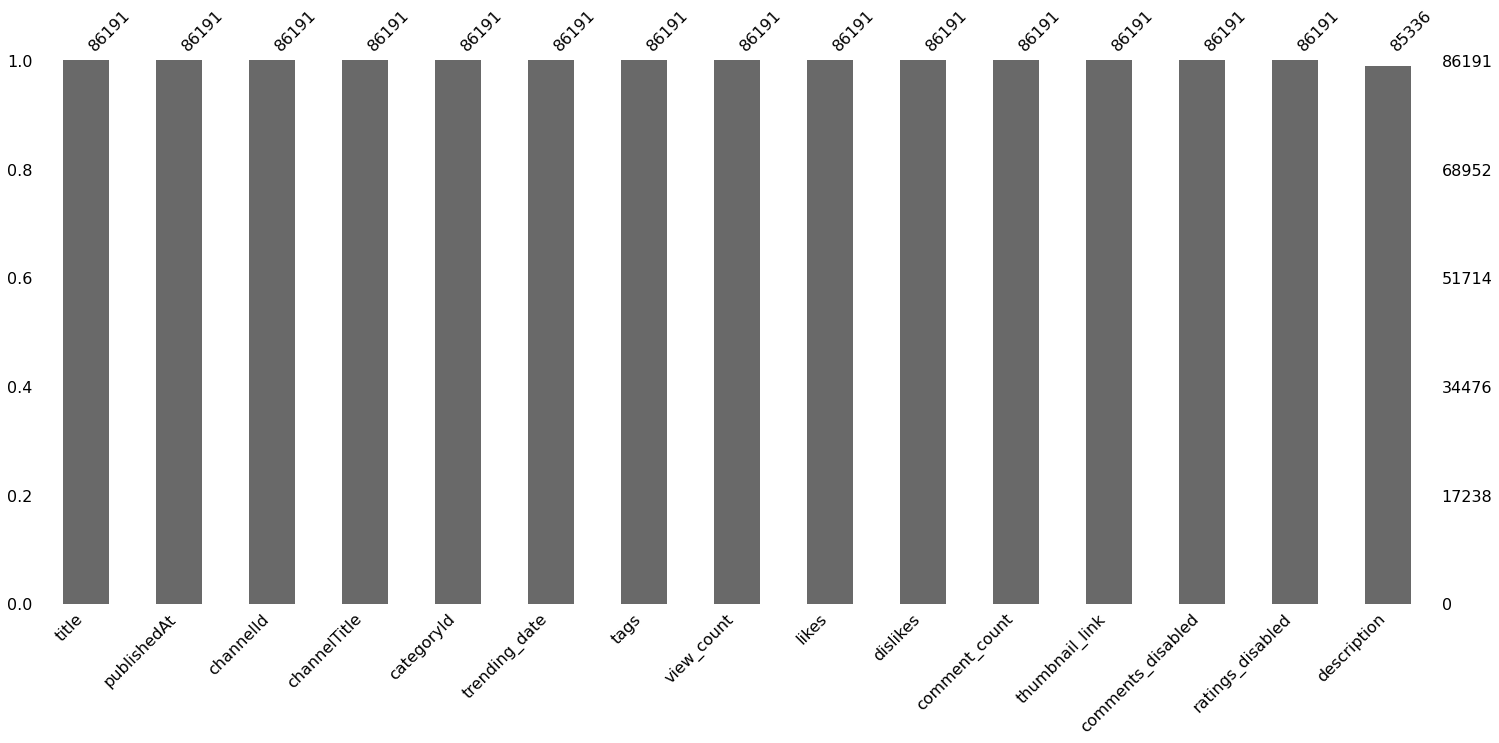

In [6]:
msno.bar(yt_data)

<AxesSubplot:>

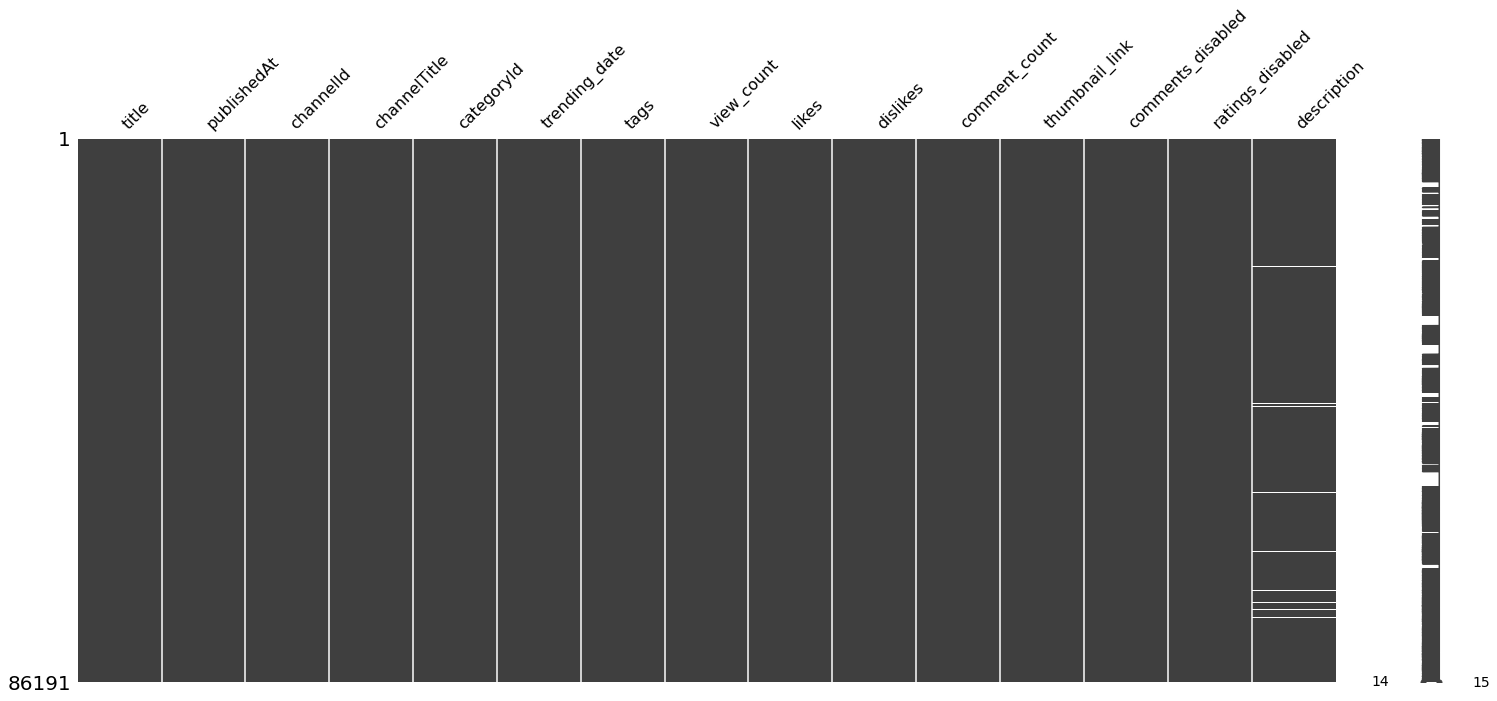

In [7]:
msno.matrix(yt_data)

We can see that there is no paterns of missing data, the category where there are nones are the descriptions but they are not necessary to post a video

<AxesSubplot:>

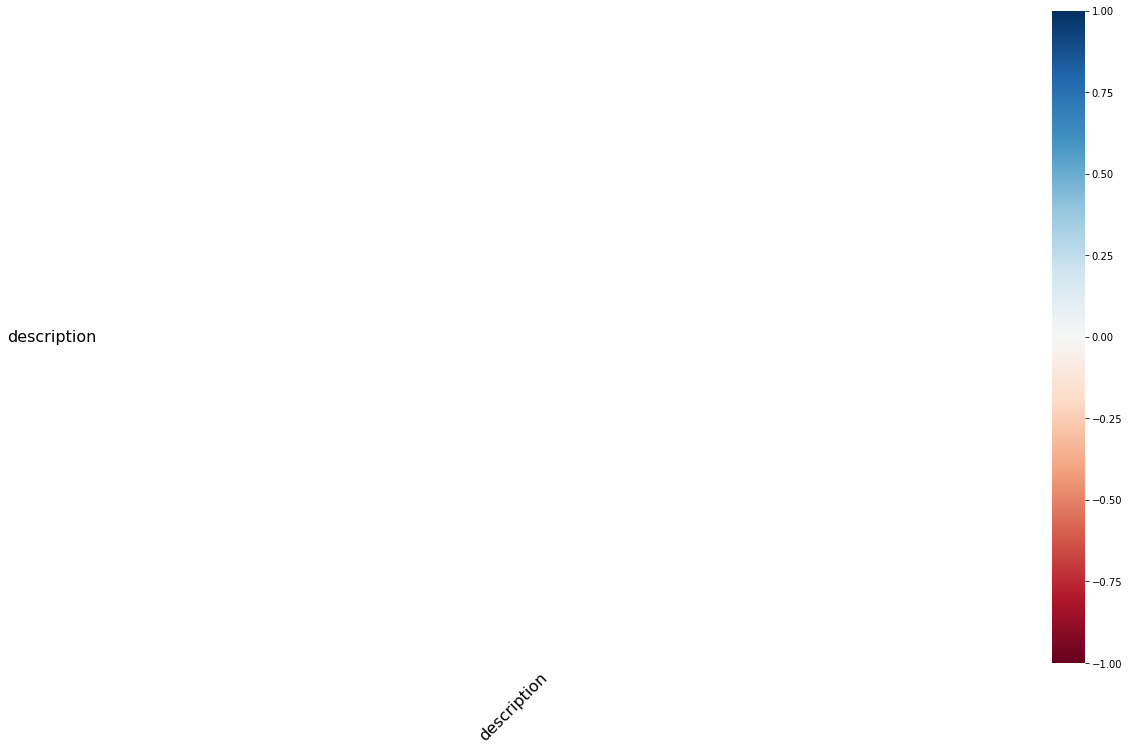

In [8]:
msno.heatmap(yt_data)

<AxesSubplot:>

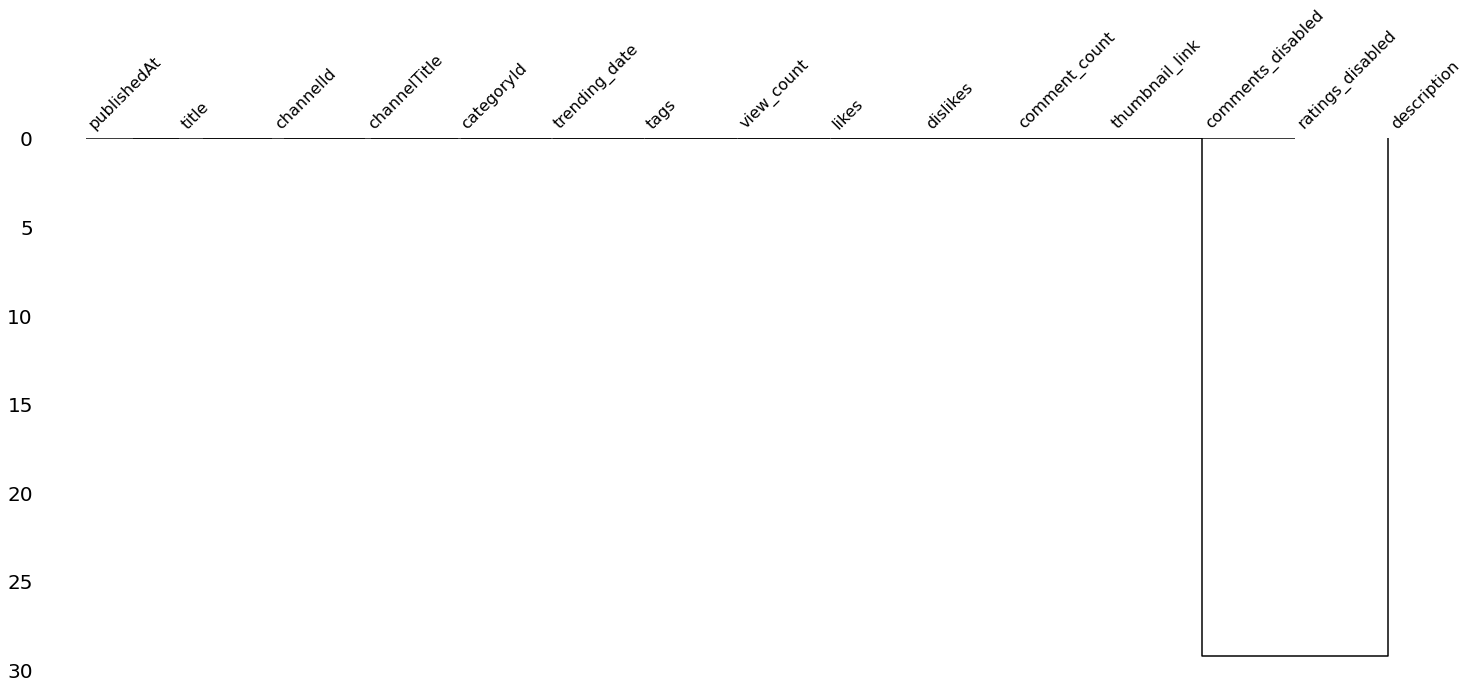

In [9]:
msno.dendrogram(yt_data)

In [10]:
import json

jsonfile = open('FR_category_id.json')
categories = json.load(jsonfile)
category_list = []
for i in categories['items']:
    snippet = i.get('snippet')
    title = snippet.get('title')
    category_list.append(title)
print(category_list)
    

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


Categories = ['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']

array([[<AxesSubplot:title={'center':'categoryId'}>,
        <AxesSubplot:title={'center':'view_count'}>],
       [<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'dislikes'}>],
       [<AxesSubplot:title={'center':'comment_count'}>, <AxesSubplot:>]],
      dtype=object)

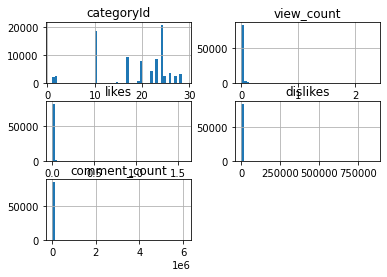

In [11]:
%matplotlib inline
yt_data.hist(bins=50)

<AxesSubplot:xlabel='categoryId', ylabel='view_count'>

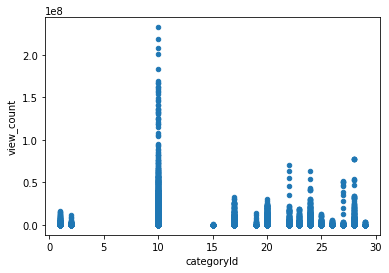

In [12]:
yt_data.plot(kind='scatter',x='categoryId',y='view_count')

insight on the most viewed categories

<AxesSubplot:xlabel='publishedAt', ylabel='view_count'>

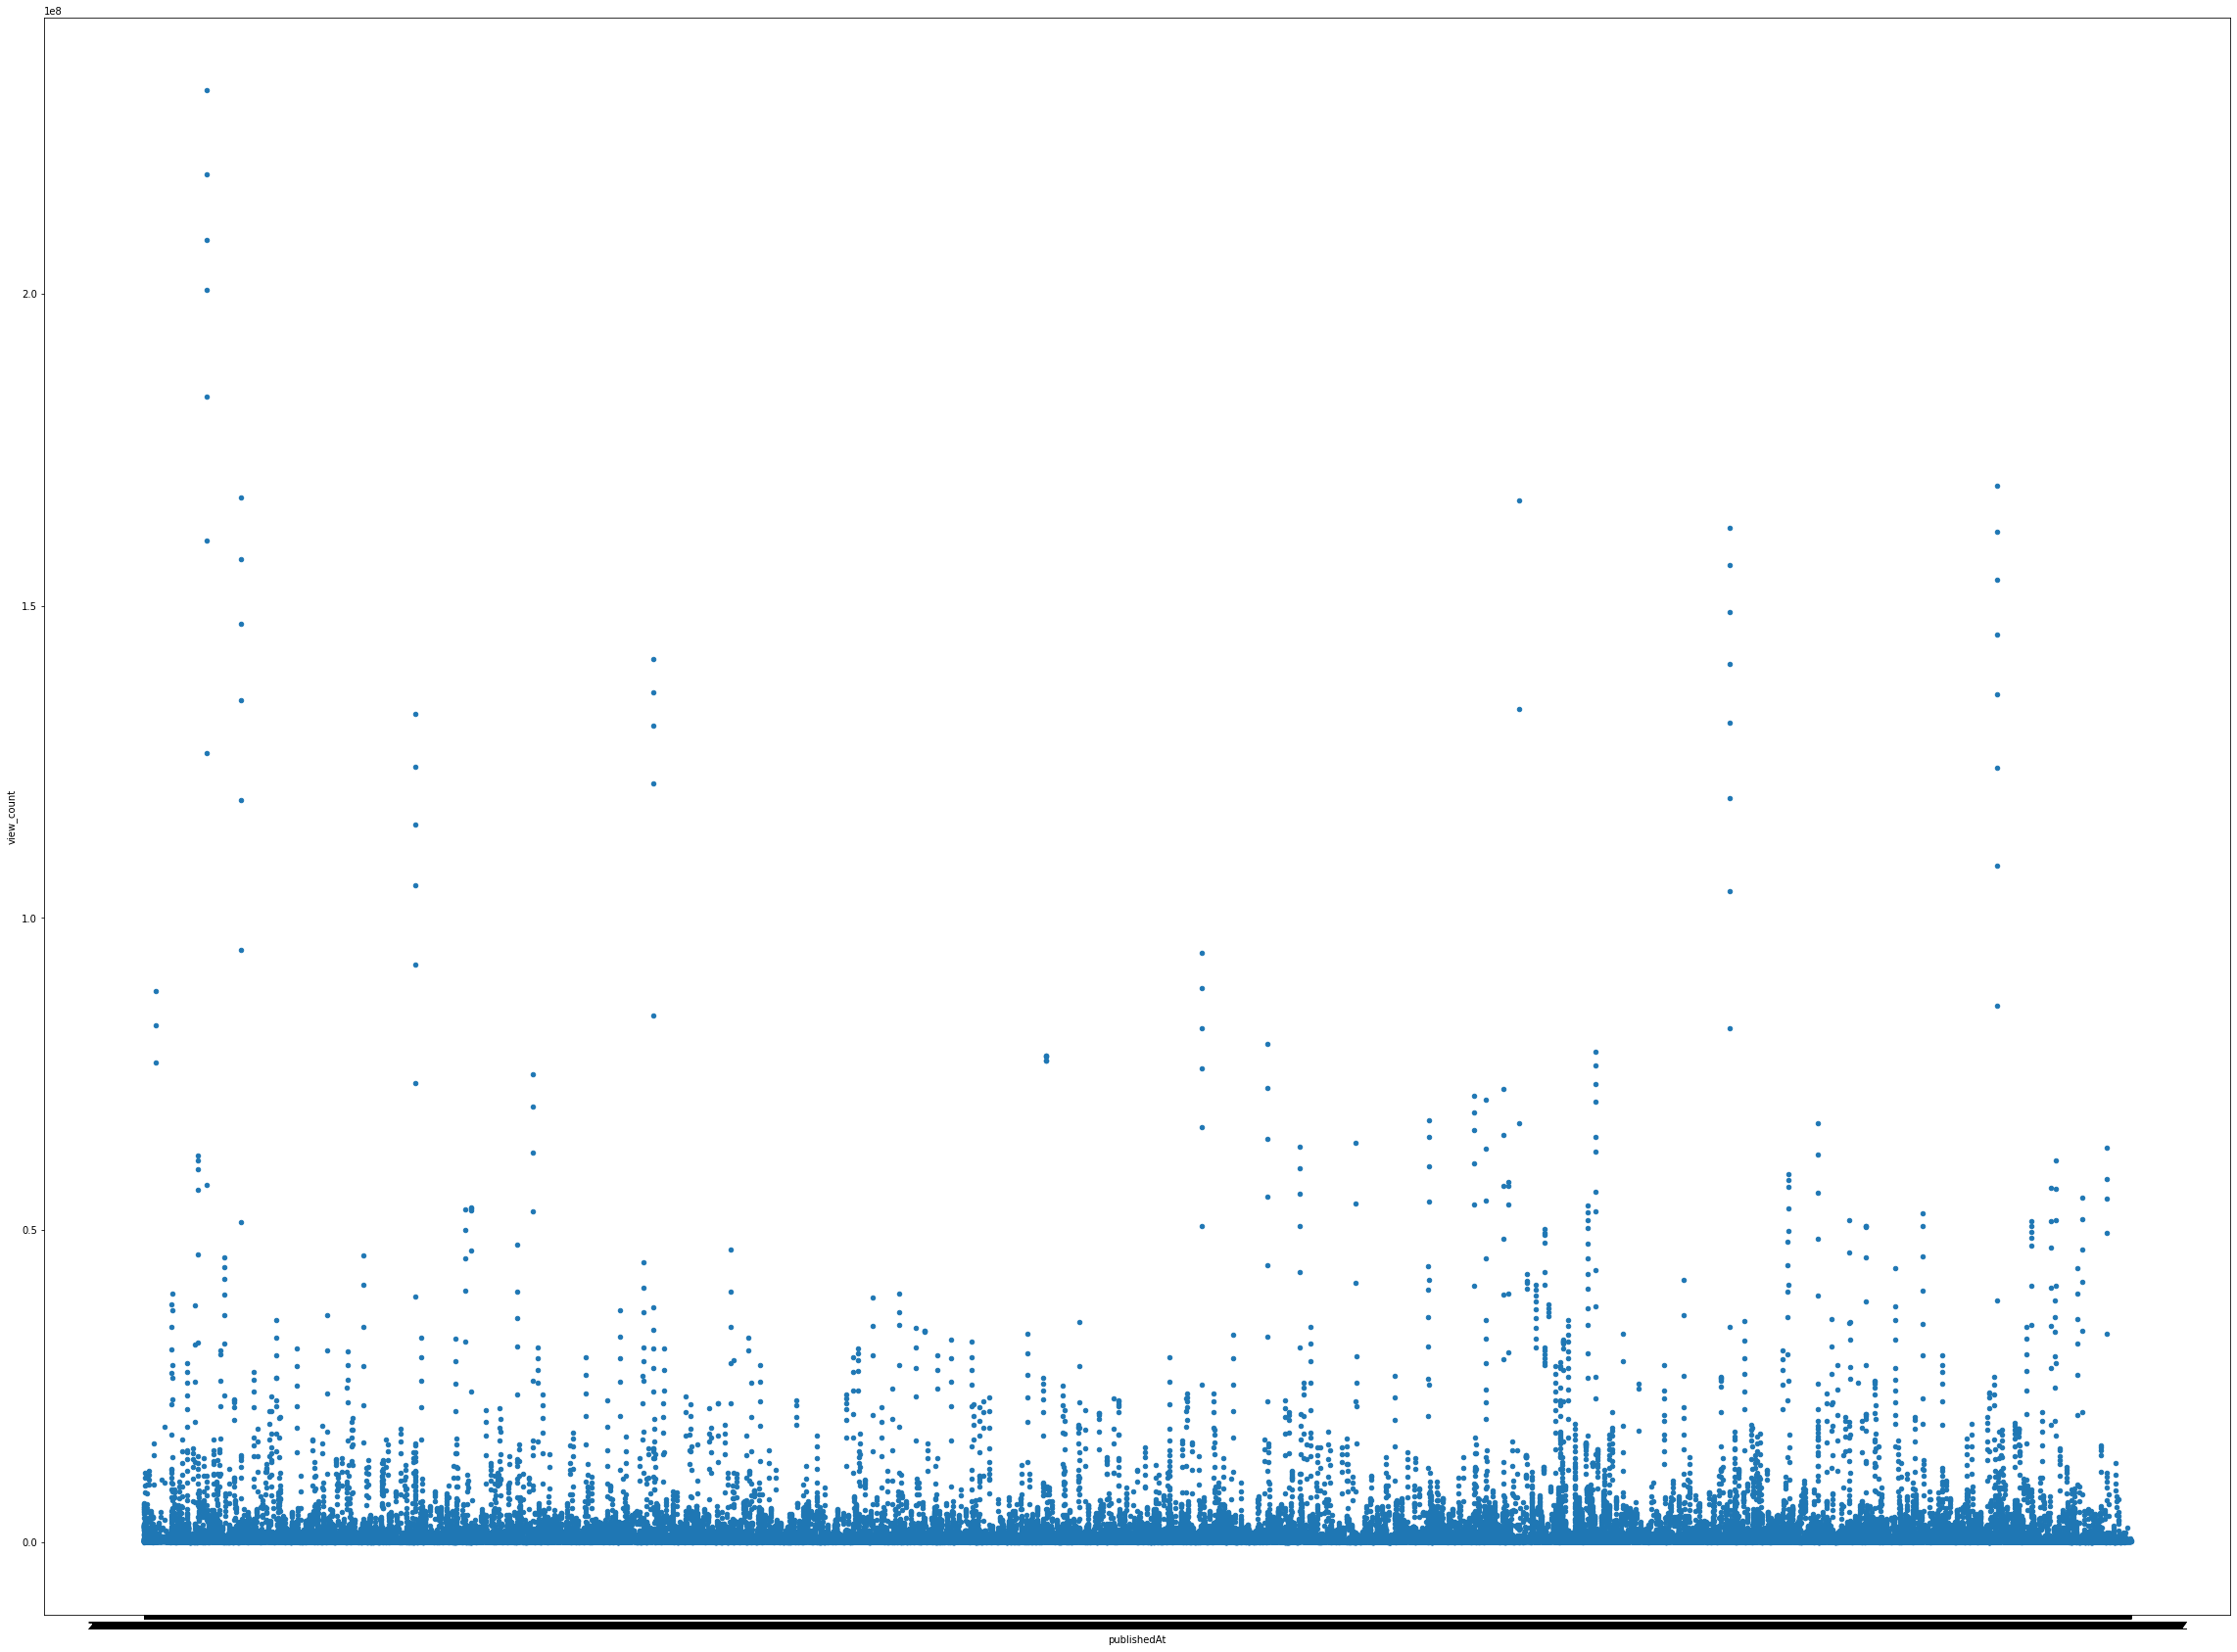

In [44]:
yt_data.plot(figsize=(40, 30),kind='scatter',x='publishedAt',y='view_count')

In [50]:
from datetime import datetime
from datetime import date
date = yt_data['publishedAt'][0]
print(date)
only_date = date[:10]
date_time_obj = datetime.strptime(only_date, '%Y-%m-%d')
print(date_time_obj.weekday())

2020-08-11T16:00:31Z
1


In [58]:
for i,date in enumerate(yt_data['publishedAt']):
    print(date)
    only_date = date[:10]
    date_time_obj = datetime.strptime(only_date, '%Y-%m-%d')
    print(date_time_obj.weekday())
    print(yt_data['view_count'][i])

2020-08-11T16:00:31Z
1
1943013
2020-08-11T10:55:22Z
1
1823553
2020-08-12T10:00:11Z
2
196340
2020-08-11T16:00:08Z
1
311609
2020-08-12T08:00:05Z
2
100691
2020-08-09T08:02:05Z
6
4894736
2020-08-10T18:00:03Z
0
2282505
2020-08-12T11:41:53Z
2
73297
2020-08-09T12:28:41Z
6
3895369
2020-08-12T07:50:03Z
2
39307
2020-08-09T11:00:03Z
6
2173879
2020-08-11T15:00:13Z
1
6000070
2020-08-11T10:30:02Z
1
64653
2020-08-11T16:30:44Z
1
104160
2020-08-11T17:00:10Z
1
2381688
2020-08-10T10:00:04Z
0
978497
2020-08-11T15:00:05Z
1
138310
2020-08-11T14:35:09Z
1
69139
2020-08-11T18:15:05Z
1
75653
2020-08-11T16:34:46Z
1
137959
2020-08-11T19:05:32Z
1
961474
2020-08-11T16:33:22Z
1
77703
2020-08-11T07:35:52Z
1
56380
2020-08-09T15:00:04Z
6
1220896
2020-08-11T19:14:45Z
1
77123
2020-08-11T21:35:24Z
1
64639
2020-08-09T11:39:43Z
6
1261651
2020-08-11T16:00:30Z
1
51427
2020-08-11T09:00:13Z
1
3433885
2020-08-10T16:27:52Z
0
139215
2020-08-11T09:55:13Z
1
126896
2020-08-10T17:45:11Z
0
165803
2020-08-11T18:03:12Z
1
2228821
2020-08-

2020-08-09T10:00:02Z
6
400128
2020-08-10T12:00:22Z
0
74747
2020-08-08T21:19:26Z
5
3954424
2020-08-11T17:02:56Z
1
164400
2020-08-10T18:30:06Z
0
117061
2020-08-09T19:31:03Z
6
122144
2020-08-11T07:30:02Z
1
13840792
2020-08-09T07:00:12Z
6
213729
2020-08-10T08:49:41Z
0
44903
2020-08-09T16:00:13Z
6
113618
2020-08-10T20:06:16Z
0
617413
2020-08-10T19:00:01Z
0
222294
2020-08-11T15:03:43Z
1
115945
2020-08-09T08:26:05Z
6
138817
2020-08-10T13:00:07Z
0
1280097
2020-08-09T16:00:11Z
6
59221
2020-08-12T10:18:36Z
2
54700
2020-08-08T21:11:38Z
5
2379421
2020-08-10T14:28:05Z
0
581948
2020-08-10T16:00:48Z
0
2029865
2020-08-10T18:09:51Z
0
627821
2020-08-07T04:00:10Z
4
82765322
2020-08-10T20:20:57Z
0
59590
2020-08-09T15:00:04Z
6
94821
2020-08-10T21:36:44Z
0
176212
2020-08-10T15:02:29Z
0
54875
2020-08-09T15:00:16Z
6
133251
2020-08-10T08:54:09Z
0
35225
2020-08-08T13:00:01Z
5
340288
2020-08-11T09:14:50Z
1
169451
2020-08-10T15:34:41Z
0
78831
2020-08-09T10:00:20Z
6
72990
2020-08-10T08:00:01Z
0
39206
2020-08-09T07

2
166029
2020-08-14T09:00:14Z
4
1141410
2020-08-12T15:00:12Z
2
263613
2020-08-13T18:00:04Z
3
51512
2020-08-13T15:04:59Z
3
209109
2020-08-13T19:43:00Z
3
4538433
2020-08-12T16:03:16Z
2
205577
2020-08-11T16:00:31Z
1
2749174
2020-08-13T13:00:01Z
3
7222116
2020-08-12T09:15:00Z
2
138065
2020-08-13T13:00:00Z
3
4276253
2020-08-14T09:00:01Z
4
411465
2020-08-11T10:55:22Z
1
2367730
2020-08-12T10:47:11Z
2
246099
2020-08-13T14:48:39Z
3
35387
2020-08-14T04:00:10Z
4
400052
2020-08-13T18:21:52Z
3
49768
2020-08-13T19:45:00Z
3
826948
2020-08-13T16:15:00Z
3
449572
2020-08-12T23:47:09Z
2
63547
2020-08-12T09:27:48Z
2
197818
2020-08-14T04:00:39Z
4
254467
2020-08-12T20:30:45Z
2
1122651
2020-08-12T16:00:00Z
2
140449
2020-08-13T17:04:24Z
3
888052
2020-08-11T16:00:08Z
1
481443
2020-08-12T08:00:05Z
2
216823
2020-08-13T09:39:24Z
3
39753
2020-08-14T10:09:58Z
4
89354
2020-08-12T14:10:16Z
2
159641
2020-08-13T12:26:00Z
3
63598
2020-08-12T15:42:16Z
2
504646
2020-08-12T16:08:17Z
2
87538
2020-08-12T21:41:09Z
2
93265
202

2020-08-12T13:46:18Z
2
514819
2020-08-12T19:01:36Z
2
589888
2020-08-12T16:01:14Z
2
57253
2020-08-12T09:15:00Z
2
56743
2020-08-12T10:00:11Z
2
35111
2020-08-12T16:00:10Z
2
68304
2020-08-09T11:00:03Z
6
2720626
2020-08-12T11:41:53Z
2
176477
2020-08-11T18:03:12Z
1
5519483
2020-08-14T10:09:58Z
4
98358
2020-08-11T10:30:02Z
1
117942
2020-08-11T16:33:22Z
1
138536
2020-08-12T09:00:02Z
2
47815
2020-08-10T10:00:04Z
0
1331244
2020-08-13T23:00:00Z
3
259722
2020-08-11T21:35:24Z
1
140533
2020-08-12T17:30:04Z
2
70714
2020-08-11T18:15:05Z
1
135494
2020-08-12T14:36:05Z
2
52352
2020-08-11T14:35:09Z
1
130772
2020-08-03T21:51:14Z
0
3793289
2020-08-12T15:42:16Z
2
546207
2020-08-11T17:00:10Z
1
3387830
2020-08-13T15:00:10Z
3
1578825
2020-08-12T21:19:07Z
2
43135
2020-08-10T18:00:03Z
0
2690359
2020-08-12T10:00:12Z
2
41028
2020-08-11T09:00:13Z
1
10411127
2020-08-12T14:00:15Z
2
424169
2020-08-11T07:35:52Z
1
111815
2020-08-12T08:00:05Z
2
225512
2020-08-13T10:01:13Z
3
106733
2020-08-12T15:00:19Z
2
308653
2020-08-12T

4
111221
2020-08-13T23:00:04Z
3
621447
2020-08-14T10:00:08Z
4
1057540
2020-08-13T16:15:00Z
3
542680
2020-08-14T21:36:04Z
4
127789
2020-08-14T21:00:07Z
4
89389
2020-08-14T16:18:17Z
4
698996
2020-08-13T17:15:01Z
3
169593
2020-08-14T14:00:12Z
4
49654
2020-08-13T23:00:19Z
3
825807
2020-08-14T16:00:08Z
4
77019
2020-08-14T18:52:13Z
4
41571
2020-08-14T16:00:10Z
4
47770
2020-08-14T08:01:01Z
4
89524
2020-08-13T20:07:45Z
3
5319704
2020-08-14T15:30:01Z
4
43118
2020-08-14T04:00:10Z
4
2002502
2020-08-14T15:00:07Z
4
55955
2020-08-12T10:00:11Z
2
1257940
2020-08-13T15:45:00Z
3
243858
2020-08-15T12:00:09Z
5
228060
2020-08-14T15:00:26Z
4
5736196
2020-08-13T21:01:56Z
3
66532
2020-08-12T23:33:20Z
2
929558
2020-08-14T18:00:09Z
4
475508
2020-08-15T15:00:08Z
5
211452
2020-08-14T12:30:01Z
4
96645
2020-08-14T20:00:01Z
4
670701
2020-08-15T15:00:10Z
5
85289
2020-08-13T14:58:26Z
3
157127
2020-08-13T08:39:21Z
3
239660
2020-08-13T15:56:34Z
3
918819
2020-08-13T10:54:57Z
3
407648
2020-08-12T11:39:04Z
2
697367
2020-08

163538
2020-08-17T15:30:47Z
0
316629
2020-08-16T06:00:09Z
6
1403537
2020-08-18T15:00:13Z
1
164794
2020-08-19T10:00:01Z
2
81233
2020-08-18T13:00:13Z
1
1775971
2020-08-18T10:54:02Z
1
68667
2020-08-16T08:40:12Z
6
2278456
2020-08-18T12:12:53Z
1
38583
2020-08-18T21:47:52Z
1
179444
2020-08-17T14:00:07Z
0
290657
2020-08-18T12:03:12Z
1
57214
2020-08-17T21:59:54Z
0
12098093
2020-08-16T09:44:53Z
6
2068046
2020-08-18T09:14:04Z
1
1293423
2020-08-17T16:00:13Z
0
62144
2020-08-17T09:00:00Z
0
9493674
2020-08-18T17:00:12Z
1
89511
2020-08-17T16:15:29Z
0
178345
2020-08-18T11:23:47Z
1
57641
2020-08-16T13:00:28Z
6
521486
2020-08-19T09:15:01Z
2
659758
2020-08-19T09:16:42Z
2
185540
2020-08-16T09:01:32Z
6
2150853
2020-08-18T19:44:25Z
1
72948
2020-08-17T18:04:48Z
0
179370
2020-08-17T19:14:57Z
0
1090364
2020-08-16T08:30:04Z
6
534551
2020-08-17T20:00:13Z
0
19206198
2020-08-17T16:30:05Z
0
141025
2020-08-17T15:00:08Z
0
44441
2020-08-18T12:00:32Z
1
161418
2020-08-18T07:00:10Z
1
2574120
2020-08-17T15:30:14Z
0
190877

2020-08-20T22:00:15Z
3
134142
2020-08-20T16:00:06Z
3
213081
2020-08-22T04:00:05Z
5
493777
2020-08-21T22:00:09Z
4
794179
2020-08-20T16:15:23Z
3
364717
2020-08-19T14:00:03Z
2
1015679
2020-08-21T21:34:22Z
4
97246
2020-08-19T15:15:34Z
2
825984
2020-08-21T04:27:43Z
4
399101
2020-08-21T15:00:18Z
4
214045
2020-08-21T16:00:06Z
4
41598
2020-08-20T19:00:09Z
3
5904938
2020-08-20T15:02:40Z
3
331319
2020-08-21T13:30:06Z
4
27380
2020-08-21T21:40:41Z
4
310071
2020-08-20T22:03:50Z
3
106074
2020-08-20T22:08:43Z
3
47143
2020-08-22T07:10:52Z
5
33620
2020-08-21T16:00:02Z
4
57167
2020-08-20T17:00:06Z
3
151748
2020-08-20T15:00:10Z
3
184475
2020-08-21T16:55:57Z
4
476693
2020-08-21T16:30:03Z
4
30578
2020-08-21T15:00:14Z
4
3089012
2020-08-21T04:00:09Z
4
1028507
2020-08-21T04:00:08Z
4
7673141
2020-08-18T10:01:54Z
1
1214755
2020-08-20T09:53:31Z
3
169501
2020-08-21T07:00:04Z
4
1268608
2020-08-20T15:21:03Z
3
81815
2020-08-20T18:41:58Z
3
84000
2020-08-21T22:00:10Z
4
353347
2020-08-21T10:00:37Z
4
130009
2020-08-21T1

2020-08-19T15:00:19Z
2
344797
2020-08-20T13:42:34Z
3
330524
2020-08-20T13:59:45Z
3
181537
2020-08-20T16:15:01Z
3
382079
2020-08-21T10:00:37Z
4
138472
2020-08-20T02:00:00Z
3
5551027
2020-08-20T14:00:10Z
3
2266759
2020-08-20T14:00:10Z
3
2266759
2020-08-20T15:16:21Z
3
43564
2020-08-20T13:01:26Z
3
71894
2020-08-21T19:00:10Z
4
548647
2020-08-20T21:31:36Z
3
375629
2020-08-20T19:38:21Z
3
49665
2020-08-19T17:00:24Z
2
265201
2020-08-18T15:00:02Z
1
61128258
2020-08-20T16:45:13Z
3
82748
2020-08-20T16:04:54Z
3
275088
2020-08-19T19:30:22Z
2
79150
2020-08-20T21:15:09Z
3
1263348
2020-08-20T18:21:07Z
3
116222
2020-08-20T13:08:06Z
3
98767
2020-08-19T16:03:25Z
2
211592
2020-08-21T04:00:02Z
4
439134
2020-08-19T15:30:13Z
2
191894
2020-08-21T15:00:08Z
4
39223
2020-08-19T19:00:04Z
2
70027
2020-08-20T15:00:19Z
3
456440
2020-08-19T14:59:44Z
2
448605
2020-08-20T08:59:59Z
3
4310937
2020-08-19T15:00:12Z
2
208226
2020-08-20T10:30:02Z
3
132414
2020-08-18T10:00:17Z
1
789640
2020-08-19T15:59:47Z
2
180760
2020-08-19T

3871629
2020-08-19T11:00:13Z
2
88637
2020-08-19T16:00:32Z
2
119410
2020-08-19T15:59:47Z
2
186496
2020-08-21T08:17:19Z
4
100722
2020-08-19T16:00:18Z
2
131905
2020-08-19T16:30:02Z
2
107962
2020-08-19T13:56:17Z
2
164918
2020-08-19T07:14:24Z
2
288383
2020-08-21T04:00:10Z
4
1403128
2020-08-15T14:53:51Z
5
16387889
2020-08-19T16:00:31Z
2
84990
2020-08-19T12:00:07Z
2
90758
2020-08-18T16:30:02Z
1
421716
2020-08-18T23:57:25Z
1
449024
2020-08-19T16:00:00Z
2
52641
2020-08-19T15:03:12Z
2
73580
2020-08-21T10:04:17Z
4
81419
2020-08-20T03:30:03Z
3
13517288
2020-08-19T09:00:00Z
2
6766639
2020-08-20T03:34:56Z
3
1074419
2020-08-19T15:00:30Z
2
54330
2020-08-18T17:15:00Z
1
214855
2020-08-19T20:43:55Z
2
4968771
2020-08-18T16:41:01Z
1
190781
2020-08-18T15:00:13Z
1
213895
2020-08-20T09:15:44Z
3
220792
2020-08-18T15:59:33Z
1
557794
2020-08-18T20:26:00Z
1
1054879
2020-08-18T14:00:14Z
1
8192513
2020-08-18T16:15:00Z
1
97265
2020-08-17T08:58:11Z
0
28602488
2020-08-20T03:00:05Z
3
1031837
2020-08-19T15:00:08Z
2
5358

2020-08-24T14:59:53Z
0
2603319
2020-08-24T11:33:43Z
0
50726
2020-08-22T17:27:11Z
5
10936020
2020-08-22T10:17:39Z
5
162169
2020-08-23T08:00:11Z
6
44211
2020-08-24T15:00:03Z
0
601327
2020-08-23T18:00:06Z
6
44881
2020-08-23T09:00:18Z
6
71319
2020-08-23T15:00:04Z
6
925765
2020-08-22T19:24:40Z
5
54920
2020-08-23T10:00:02Z
6
425004
2020-08-24T11:20:53Z
0
65027
2020-08-22T18:30:05Z
5
72582
2020-08-23T16:30:00Z
6
45721
2020-08-22T21:55:25Z
5
81456
2020-08-22T11:00:03Z
5
147851
2020-08-22T15:02:03Z
5
233670
2020-08-21T13:53:35Z
4
4382322
2020-08-22T11:00:01Z
5
94525
2020-08-22T09:00:06Z
5
1766222
2020-08-21T16:18:02Z
4
1007081
2020-08-22T10:36:37Z
5
252493
2020-08-21T15:21:27Z
4
273622
2020-08-22T04:00:05Z
5
2327232
2020-08-21T16:00:09Z
4
373255
2020-08-23T11:00:00Z
6
70914
2020-08-20T22:05:38Z
3
950774
2020-08-21T16:00:12Z
4
264972
2020-08-21T16:01:06Z
4
235097
2020-08-20T22:03:58Z
3
582180
2020-08-21T16:28:08Z
4
3336587
2020-08-21T04:00:08Z
4
16493052
2020-08-21T22:00:09Z
4
2045985
2020-08-20

2020-08-27T13:53:20Z
3
123883
2020-08-26T17:54:33Z
2
5468656
2020-08-26T10:00:29Z
2
688823
2020-08-26T13:12:02Z
2
254495
2020-08-27T16:00:15Z
3
29318
2020-08-25T15:15:32Z
1
912284
2020-08-27T18:59:06Z
3
735122
2020-08-27T22:01:29Z
3
63554
2020-08-26T13:02:05Z
2
424703
2020-08-27T14:30:04Z
3
124761
2020-08-26T15:59:12Z
2
127870
2020-08-27T18:15:09Z
3
1319280
2020-08-28T07:00:06Z
4
452358
2020-08-28T04:00:03Z
4
208171
2020-08-27T14:17:57Z
3
91076
2020-08-26T15:00:00Z
2
116971
2020-08-27T18:33:29Z
3
481336
2020-08-26T16:41:39Z
2
1481821
2020-08-26T15:46:12Z
2
145151
2020-08-25T13:59:32Z
1
303167
2020-08-25T18:00:11Z
1
237862
2020-08-26T17:12:04Z
2
537864
2020-08-27T16:00:02Z
3
43640
2020-08-25T18:00:08Z
1
175072
2020-08-26T14:59:51Z
2
90299
2020-08-26T16:00:07Z
2
80250
2020-08-27T22:01:11Z
3
58325
2020-08-27T07:00:07Z
3
749061
2020-08-26T09:30:02Z
2
85244
2020-08-26T15:01:47Z
2
48629
2020-08-26T18:15:13Z
2
48035
2020-08-26T08:00:12Z
2
38302
2020-08-26T16:16:07Z
2
39140
2020-08-26T16:00:11

2020-08-27T14:14:41Z
3
1066777
2020-08-28T04:00:11Z
4
118872753
2020-08-28T16:01:16Z
4
453210
2020-08-29T11:27:08Z
5
97102
2020-08-29T09:00:18Z
5
159102
2020-08-30T09:00:40Z
6
155774
2020-08-29T11:31:06Z
5
122623
2020-08-28T16:00:16Z
4
592213
2020-08-28T14:00:03Z
4
470203
2020-08-29T20:44:46Z
5
54812
2020-08-28T17:02:04Z
4
303924
2020-08-28T15:00:10Z
4
221147
2020-08-29T12:30:08Z
5
35237
2020-08-27T15:05:04Z
3
1400288
2020-08-28T16:00:32Z
4
375136
2020-08-27T12:30:05Z
3
1696832
2020-08-27T16:45:00Z
3
2342506
2020-08-29T20:44:46Z
5
581044
2020-08-28T19:57:09Z
4
296105
2020-08-29T17:50:27Z
5
280182
2020-08-29T19:52:24Z
5
87859
2020-08-28T18:00:27Z
4
127804
2020-08-28T12:41:50Z
4
104349
2020-08-27T14:00:04Z
3
614396
2020-08-29T12:29:39Z
5
29629
2020-08-28T16:00:01Z
4
579335
2020-08-27T22:00:29Z
3
282875
2020-08-28T10:18:45Z
4
164299
2020-08-28T16:15:01Z
4
104028
2020-08-27T19:00:09Z
3
12016332
2020-08-29T08:15:00Z
5
35215
2020-08-29T15:02:02Z
5
112125
2020-08-26T10:00:19Z
2
2044119
2020-0

4
137870
2020-08-28T16:00:05Z
4
684940
2020-08-28T16:00:10Z
4
47188
2020-08-27T12:43:49Z
3
264631
2020-08-29T10:05:27Z
5
323401
2020-08-27T19:30:10Z
3
1818390
2020-08-28T16:00:12Z
4
88553
2020-08-27T14:08:03Z
3
85832
2020-08-27T10:06:56Z
3
108404
2020-08-27T22:02:45Z
3
77766
2020-08-28T07:00:06Z
4
3369700
2020-08-27T10:03:33Z
3
61400
2020-08-26T14:00:51Z
2
1103597
2020-08-27T18:59:06Z
3
2931190
2020-08-27T18:33:25Z
3
116842
2020-08-27T08:00:05Z
3
170156
2020-08-27T06:00:10Z
3
10068572
2020-08-27T09:22:54Z
3
138815
2020-08-26T14:53:45Z
2
425886
2020-08-27T22:01:29Z
3
268956
2020-08-27T19:59:12Z
3
868525
2020-08-27T16:00:30Z
3
64800
2020-08-27T18:30:04Z
3
114870
2020-08-27T00:00:06Z
3
22665697
2020-08-27T16:31:48Z
3
224247
2020-08-26T16:00:07Z
2
244146
2020-08-26T16:03:13Z
2
355178
2020-08-28T12:19:07Z
4
432404
2020-08-27T16:00:15Z
3
55221
2020-08-27T16:00:02Z
3
70565
2020-08-25T15:59:48Z
1
1047295
2020-08-26T13:02:05Z
2
784332
2020-08-28T04:00:15Z
4
809114
2020-08-27T18:15:09Z
3
2484403

2020-08-28T14:29:53Z
4
1139767
2020-08-31T12:00:13Z
0
385428
2020-08-29T17:50:27Z
5
384094
2020-08-30T10:00:48Z
6
172640
2020-08-31T12:00:11Z
0
1082394
2020-08-31T09:30:02Z
0
27449
2020-08-28T04:00:11Z
4
157579369
2020-08-29T09:00:18Z
5
262530
2020-08-31T15:00:01Z
0
213916
2020-08-29T18:05:10Z
5
93370
2020-08-28T14:00:03Z
4
794932
2020-08-29T11:27:08Z
5
163461
2020-08-30T11:00:28Z
6
70746
2020-08-30T14:39:52Z
6
53342
2020-08-29T11:31:06Z
5
201274
2020-08-31T03:19:28Z
0
1498779
2020-08-30T15:21:15Z
6
36187
2020-08-28T16:00:32Z
4
544558
2020-08-31T15:45:00Z
0
137142
2020-08-31T01:34:18Z
0
5455655
2020-08-28T16:00:16Z
4
772383
2020-08-30T08:30:12Z
6
54198
2020-08-29T20:44:46Z
5
999194
2020-08-31T15:00:25Z
0
163918
2020-08-30T16:00:12Z
6
42884
2020-08-28T15:00:10Z
4
317454
2020-08-29T12:30:08Z
5
62388
2020-08-30T10:00:22Z
6
426618
2020-08-28T17:02:04Z
4
355407
2020-08-30T16:00:05Z
6
86217
2020-08-31T15:15:03Z
0
106078
2020-08-30T14:00:10Z
6
358777
2020-08-27T15:05:04Z
3
1628615
2020-08-30T

2020-09-03T16:00:09Z
3
50609
2020-09-02T08:39:08Z
2
339219
2020-09-02T15:04:30Z
2
226390
2020-09-02T10:54:43Z
2
233180
2020-08-31T17:08:22Z
0
4835027
2020-09-01T14:00:14Z
1
536253
2020-09-03T16:00:15Z
3
37181
2020-09-03T19:00:06Z
3
3326285
2020-09-02T10:00:01Z
2
13780891
2020-09-03T05:43:55Z
3
69606
2020-09-03T11:00:01Z
3
2821584
2020-09-03T23:00:11Z
3
2640821
2020-09-03T16:00:12Z
3
29973
2020-09-04T07:00:06Z
4
105922
2020-09-01T15:30:26Z
1
476489
2020-09-03T15:00:10Z
3
29893
2020-09-03T07:31:52Z
3
71234
2020-09-04T04:00:11Z
4
753923
2020-09-04T05:28:22Z
4
191720
2020-09-03T04:47:40Z
3
205368
2020-09-02T10:27:49Z
2
129501
2020-09-02T16:48:48Z
2
10824455
2020-09-04T08:38:45Z
4
185712
2020-09-01T10:00:01Z
1
390834
2020-09-02T09:00:11Z
2
13067812
2020-09-02T14:15:00Z
2
128176
2020-09-01T14:02:30Z
1
276131
2020-09-01T16:33:34Z
1
330204
2020-09-03T16:00:06Z
3
75695
2020-09-02T16:00:02Z
2
85519
2020-09-02T14:00:09Z
2
506366
2020-09-02T07:42:35Z
2
72167
2020-09-03T15:01:58Z
3
156882
2020-09-0

2020-09-01T16:00:11Z
1
291702
2020-09-03T15:01:58Z
3
170721
2020-09-04T03:57:24Z
4
206395
2020-09-02T08:39:08Z
2
374633
2020-09-01T16:00:01Z
1
180555
2020-09-01T17:44:16Z
1
275211
2020-09-02T07:13:45Z
2
30877
2020-09-02T13:37:21Z
2
475752
2020-09-01T16:02:05Z
1
345861
2020-09-02T17:00:06Z
2
101847
2020-09-02T13:00:14Z
2
60233
2020-08-31T16:30:35Z
0
743138
2020-09-02T15:00:09Z
2
451753
2020-09-02T11:28:30Z
2
56632
2020-09-02T15:30:01Z
2
66534
2020-08-30T08:01:30Z
6
3179517
2020-09-02T08:00:05Z
2
115150
2020-09-01T16:00:08Z
1
197385
2020-09-02T19:00:11Z
2
919633
2020-08-31T19:08:47Z
0
442903
2020-09-01T15:59:32Z
1
720210
2020-09-02T02:00:05Z
2
9528290
2020-09-01T21:43:32Z
1
1290009
2020-09-01T16:00:00Z
1
67149
2020-09-01T16:49:57Z
1
179846
2020-09-01T10:35:22Z
1
734140
2020-09-02T15:59:04Z
2
35236
2020-09-01T04:00:11Z
1
16116263
2020-09-01T16:15:02Z
1
159431
2020-09-01T15:00:04Z
1
153298
2020-09-02T16:30:06Z
2
56095
2020-09-02T16:00:15Z
2
114027
2020-09-01T15:15:03Z
1
1401356
2020-09-01T

4
2072273
2020-09-06T06:30:01Z
6
41773
2020-09-06T07:44:41Z
6
27365
2020-09-06T10:00:05Z
6
97503
2020-09-06T16:00:06Z
6
132781
2020-09-04T14:31:00Z
4
318650
2020-09-06T12:00:01Z
6
57218
2020-09-06T09:40:41Z
6
352659
2020-09-06T16:12:53Z
6
133965
2020-09-05T12:16:25Z
5
121137
2020-09-05T10:01:07Z
5
191935
2020-09-04T04:15:41Z
4
26346022
2020-09-06T11:00:13Z
6
28035
2020-09-06T12:00:10Z
6
430727
2020-09-05T13:12:59Z
5
103342
2020-09-03T22:02:52Z
3
597390
2020-09-03T22:03:37Z
3
583544
2020-09-05T12:00:04Z
5
186789
2020-09-05T18:18:36Z
5
254246
2020-09-05T14:27:47Z
5
77313
2020-09-04T15:00:06Z
4
337619
2020-09-06T01:24:59Z
6
1996904
2020-09-05T17:52:04Z
5
94175
2020-09-06T08:00:09Z
6
47993
2020-09-04T16:18:11Z
4
843067
2020-09-05T09:04:22Z
5
103281
2020-09-06T15:07:18Z
6
141468
2020-09-04T16:30:01Z
4
601274
2020-09-07T04:27:52Z
0
333750
2020-09-05T12:30:58Z
5
1051484
2020-09-05T15:06:53Z
5
1000300
2020-09-03T14:00:03Z
3
1267191
2020-09-06T08:00:03Z
6
27746
2020-09-05T11:58:51Z
5
318863
202

2020-09-05T16:17:55Z
5
177822
2020-09-04T04:00:09Z
4
6895385
2020-09-04T22:29:31Z
4
48954
2020-09-03T15:15:06Z
3
1270938
2020-09-05T10:02:38Z
5
345745
2020-09-04T04:00:09Z
4
5554450
2020-09-03T16:34:27Z
3
284946
2020-09-05T10:00:10Z
5
127473
2020-09-04T22:04:17Z
4
81221
2020-09-04T17:28:47Z
4
57851
2020-09-04T15:00:10Z
4
63371
2020-09-05T16:14:53Z
5
25273
2020-09-02T10:00:43Z
2
1924717
2020-09-03T22:04:27Z
3
104945
2020-09-04T04:00:13Z
4
6316158
2020-09-06T01:24:37Z
6
3271366
2020-09-04T09:53:55Z
4
189333
2020-09-04T16:00:05Z
4
58504
2020-09-03T15:00:30Z
3
1324348
2020-09-04T07:34:06Z
4
49824
2020-09-04T15:00:16Z
4
105621
2020-09-04T01:00:11Z
4
7886527
2020-09-04T16:00:02Z
4
51019
2020-09-04T14:30:01Z
4
84202
2020-09-04T14:00:11Z
4
1424976
2020-09-04T12:00:28Z
4
56983
2020-09-04T05:28:22Z
4
1540540
2020-09-03T16:00:09Z
3
335634
2020-09-03T22:00:01Z
3
221218
2020-09-04T15:31:15Z
4
83101
2020-09-02T16:00:12Z
2
639535
2020-09-03T16:30:01Z
3
452547
2020-09-04T05:03:59Z
4
53317
2020-09-04T1

38650
2020-09-07T14:53:00Z
0
166077
2020-09-06T16:30:12Z
6
201449
2020-09-08T16:35:23Z
1
51198
2020-09-08T06:48:24Z
1
162079
2020-09-06T08:04:34Z
6
303032
2020-09-06T08:11:30Z
6
519874
2020-09-06T12:00:13Z
6
237141
2020-09-08T16:01:20Z
1
192668
2020-09-06T15:54:43Z
6
121794
2020-09-07T16:30:05Z
0
190085
2020-09-07T09:01:54Z
0
8079471
2020-09-06T12:00:07Z
6
130210
2020-09-06T11:00:12Z
6
1747582
2020-09-06T14:00:01Z
6
179417
2020-09-06T17:22:57Z
6
94865
2020-09-05T16:21:26Z
5
267371
2020-09-06T12:05:22Z
6
159363
2020-09-04T14:59:57Z
4
1276713
2020-09-08T08:30:41Z
1
236136
2020-09-05T16:30:00Z
5
563405
2020-09-04T16:00:25Z
4
2511898
2020-09-06T23:30:01Z
6
2769637
2020-09-06T18:45:01Z
6
59800
2020-09-04T15:00:10Z
4
1509270
2020-09-07T15:45:03Z
0
156688
2020-09-06T08:00:04Z
6
109541
2020-09-06T16:12:53Z
6
236561
2020-09-07T19:56:12Z
0
295406
2020-09-05T09:12:41Z
5
703617
2020-09-06T12:59:31Z
6
129764
2020-09-06T09:00:03Z
6
69512
2020-09-04T16:00:24Z
4
1974423
2020-09-06T13:01:10Z
6
82036
20

1
1561009
2020-09-09T17:35:21Z
2
348935
2020-09-08T16:00:07Z
1
1286833
2020-09-10T15:01:06Z
3
57771
2020-09-10T09:00:10Z
3
8289529
2020-09-09T16:18:40Z
2
242720
2020-09-10T16:15:04Z
3
436010
2020-09-11T00:00:10Z
4
758916
2020-09-10T16:05:42Z
3
701408
2020-09-09T08:32:17Z
2
463243
2020-09-08T23:10:53Z
1
555365
2020-09-10T18:32:18Z
3
912349
2020-09-09T16:00:10Z
2
1042231
2020-09-10T16:00:18Z
3
34236
2020-09-09T15:30:11Z
2
79942
2020-09-10T18:30:02Z
3
369507
2020-09-09T17:05:28Z
2
3709147
2020-09-09T17:00:18Z
2
94005
2020-09-08T16:01:17Z
1
1557037
2020-09-08T16:15:09Z
1
614224
2020-09-09T14:30:01Z
2
337583
2020-09-09T14:00:02Z
2
155691
2020-09-08T18:21:47Z
1
392622
2020-09-10T17:00:16Z
3
56348
2020-09-08T20:53:42Z
1
346932
2020-09-09T16:00:01Z
2
103610
2020-09-08T15:59:12Z
1
438072
2020-09-10T04:00:03Z
3
433254
2020-09-09T17:00:07Z
2
204607
2020-09-10T17:00:10Z
3
6118279
2020-09-09T14:00:01Z
2
70095
2020-09-11T10:00:02Z
4
89129
2020-09-09T14:00:04Z
2
534486
2020-09-09T10:15:22Z
2
1813410


2020-09-11T10:07:30Z
4
380544
2020-09-11T16:00:03Z
4
389442
2020-09-12T08:00:06Z
5
160540
2020-09-12T16:00:04Z
5
57311
2020-09-11T15:49:39Z
4
401395
2020-09-13T08:18:28Z
6
41236
2020-09-12T21:00:01Z
5
1353929
2020-09-12T12:30:08Z
5
929007
2020-09-11T09:09:01Z
4
624078
2020-09-10T16:00:23Z
3
5425882
2020-09-11T16:00:00Z
4
284186
2020-09-10T15:00:07Z
3
1181221
2020-09-11T10:00:09Z
4
518324
2020-09-11T16:00:16Z
4
291795
2020-09-12T16:28:54Z
5
46589
2020-09-10T10:00:09Z
3
1332399
2020-09-12T10:00:28Z
5
55337
2020-09-13T08:00:13Z
6
40811
2020-09-13T08:15:00Z
6
281145
2020-09-12T08:58:53Z
5
60196
2020-09-12T16:06:33Z
5
33026
2020-09-11T14:00:00Z
4
184931
2020-09-11T19:13:54Z
4
190330
2020-09-12T09:59:39Z
5
93390
2020-09-11T15:55:14Z
4
1861604
2020-09-12T16:34:25Z
5
46631
2020-09-12T11:00:12Z
5
54943
2020-09-12T10:00:04Z
5
77745
2020-09-11T15:00:02Z
4
150181
2020-09-10T16:15:04Z
3
501671
2020-09-11T15:00:04Z
4
129221
2020-09-12T13:08:00Z
5
40988
2020-09-11T15:30:02Z
4
99025
2020-09-11T16:00:0

2020-09-14T16:30:02Z
0
255569
2020-09-15T13:30:07Z
1
113049
2020-09-14T17:00:12Z
0
90878
2020-09-16T06:00:01Z
2
63900
2020-09-15T18:30:34Z
1
8536586
2020-09-15T17:00:27Z
1
53858
2020-09-16T03:00:06Z
2
1427551
2020-09-15T16:00:00Z
1
93428
2020-09-14T18:13:57Z
0
123911
2020-09-15T08:42:35Z
1
63565
2020-09-13T10:00:09Z
6
649480
2020-09-14T16:00:02Z
0
177344
2020-09-13T15:44:46Z
6
605062
2020-09-14T15:45:00Z
0
106143
2020-09-14T16:00:07Z
0
128148
2020-09-15T14:00:11Z
1
27615
2020-09-15T17:44:09Z
1
700531
2020-09-14T10:00:10Z
0
270966
2020-09-14T16:00:01Z
0
223054
2020-09-15T01:00:02Z
1
36008
2020-09-14T16:45:10Z
0
62194
2020-09-13T10:45:43Z
6
442957
2020-09-13T16:05:10Z
6
338031
2020-09-14T23:00:09Z
0
2148076
2020-09-15T20:45:33Z
1
52179
2020-09-13T12:00:10Z
6
241129
2020-09-15T16:00:49Z
1
467539
2020-09-12T12:30:08Z
5
1089854
2020-09-14T15:49:57Z
0
74743
2020-09-14T10:16:31Z
0
144994
2020-09-13T08:15:02Z
6
582884
2020-09-14T06:56:52Z
0
352962
2020-09-15T10:00:25Z
1
102552
2020-09-14T01:19

2
99246
2020-09-16T20:23:35Z
2
1690692
2020-09-16T16:00:04Z
2
111246
2020-09-18T03:57:35Z
4
1586021
2020-09-16T20:47:21Z
2
1827565
2020-09-17T16:13:29Z
3
62980
2020-09-17T18:16:54Z
3
31079
2020-09-16T14:05:09Z
2
72910
2020-09-14T16:59:05Z
0
4706251
2020-09-17T16:00:09Z
3
1834779
2020-09-16T10:47:03Z
2
128438
2020-09-16T13:59:44Z
2
113007
2020-09-17T11:00:19Z
3
1152127
2020-09-16T16:00:11Z
2
78990
2020-09-16T16:58:08Z
2
1271403
2020-09-14T00:10:58Z
0
2431507
2020-09-17T20:51:03Z
3
145785
2020-09-18T04:00:03Z
4
697951
2020-09-17T10:32:35Z
3
25378
2020-09-15T16:00:11Z
1
388902
2020-09-16T14:00:09Z
2
77000
2020-09-13T09:15:00Z
6
7342282
2020-09-17T22:00:20Z
3
46122
2020-09-16T17:30:10Z
2
82635
2020-09-16T19:32:24Z
2
289195
2020-09-16T18:30:01Z
2
92331
2020-09-16T23:33:06Z
2
73494
2020-09-16T08:00:02Z
2
240272
2020-09-16T16:00:13Z
2
176649
2020-09-17T14:45:29Z
3
29800
2020-09-16T15:30:00Z
2
68297
2020-09-17T06:00:03Z
3
2480782
2020-09-15T15:03:41Z
1
329334
2020-09-17T11:00:00Z
3
287689
2020

4
714724
2020-09-19T16:30:02Z
5
175418
2020-09-19T15:30:00Z
5
158597
2020-09-18T16:05:01Z
4
757438
2020-09-19T10:58:52Z
5
182883
2020-09-19T11:16:56Z
5
198191
2020-09-19T16:55:30Z
5
2425912
2020-09-20T08:27:33Z
6
589976
2020-09-19T16:54:58Z
5
243034
2020-09-19T17:00:50Z
5
54833
2020-09-19T18:40:22Z
5
247171
2020-09-19T17:00:05Z
5
188866
2020-09-19T15:15:03Z
5
188818
2020-09-20T09:01:56Z
6
58979
2020-09-19T08:00:07Z
5
198223
2020-09-19T10:04:56Z
5
777436
2020-09-19T15:01:23Z
5
187574
2020-09-18T12:30:00Z
4
584860
2020-09-18T16:00:04Z
4
657712
2020-09-18T16:00:11Z
4
12932583
2020-09-18T15:14:49Z
4
642113
2020-09-19T09:29:20Z
5
422256
2020-09-17T22:41:21Z
3
834133
2020-09-19T16:23:33Z
5
42410
2020-09-20T08:00:07Z
6
35248
2020-09-20T09:37:43Z
6
90493
2020-09-19T15:00:03Z
5
84086
2020-09-18T18:00:10Z
4
181366
2020-09-18T18:00:06Z
4
237426
2020-09-19T11:15:03Z
5
112723
2020-09-19T16:00:19Z
5
108769
2020-09-19T16:05:33Z
5
43197
2020-09-18T10:02:01Z
4
232882
2020-09-17T15:00:09Z
3
846921
2020-

112995
2020-09-17T11:00:19Z
3
1636050
2020-09-16T18:00:11Z
2
155138
2020-09-21T16:02:06Z
0
876574
2020-09-20T08:00:01Z
6
1425866
2020-09-21T16:15:09Z
0
191276
2020-09-21T16:53:31Z
0
195553
2020-09-22T10:00:10Z
1
150402
2020-09-21T16:00:10Z
0
340203
2020-09-21T15:00:22Z
0
85494
2020-09-21T15:00:09Z
0
207768
2020-09-20T09:15:02Z
6
2201317
2020-09-20T16:33:14Z
6
1023368
2020-09-21T17:01:24Z
0
144241
2020-09-21T13:00:11Z
0
7108389
2020-09-20T16:31:32Z
6
396611
2020-09-21T15:00:14Z
0
68124
2020-09-21T21:45:01Z
0
1674488
2020-09-21T09:00:04Z
0
15879130
2020-09-20T08:07:14Z
6
714651
2020-09-21T14:00:14Z
0
159613
2020-09-20T11:04:11Z
6
288736
2020-09-20T10:44:29Z
6
565008
2020-09-21T07:00:33Z
0
91442
2020-09-20T10:00:15Z
6
855361
2020-09-20T07:53:53Z
6
552630
2020-09-21T14:00:09Z
0
67727
2020-09-20T18:00:09Z
6
409674
2020-09-21T07:28:12Z
0
231137
2020-09-20T15:45:01Z
6
288601
2020-09-20T16:16:06Z
6
236167
2020-09-20T10:49:56Z
6
187821
2020-09-21T15:53:57Z
0
224526
2020-09-20T08:01:51Z
6
725610

6
204161
2020-09-20T18:08:00Z
6
284817
2020-09-20T09:01:56Z
6
149560
2020-09-18T10:00:28Z
4
1778904
2020-09-21T04:38:38Z
0
1232512
2020-09-21T20:58:54Z
0
283008
2020-09-21T03:26:24Z
0
838755
2020-09-20T17:00:10Z
6
11013671
2020-09-20T11:00:07Z
6
1333580
2020-09-20T08:27:33Z
6
1717645
2020-09-21T18:11:24Z
0
259599
2020-09-20T15:00:08Z
6
116100
2020-09-21T08:48:27Z
0
846437
2020-09-20T14:59:56Z
6
2188361
2020-09-20T08:00:12Z
6
124441
2020-09-20T14:30:01Z
6
134769
2020-09-20T08:43:32Z
6
206727
2020-09-21T09:00:03Z
0
5981959
2020-09-20T14:45:39Z
6
77521
2020-09-19T15:30:00Z
5
246846
2020-09-20T16:00:00Z
6
57748
2020-09-20T23:59:59Z
6
264408
2020-09-18T17:53:22Z
4
834360
2020-09-19T11:16:56Z
5
334529
2020-09-19T10:58:52Z
5
287787
2020-09-19T16:55:30Z
5
3503069
2020-09-19T17:00:50Z
5
121581
2020-09-20T21:00:08Z
6
1880079
2020-09-20T20:59:26Z
6
383403
2020-09-18T20:45:55Z
4
665379
2020-09-20T08:00:07Z
6
93979
2020-09-18T16:05:01Z
4
932419
2020-09-18T12:30:00Z
4
864717
2020-09-19T15:15:03Z
5
3

2020-09-24T14:00:10Z
3
329835
2020-09-24T15:59:43Z
3
469761
2020-09-22T16:00:16Z
1
254794
2020-09-23T13:55:11Z
2
58792
2020-09-23T16:00:02Z
2
66978
2020-09-22T15:45:51Z
1
355670
2020-09-24T04:48:21Z
3
1006529
2020-09-23T16:00:12Z
2
223686
2020-09-23T16:00:00Z
2
66258
2020-09-25T08:00:02Z
4
43483
2020-09-23T10:00:19Z
2
195279
2020-09-23T08:00:00Z
2
294175
2020-09-23T13:12:24Z
2
64450
2020-09-22T18:34:43Z
1
315007
2020-09-23T11:00:04Z
2
72436
2020-09-23T15:30:02Z
2
65877
2020-09-22T16:00:11Z
1
160859
2020-09-22T15:37:45Z
1
103567
2020-09-22T16:10:22Z
1
234195
2020-09-23T15:00:15Z
2
36028
2020-09-21T16:53:31Z
0
566575
2020-09-23T08:42:00Z
2
62527
2020-09-21T16:00:10Z
0
684646
2020-09-22T15:00:09Z
1
613414
2020-09-23T21:01:25Z
2
135438
2020-09-23T20:53:09Z
2
290278
2020-09-23T21:14:27Z
2
323992
2020-09-23T17:41:55Z
2
35480
2020-09-23T15:00:06Z
2
8301004
2020-09-20T08:00:01Z
6
1878820
2020-09-23T16:00:31Z
2
443678
2020-09-23T10:01:41Z
2
29477
2020-09-23T14:00:08Z
2
422905
2020-09-21T15:00:2

6
343201
2020-09-20T16:00:07Z
6
99552
2020-09-20T08:43:32Z
6
465849
2020-09-21T15:52:55Z
0
61148
2020-09-19T16:30:02Z
5
668379
2020-09-27T08:00:45Z
6
1422490
2020-09-27T08:30:02Z
6
385011
2020-09-26T12:30:10Z
5
1159545
2020-09-27T08:00:00Z
6
123557
2020-09-26T21:17:18Z
5
396928
2020-09-26T09:04:37Z
5
661282
2020-09-26T15:16:20Z
5
493320
2020-09-26T12:00:00Z
5
622759
2020-09-26T08:00:01Z
5
363438
2020-09-27T08:00:04Z
6
67983
2020-09-26T15:02:47Z
5
267248
2020-09-25T16:30:03Z
4
681067
2020-09-24T15:00:10Z
3
2240434
2020-09-25T16:05:03Z
4
711786
2020-09-25T16:00:00Z
4
609239
2020-09-26T14:00:01Z
5
169082
2020-09-27T07:58:58Z
6
81192
2020-09-26T10:00:05Z
5
660181
2020-09-24T10:02:20Z
3
1284154
2020-09-24T14:00:18Z
3
1362024
2020-09-25T16:00:09Z
4
570240
2020-09-25T15:00:08Z
4
1037676
2020-09-27T08:00:02Z
6
38774
2020-09-27T08:00:00Z
6
95544
2020-09-24T16:00:02Z
3
904383
2020-09-25T12:30:01Z
4
442911
2020-09-25T16:00:14Z
4
325884
2020-09-26T16:06:42Z
5
56544
2020-09-27T06:30:01Z
6
28539
202

39125
2020-09-23T16:06:46Z
2
783295
2020-09-24T18:00:04Z
3
263563
2020-09-23T17:31:04Z
2
431825
2020-09-24T16:00:13Z
3
94573
2020-09-23T15:04:31Z
2
312540
2020-09-24T10:00:09Z
3
103034
2020-09-24T16:14:00Z
3
76343
2020-09-25T21:56:47Z
4
48704
2020-09-24T09:00:51Z
3
121664
2020-09-24T12:01:00Z
3
1163665
2020-09-24T16:00:11Z
3
1273527
2020-09-24T15:30:16Z
3
79915
2020-09-24T15:30:00Z
3
69419
2020-09-23T15:00:07Z
2
330614
2020-09-23T16:00:12Z
2
394079
2020-09-24T12:26:40Z
3
1010276
2020-09-23T16:13:34Z
2
156187
2020-09-23T16:00:04Z
2
157123
2020-09-24T10:02:59Z
3
452522
2020-09-23T09:56:47Z
2
214170
2020-09-24T20:08:44Z
3
79458
2020-09-24T16:00:09Z
3
93307
2020-09-23T15:00:02Z
2
141651
2020-09-24T11:00:00Z
3
1167664
2020-09-23T09:15:50Z
2
2334700
2020-09-24T15:47:35Z
3
59097
2020-09-24T16:00:03Z
3
604191
2020-09-23T16:00:07Z
2
147553
2020-09-24T10:30:00Z
3
36974
2020-09-22T15:00:11Z
1
429823
2020-09-24T16:49:01Z
3
557890
2020-09-24T15:00:51Z
3
41045
2020-09-23T15:01:10Z
2
104420
2020-09-2

2020-09-24T16:00:02Z
3
1408144
2020-09-27T07:58:58Z
6
212530
2020-09-27T08:00:04Z
6
48846
2020-09-27T06:27:32Z
6
49663
2020-09-28T02:02:51Z
0
475760
2020-09-27T15:10:43Z
6
645656
2020-09-25T16:17:56Z
4
870545
2020-09-27T18:00:09Z
6
59384
2020-09-25T12:30:01Z
4
587559
2020-09-25T17:00:10Z
4
578262
2020-09-26T16:06:42Z
5
98511
2020-09-26T01:00:01Z
5
15680288
2020-09-25T16:00:14Z
4
402227
2020-09-26T16:00:09Z
5
52738
2020-09-25T16:53:59Z
4
1981373
2020-09-25T16:00:03Z
4
468832
2020-09-26T09:00:05Z
5
1286859
2020-09-25T04:00:09Z
4
12701144
2020-09-27T05:02:25Z
6
2163146
2020-09-26T10:20:54Z
5
102623
2020-09-26T13:30:35Z
5
344643
2020-09-27T09:57:28Z
6
278459
2020-09-24T15:08:26Z
3
1278478
2020-09-25T14:00:10Z
4
207660
2020-09-24T18:20:15Z
3
531198
2020-09-26T16:07:10Z
5
71080
2020-09-26T13:21:31Z
5
62151
2020-09-25T16:00:28Z
4
286741
2020-09-26T16:03:20Z
5
225759
2020-09-26T21:00:06Z
5
2384371
2020-09-24T10:02:21Z
3
828173
2020-09-26T08:59:11Z
5
181611
2020-09-24T15:00:08Z
3
568907
2020-09

2
25961
2020-09-27T08:00:45Z
6
4276589
2020-10-01T14:00:00Z
3
2880159
2020-09-30T21:30:48Z
2
196186
2020-09-30T16:00:05Z
2
49376
2020-09-30T16:00:24Z
2
57266
2020-09-30T17:05:37Z
2
11090657
2020-09-29T16:00:32Z
1
182761
2020-09-30T04:30:09Z
2
10409285
2020-09-30T15:00:02Z
2
63362
2020-09-29T16:45:00Z
1
100861
2020-09-29T04:30:10Z
1
16135786
2020-09-29T16:00:07Z
1
65583
2020-09-29T17:30:11Z
1
1186511
2020-09-28T17:57:54Z
0
544094
2020-09-28T22:02:36Z
0
169550
2020-09-28T16:30:02Z
0
344393
2020-09-28T16:00:07Z
0
276313
2020-09-30T19:41:38Z
2
329688
2020-09-29T14:15:01Z
1
58928
2020-09-30T15:00:13Z
2
43191
2020-09-28T09:59:47Z
0
511470
2020-09-29T16:00:09Z
1
1798525
2020-09-29T16:00:12Z
1
112607
2020-10-01T04:59:55Z
3
612845
2020-09-28T15:00:10Z
0
336595
2020-09-29T16:00:26Z
1
199998
2020-09-29T13:13:35Z
1
6649131
2020-09-30T15:00:27Z
2
279348
2020-09-29T13:00:10Z
1
46886
2020-10-01T04:30:10Z
3
6444511
2020-09-27T15:08:12Z
6
609569
2020-10-01T00:15:11Z
3
1751164
2020-09-29T15:30:31Z
1
383

2020-10-04T08:00:12Z
6
57144
2020-10-02T14:44:04Z
4
701917
2020-10-03T16:06:14Z
5
128578
2020-10-04T08:25:33Z
6
563772
2020-10-02T16:05:07Z
4
582132
2020-10-03T10:25:45Z
5
138991
2020-10-02T04:00:13Z
4
92460452
2020-10-03T10:03:12Z
5
80762
2020-10-04T09:15:00Z
6
732914
2020-10-03T14:00:06Z
5
62295
2020-10-02T16:00:04Z
4
246899
2020-10-02T16:15:08Z
4
368197
2020-10-02T15:51:54Z
4
537580
2020-10-03T12:01:30Z
5
105169
2020-10-02T10:00:09Z
4
343497
2020-10-02T14:00:17Z
4
422075
2020-10-02T10:00:00Z
4
425920
2020-10-03T16:00:15Z
5
51820
2020-10-03T08:08:57Z
5
60684
2020-10-03T08:00:14Z
5
195683
2020-09-30T14:00:03Z
2
2854023
2020-10-02T10:03:50Z
4
146675
2020-10-03T21:00:03Z
5
658711
2020-10-01T12:04:40Z
3
385940
2020-10-02T12:30:01Z
4
210362
2020-10-03T11:00:13Z
5
59458
2020-10-01T17:17:07Z
3
635479
2020-10-02T10:03:50Z
4
102860
2020-10-02T16:00:01Z
4
181393
2020-10-02T19:30:10Z
4
3052508
2020-10-02T04:10:22Z
4
9009822
2020-10-02T04:00:02Z
4
21537151
2020-10-02T15:00:01Z
4
189288
2020-10-0

174373
2020-10-02T04:00:11Z
4
9667846
2020-10-02T10:00:09Z
4
208799
2020-10-01T12:04:41Z
3
122664
2020-10-03T15:15:03Z
5
314947
2020-10-02T11:09:37Z
4
71657
2020-10-03T03:50:05Z
5
219982
2020-09-30T20:42:58Z
2
1540793
2020-10-01T16:00:09Z
3
9915224
2020-09-30T15:04:30Z
2
1093551
2020-10-02T08:54:35Z
4
143599
2020-10-02T16:00:11Z
4
219092
2020-09-30T19:42:52Z
2
1425370
2020-10-02T19:38:08Z
4
25890
2020-10-03T08:01:51Z
5
34216
2020-10-04T09:01:23Z
6
36869
2020-10-02T14:00:10Z
4
77149
2020-10-03T20:10:33Z
5
56511
2020-10-03T14:00:04Z
5
84134
2020-10-03T16:44:37Z
5
135073
2020-10-02T14:21:56Z
4
48380
2020-10-02T14:09:56Z
4
42477
2020-10-02T10:03:50Z
4
142864
2020-10-02T16:02:15Z
4
108640
2020-10-02T14:00:12Z
4
57479
2020-09-30T17:00:16Z
2
1116224
2020-10-02T15:00:14Z
4
62185
2020-10-02T15:30:01Z
4
39974
2020-10-01T14:30:00Z
3
326845
2020-10-02T16:00:08Z
4
75563
2020-10-02T12:10:48Z
4
60789
2020-10-02T13:00:11Z
4
62733
2020-10-02T16:00:02Z
4
2777606
2020-10-02T16:54:49Z
4
63119
2020-10-01T1

3
107928
2020-10-01T16:05:08Z
3
155180
2020-09-30T16:39:11Z
2
1248119
2020-10-01T16:52:58Z
3
179971
2020-10-02T09:03:16Z
4
170265
2020-10-01T16:00:07Z
3
84622
2020-09-30T17:53:13Z
2
756319
2020-10-01T15:00:10Z
3
1555688
2020-10-01T11:35:21Z
3
152647
2020-09-30T20:19:15Z
2
68830
2020-09-30T11:29:16Z
2
493189
2020-10-01T22:00:10Z
3
172802
2020-09-30T15:57:18Z
2
423725
2020-09-30T14:13:55Z
2
783912
2020-09-30T16:00:01Z
2
424585
2020-10-01T18:30:10Z
3
317286
2020-10-03T04:30:09Z
5
10207282
2020-10-01T05:00:10Z
3
74594
2020-10-01T14:00:03Z
3
114806
2020-10-01T14:16:06Z
3
104465
2020-09-29T21:14:12Z
1
132856
2020-10-01T15:00:00Z
3
94968
2020-10-06T16:45:10Z
1
422920
2020-10-07T04:00:08Z
2
951843
2020-10-07T10:15:03Z
2
40308
2020-10-07T10:00:17Z
2
81090
2020-10-06T16:18:40Z
1
471348
2020-10-05T10:00:04Z
0
344584
2020-10-06T14:45:03Z
1
126575
2020-10-07T09:15:28Z
2
645542
2020-10-06T05:30:03Z
1
134820
2020-10-06T19:00:03Z
1
66336
2020-10-06T18:00:06Z
1
73500
2020-10-05T16:11:11Z
0
194332
2020-

2020-10-06T12:40:19Z
1
711536
2020-10-06T18:58:27Z
1
213351
2020-10-05T09:07:38Z
0
66046
2020-10-04T16:45:12Z
6
356010
2020-10-03T16:00:00Z
5
3496364
2020-10-05T16:24:05Z
0
50218
2020-10-04T09:56:44Z
6
226553
2020-10-04T12:43:04Z
6
133786
2020-10-06T15:00:18Z
1
2049706
2020-10-04T11:29:25Z
6
170550
2020-10-06T18:21:51Z
1
108708
2020-10-06T09:00:06Z
1
512672
2020-10-05T12:00:07Z
0
575818
2020-10-03T09:05:00Z
5
431267
2020-10-03T17:13:24Z
5
461027
2020-10-06T16:09:49Z
1
268920
2020-10-03T15:43:27Z
5
4691390
2020-10-06T02:56:09Z
1
477557
2020-10-06T20:24:06Z
1
1406400
2020-10-07T03:00:07Z
2
1719721
2020-10-06T12:02:18Z
1
1248586
2020-10-05T16:01:28Z
0
40179
2020-10-06T00:15:00Z
1
105026
2020-10-06T16:04:07Z
1
246463
2020-10-04T15:03:23Z
6
170789
2020-10-02T22:35:32Z
4
4123746
2020-10-05T08:34:22Z
0
57663
2020-10-05T13:03:58Z
0
5290042
2020-10-03T07:59:21Z
5
643758
2020-10-05T14:00:14Z
0
91013
2020-10-04T20:45:08Z
6
158065
2020-10-04T08:30:01Z
6
915085
2020-10-03T09:30:05Z
5
355438
2020-10

225883
2020-10-09T16:00:00Z
4
96168
2020-10-09T15:33:18Z
4
1267161
2020-10-09T16:00:09Z
4
3850705
2020-10-09T11:30:02Z
4
139269
2020-10-08T15:59:36Z
3
385587
2020-10-09T15:16:08Z
4
75043
2020-10-09T16:00:10Z
4
74293
2020-10-09T14:00:16Z
4
113802
2020-10-09T14:00:25Z
4
96358
2020-10-09T15:30:02Z
4
56312
2020-10-09T14:00:06Z
4
110111
2020-10-09T15:29:05Z
4
60834
2020-10-08T15:00:09Z
3
312312
2020-10-08T18:35:32Z
3
191059
2020-10-07T14:00:07Z
2
1082703
2020-10-09T16:00:10Z
4
163004
2020-10-09T16:00:10Z
4
32476
2020-10-08T14:05:09Z
3
159770
2020-10-08T22:00:13Z
3
133884
2020-10-09T15:00:03Z
4
97452
2020-10-09T07:49:13Z
4
56097
2020-10-09T15:42:01Z
4
86075
2020-10-09T11:19:08Z
4
35268
2020-10-08T16:00:07Z
3
182670
2020-10-09T07:00:05Z
4
61286
2020-10-09T15:00:09Z
4
51262
2020-10-09T09:00:11Z
4
1939152
2020-10-08T21:58:57Z
3
124297
2020-10-08T22:00:20Z
3
126520
2020-10-08T16:00:21Z
3
160629
2020-10-09T10:20:09Z
4
81104
2020-10-07T15:23:07Z
2
457493
2020-10-09T16:00:10Z
4
122506
2020-10-07T15

2020-10-11T17:21:54Z
6
2494463
2020-10-10T17:34:57Z
5
558189
2020-10-11T19:36:00Z
6
74985
2020-10-11T16:00:10Z
6
130719
2020-10-11T11:00:03Z
6
1265519
2020-10-10T12:30:04Z
5
1248928
2020-10-12T03:40:46Z
0
308648
2020-10-11T14:56:40Z
6
99479
2020-10-11T16:00:02Z
6
62565
2020-10-11T08:02:54Z
6
188073
2020-10-12T09:00:15Z
0
3616213
2020-10-09T14:00:02Z
4
1820541
2020-10-11T15:00:14Z
6
123930
2020-10-11T09:00:08Z
6
1190952
2020-10-11T14:59:45Z
6
49243
2020-10-11T09:05:01Z
6
150140
2020-10-11T09:30:00Z
6
192157
2020-10-12T05:21:37Z
0
625232
2020-10-11T16:51:50Z
6
1610470
2020-10-09T15:00:12Z
4
1168945
2020-10-11T15:00:54Z
6
186387
2020-10-10T13:29:20Z
5
595416
2020-10-11T11:00:11Z
6
90086
2020-10-11T16:00:29Z
6
71559
2020-10-11T09:00:07Z
6
32830
2020-10-11T09:00:07Z
6
27079
2020-10-10T16:00:05Z
5
208619
2020-10-10T16:15:00Z
5
238484
2020-10-09T12:30:02Z
4
926177
2020-10-11T15:00:13Z
6
181603
2020-10-11T13:30:03Z
6
64042
2020-10-08T22:00:12Z
3
2199883
2020-10-11T15:42:54Z
6
1953663
2020-10-1

159153
2020-10-08T16:00:26Z
3
196017
2020-10-09T07:00:01Z
4
77634
2020-10-09T16:00:10Z
4
256462
2020-10-07T15:23:07Z
2
521160
2020-10-08T10:00:10Z
3
143116
2020-10-10T09:00:12Z
5
6056860
2020-10-09T16:18:16Z
4
752925
2020-10-08T15:27:47Z
3
146956
2020-10-10T06:55:36Z
5
121266
2020-10-07T15:45:11Z
2
532851
2020-10-08T15:00:21Z
3
99400
2020-10-08T16:00:08Z
3
83597
2020-10-08T13:34:52Z
3
101657
2020-10-08T15:20:10Z
3
220353
2020-10-08T19:58:56Z
3
64191
2020-10-08T23:01:00Z
3
1669088
2020-10-07T15:00:13Z
2
340071
2020-10-08T15:00:08Z
3
32566164
2020-10-07T15:00:14Z
2
346633
2020-10-08T15:00:23Z
3
123695
2020-10-09T14:29:15Z
4
83100
2020-10-10T05:46:01Z
5
904697
2020-10-07T14:09:47Z
2
733121
2020-10-08T17:00:02Z
3
67001
2020-10-08T15:35:46Z
3
131796
2020-10-08T16:23:30Z
3
70739
2020-10-08T15:55:52Z
3
169325
2020-10-07T14:00:11Z
2
6014934
2020-10-08T15:30:01Z
3
1090780
2020-10-07T04:00:08Z
2
5173439
2020-10-08T16:30:00Z
3
57597
2020-10-07T10:15:03Z
2
317031
2020-10-06T16:45:10Z
1
991873
2020

1
919762
2020-10-10T17:34:57Z
5
761941
2020-10-11T11:00:03Z
6
1735767
2020-10-12T12:18:26Z
0
113872
2020-10-12T10:32:03Z
0
247468
2020-10-11T14:56:40Z
6
148348
2020-10-11T16:00:02Z
6
115751
2020-10-12T16:03:20Z
0
168980
2020-10-09T14:00:02Z
4
3093894
2020-10-12T03:40:46Z
0
615482
2020-10-12T09:00:06Z
0
8081255
2020-10-13T16:07:00Z
1
46510
2020-10-11T09:30:00Z
6
277470
2020-10-13T10:00:00Z
1
100653
2020-10-12T05:21:37Z
0
1266559
2020-10-11T08:02:54Z
6
263838
2020-10-11T16:51:50Z
6
2831744
2020-10-11T15:00:54Z
6
304468
2020-10-12T18:00:01Z
0
1741577
2020-10-11T09:05:01Z
6
219373
2020-10-09T15:00:12Z
4
1835890
2020-10-11T09:00:08Z
6
1563530
2020-10-12T16:15:02Z
0
38482
2020-10-11T14:59:45Z
6
73652
2020-10-12T15:04:58Z
0
46635
2020-10-12T10:15:00Z
0
36252
2020-10-11T12:00:06Z
6
110237
2020-10-11T15:00:14Z
6
198683
2020-10-12T18:19:50Z
0
273581
2020-10-11T12:00:08Z
6
153845
2020-10-11T16:00:29Z
6
112670
2020-10-12T16:30:04Z
0
156583
2020-10-13T10:00:01Z
1
105308
2020-10-11T09:00:07Z
6
52732

2020-10-15T19:08:49Z
3
257167
2020-10-12T10:19:17Z
0
2215178
2020-10-14T16:00:10Z
2
50060
2020-10-14T16:00:05Z
2
138256
2020-10-14T11:00:02Z
2
84062
2020-10-13T16:00:12Z
1
281020
2020-10-14T16:00:07Z
2
67575
2020-10-14T15:59:14Z
2
92409
2020-10-14T09:14:43Z
2
1725935
2020-10-15T09:00:21Z
3
4760497
2020-10-14T17:00:10Z
2
49252
2020-09-29T02:18:04Z
1
3523640
2020-10-14T15:00:02Z
2
61288
2020-10-14T17:03:51Z
2
47339
2020-10-14T16:00:12Z
2
117922
2020-10-13T20:41:11Z
1
530245
2020-10-13T16:00:02Z
1
254913
2020-10-14T10:25:06Z
2
87056
2020-10-15T16:00:10Z
3
857205
2020-10-14T10:14:47Z
2
43936
2020-10-14T16:00:10Z
2
1152253
2020-10-13T14:00:32Z
1
159417
2020-10-13T17:02:54Z
1
163440
2020-10-13T18:20:11Z
1
165914
2020-10-13T19:31:05Z
1
104068
2020-10-15T06:48:30Z
3
944407
2020-10-12T16:00:10Z
0
1180210
2020-10-14T07:49:44Z
2
512248
2020-10-14T13:00:09Z
2
387296
2020-10-14T13:15:01Z
2
3706253
2020-10-14T16:00:01Z
2
105638
2020-10-13T16:30:10Z
1
1201104
2020-10-14T18:00:05Z
2
79073
2020-10-15T0

6
389581
2020-10-18T17:34:13Z
6
159281
2020-10-18T12:00:02Z
6
600545
2020-10-17T12:30:02Z
5
1262609
2020-10-16T19:47:28Z
4
193935
2020-10-19T03:06:05Z
0
295091
2020-10-16T14:00:07Z
4
455031
2020-10-18T22:00:13Z
6
100106
2020-10-17T15:00:02Z
5
94684
2020-10-15T19:28:50Z
3
661615
2020-10-17T10:05:00Z
5
73234
2020-10-16T16:00:27Z
4
194177
2020-10-15T17:00:39Z
3
1093300
2020-10-16T20:49:00Z
4
290116
2020-10-18T14:34:50Z
6
183155
2020-10-17T18:45:08Z
5
112384
2020-10-17T11:30:01Z
5
95538
2020-10-15T16:00:10Z
3
1085991
2020-10-17T16:00:10Z
5
52857
2020-10-17T16:00:12Z
5
48958
2020-10-15T16:00:14Z
3
742068
2020-10-16T16:15:10Z
4
259146
2020-10-18T18:11:45Z
6
243215
2020-10-17T10:00:12Z
5
93506
2020-10-15T22:00:09Z
3
433413
2020-10-17T16:00:06Z
5
57600
2020-10-15T22:00:05Z
3
378943
2020-10-17T16:00:10Z
5
91765
2020-10-18T10:00:22Z
6
144947
2020-10-17T18:21:59Z
5
358866
2020-10-16T15:30:01Z
4
98408
2020-10-17T12:27:10Z
5
6925227
2020-10-16T16:17:37Z
4
210890
2020-10-15T16:00:11Z
3
727381
2020-1

4
341377
2020-10-16T16:05:24Z
4
796331
2020-10-16T16:00:02Z
4
520753
2020-10-15T18:00:08Z
3
2893712
2020-10-16T19:35:29Z
4
1043702
2020-10-18T22:00:18Z
6
208622
2020-10-18T05:00:23Z
6
91080
2020-10-19T09:04:43Z
0
471288
2020-10-16T15:38:12Z
4
598264
2020-10-18T05:27:25Z
6
601470
2020-10-16T16:00:10Z
4
806021
2020-10-19T15:00:50Z
0
123265
2020-10-17T09:20:37Z
5
161266
2020-10-16T14:00:07Z
4
591376
2020-10-18T22:00:13Z
6
157322
2020-10-18T22:00:04Z
6
37625
2020-10-17T15:00:02Z
5
118332
2020-10-18T17:34:13Z
6
182302
2020-10-17T10:05:00Z
5
88868
2020-10-15T16:00:10Z
3
1462947
2020-10-18T12:00:02Z
6
764990
2020-10-15T19:28:50Z
3
791643
2020-10-16T16:00:27Z
4
229661
2020-10-17T11:30:01Z
5
119114
2020-10-17T16:00:12Z
5
59857
2020-10-16T16:15:10Z
4
307323
2020-10-15T22:00:09Z
3
576820
2020-10-17T16:00:06Z
5
71001
2020-10-15T22:00:05Z
3
564792
2020-10-15T17:00:39Z
3
1143498
2020-10-17T10:00:12Z
5
110133
2020-10-17T12:27:10Z
5
9366331
2020-10-17T16:00:10Z
5
60862
2020-10-15T16:00:14Z
3
814008
20

2
903084
2020-10-20T21:45:28Z
1
74256
2020-10-20T15:00:19Z
1
742955
2020-10-21T14:00:10Z
2
630402
2020-10-20T17:54:37Z
1
52214
2020-10-20T15:31:02Z
1
59513
2020-10-18T16:17:03Z
6
911617
2020-10-20T18:23:54Z
1
54860
2020-10-21T16:00:30Z
2
300437
2020-10-19T21:00:02Z
0
3520289
2020-10-20T08:00:04Z
1
785907
2020-10-22T05:24:11Z
3
65743
2020-10-19T14:31:23Z
0
102520
2020-10-19T18:41:30Z
0
249429
2020-10-20T05:30:00Z
1
72122
2020-10-18T20:05:59Z
6
433333
2020-10-18T13:40:48Z
6
499307
2020-10-18T16:27:29Z
6
535138
2020-10-18T08:00:03Z
6
3652063
2020-10-21T16:00:07Z
2
134945
2020-10-18T16:30:01Z
6
346911
2020-10-19T14:45:01Z
0
109416
2020-10-18T16:00:12Z
6
201434
2020-10-18T13:35:00Z
6
1179058
2020-10-18T10:00:05Z
6
524471
2020-10-20T18:21:03Z
1
329689
2020-10-19T11:30:02Z
0
212893
2020-10-20T11:00:09Z
1
3281802
2020-10-19T09:00:01Z
0
11647107
2020-10-19T09:00:00Z
0
18292211
2020-10-17T21:40:12Z
5
1257201
2020-10-19T15:28:24Z
0
96308
2020-10-20T23:03:04Z
1
958297
2020-10-19T09:00:15Z
0
197044

2020-10-21T16:00:06Z
2
696851
2020-10-22T16:00:10Z
3
4046255
2020-10-22T22:02:55Z
3
177986
2020-10-22T15:00:42Z
3
797372
2020-10-23T04:00:10Z
4
2798887
2020-10-23T03:44:59Z
4
138592
2020-10-22T17:08:46Z
3
274391
2020-10-21T18:16:36Z
2
192179
2020-10-22T16:30:01Z
3
58032
2020-10-22T10:00:02Z
3
3067630
2020-10-22T16:00:08Z
3
1504747
2020-10-21T16:00:11Z
2
278761
2020-10-21T22:30:37Z
2
134572
2020-10-23T06:47:11Z
4
358788
2020-10-21T16:00:14Z
2
465935
2020-10-21T10:15:02Z
2
233186
2020-10-22T16:00:01Z
3
303008
2020-10-20T15:00:12Z
1
1594048
2020-10-21T08:03:16Z
2
239763
2020-10-20T17:45:10Z
1
518558
2020-10-21T13:05:47Z
2
246290
2020-10-21T15:59:58Z
2
65149
2020-10-22T19:00:06Z
3
60545
2020-10-21T14:00:53Z
2
204767
2020-10-22T12:32:34Z
3
66053
2020-10-23T10:03:09Z
4
157076
2020-10-18T08:03:00Z
6
12187487
2020-10-20T13:00:01Z
1
1094999
2020-10-22T23:30:53Z
3
52834
2020-10-22T10:00:14Z
3
65958
2020-10-22T18:00:07Z
3
38239
2020-10-21T17:00:17Z
2
419353
2020-10-20T15:00:16Z
1
377525
2020-10-2

2020-10-23T10:00:24Z
4
145618
2020-10-20T15:00:16Z
1
440097
2020-10-26T12:58:47Z
0
936734
2020-10-25T13:17:38Z
6
1988127
2020-10-26T15:39:36Z
0
308557
2020-10-25T09:00:05Z
6
1807570
2020-10-26T21:58:38Z
0
168760
2020-10-26T18:47:45Z
0
362992
2020-10-26T08:59:54Z
0
25808066
2020-10-26T16:00:09Z
0
16062539
2020-10-26T17:01:20Z
0
168121
2020-10-25T08:59:59Z
6
885611
2020-10-25T10:00:11Z
6
833827
2020-10-26T16:48:44Z
0
133331
2020-10-25T10:11:21Z
6
467918
2020-10-26T09:00:02Z
0
9124437
2020-10-25T12:00:36Z
6
1580938
2020-10-25T17:44:28Z
6
311263
2020-10-26T18:00:03Z
0
1789603
2020-10-26T14:00:11Z
0
2320616
2020-10-25T17:58:28Z
6
251554
2020-10-23T16:00:12Z
4
5899859
2020-10-26T01:40:22Z
0
607513
2020-10-27T08:00:03Z
1
32728
2020-10-26T15:00:10Z
0
2190504
2020-10-25T21:23:30Z
6
240049
2020-10-26T17:00:12Z
0
940650
2020-10-25T20:19:30Z
6
300311
2020-10-26T20:01:11Z
0
28032
2020-10-25T15:35:15Z
6
178235
2020-10-25T08:00:02Z
6
356151
2020-10-26T16:00:02Z
0
77779
2020-10-24T10:01:40Z
5
156203
2

6
49203
2020-10-24T19:25:55Z
5
76926
2020-10-23T12:30:01Z
4
720233
2020-10-22T16:00:04Z
3
7130641
2020-10-24T22:49:40Z
5
81204
2020-10-23T05:59:45Z
4
707260
2020-10-26T18:00:07Z
0
86595
2020-10-24T09:00:42Z
5
401911
2020-10-29T23:14:23Z
3
887126
2020-10-29T19:26:29Z
3
223901
2020-10-29T10:04:23Z
3
112234
2020-10-29T17:00:24Z
3
279742
2020-10-29T12:05:23Z
3
129163
2020-10-28T19:27:42Z
2
659205
2020-10-28T16:37:33Z
2
855483
2020-10-29T17:00:09Z
3
135539
2020-10-29T23:00:10Z
3
253671
2020-10-29T10:55:37Z
3
152609
2020-10-28T16:00:35Z
2
764613
2020-10-28T17:00:11Z
2
701797
2020-10-28T17:00:20Z
2
683117
2020-10-29T17:00:10Z
3
318832
2020-10-29T17:00:05Z
3
91663
2020-10-28T16:15:08Z
2
495771
2020-10-28T12:54:25Z
2
911264
2020-10-28T11:00:12Z
2
602768
2020-10-29T17:00:22Z
3
82149
2020-10-28T14:00:09Z
2
14198147
2020-10-28T15:19:25Z
2
328243
2020-10-29T17:00:03Z
3
50229
2020-10-29T12:05:23Z
3
75770
2020-10-29T15:29:40Z
3
557094
2020-10-28T11:00:10Z
2
1120994
2020-10-29T17:31:22Z
3
54433
2020-1

459727
2020-10-25T15:35:15Z
6
224318
2020-10-24T16:52:29Z
5
908685
2020-10-26T16:00:01Z
0
56766
2020-10-26T19:00:07Z
0
66971
2020-10-26T16:00:03Z
0
939050
2020-10-27T15:56:19Z
1
58682
2020-10-28T04:36:52Z
2
603087
2020-10-25T10:00:06Z
6
520207
2020-10-26T17:15:02Z
0
35214
2020-10-25T11:00:36Z
6
154474
2020-10-31T15:45:27Z
5
954641
2020-10-31T18:17:50Z
5
2923244
2020-10-31T17:00:25Z
5
320905
2020-10-31T17:00:09Z
5
303278
2020-10-30T18:00:10Z
4
1637395
2020-10-30T10:11:38Z
4
2434752
2020-10-31T13:00:06Z
5
287573
2020-10-30T15:55:26Z
4
1042286
2020-10-31T22:29:29Z
5
148437
2020-10-31T10:00:27Z
5
1036368
2020-10-31T12:02:38Z
5
515736
2020-10-31T22:14:19Z
5
477790
2020-10-31T15:10:59Z
5
510876
2020-10-30T13:00:04Z
4
1563708
2020-10-30T17:46:33Z
4
610174
2020-10-31T16:03:14Z
5
212882
2020-10-30T11:00:14Z
4
863686
2020-10-30T16:00:19Z
4
439163
2020-10-30T17:00:06Z
4
502962
2020-10-30T16:00:13Z
4
932594
2020-10-29T23:14:23Z
3
2388875
2020-11-01T01:31:16Z
6
490607
2020-10-31T17:30:01Z
5
61842
2

2020-10-30T15:00:02Z
4
1869796
2020-10-31T18:34:50Z
5
62764
2020-10-30T16:58:18Z
4
1481936
2020-10-29T17:00:05Z
3
298976
2020-10-29T17:00:09Z
3
458092
2020-10-31T16:30:05Z
5
458028
2020-10-29T19:26:29Z
3
262728
2020-10-29T17:00:24Z
3
482030
2020-10-31T22:00:02Z
5
1892241
2020-10-30T17:00:32Z
4
218382
2020-10-30T16:00:30Z
4
83813
2020-11-01T08:53:06Z
6
480770
2020-10-29T10:55:37Z
3
310011
2020-10-31T04:00:11Z
5
1237425
2020-10-31T11:00:03Z
5
715202
2020-10-30T13:30:03Z
4
55174
2020-10-28T17:00:11Z
2
1237388
2020-10-30T08:16:28Z
4
80610
2020-10-30T13:30:02Z
4
738290
2020-10-30T15:00:11Z
4
1306760
2020-10-29T10:37:23Z
3
301816
2020-10-30T16:00:03Z
4
2458822
2020-10-30T14:00:30Z
4
38526
2020-10-28T16:37:33Z
2
997334
2020-10-29T10:03:24Z
3
211625
2020-10-28T19:27:42Z
2
699039
2020-10-29T23:00:07Z
3
84431
2020-10-30T11:00:22Z
4
84401
2020-10-30T16:36:38Z
4
52990
2020-10-29T23:11:00Z
3
1070068
2020-10-31T11:26:19Z
5
79456
2020-10-31T13:30:03Z
5
223167
2020-10-28T16:00:35Z
2
1294049
2020-10-30

2020-11-03T17:03:16Z
1
142233
2020-11-02T16:15:29Z
0
306294
2020-10-31T15:45:27Z
5
1647279
2020-11-01T20:03:24Z
6
272017
2020-11-03T22:16:46Z
1
146540
2020-11-01T09:00:10Z
6
457992
2020-11-02T18:00:09Z
0
100535
2020-11-01T11:00:10Z
6
578230
2020-11-04T01:25:17Z
2
158190
2020-11-03T09:00:11Z
1
37224
2020-11-01T15:18:45Z
6
291243
2020-11-03T22:10:54Z
1
231255
2020-11-02T17:58:08Z
0
175870
2020-11-02T12:15:02Z
0
134032
2020-11-03T06:00:06Z
1
34029
2020-11-03T08:40:43Z
1
26675
2020-11-02T17:00:10Z
0
256872
2020-11-02T04:00:00Z
0
10898437
2020-11-01T18:00:01Z
6
319429
2020-11-03T21:32:16Z
1
245667
2020-11-01T11:29:08Z
6
221317
2020-11-02T17:30:01Z
0
103071
2020-11-02T18:19:29Z
0
34042
2020-11-02T16:55:53Z
0
59195
2020-11-02T17:45:10Z
0
49813
2020-11-02T16:12:11Z
0
178429
2020-11-02T18:01:22Z
0
53041
2020-11-02T10:00:10Z
0
38148
2020-11-02T16:00:07Z
0
82828
2020-11-01T09:00:49Z
6
2337818
2020-11-01T15:00:02Z
6
270491
2020-11-01T10:00:33Z
6
298612
2020-11-01T16:38:28Z
6
131889
2020-11-03T22:2

6
3704103
2020-10-30T17:00:06Z
4
836268
2020-10-31T15:21:19Z
5
150021
2020-11-01T18:48:52Z
6
419905
2020-11-01T13:14:56Z
6
195274
2020-10-29T23:00:05Z
3
1222454
2020-10-30T15:00:29Z
4
686322
2020-10-31T17:30:03Z
5
68395
2020-11-01T01:31:16Z
6
1015355
2020-10-31T10:30:10Z
5
102550
2020-10-31T13:00:15Z
5
121158
2020-10-29T10:04:23Z
3
649199
2020-10-30T17:46:33Z
4
844974
2020-10-31T10:15:50Z
5
504833
2020-10-31T23:46:56Z
5
105423
2020-10-30T16:00:13Z
4
1095824
2020-10-30T17:45:50Z
4
296285
2020-11-01T15:36:02Z
6
2689676
2020-10-31T22:04:42Z
5
2312048
2020-10-30T07:00:02Z
4
294129
2020-10-30T14:25:58Z
4
836159
2020-11-01T02:15:10Z
6
7657004
2020-10-31T11:19:18Z
5
538306
2020-10-31T13:30:03Z
5
285419
2020-10-31T11:16:43Z
5
74121
2020-10-30T17:43:10Z
4
300670
2020-10-31T16:26:50Z
5
61684
2020-11-05T23:02:34Z
3
379384
2020-11-05T16:00:24Z
3
460423
2020-11-05T19:50:00Z
3
438514
2020-11-05T17:00:08Z
3
421777
2020-11-05T23:15:01Z
3
286022
2020-11-05T23:00:06Z
3
51918
2020-11-05T23:15:01Z
3
11886

88529
2020-11-03T17:00:16Z
1
79760
2020-11-03T15:00:12Z
1
204522
2020-11-03T16:00:14Z
1
65655
2020-11-04T22:00:05Z
2
376255
2020-11-01T12:00:32Z
6
1913621
2020-11-03T17:03:16Z
1
307879
2020-11-05T07:37:50Z
3
123952
2020-11-05T11:00:14Z
3
97152
2020-11-01T11:00:01Z
6
1185467
2020-11-04T12:48:04Z
2
27260
2020-11-03T16:15:00Z
1
278686
2020-11-02T17:30:01Z
0
363549
2020-11-03T15:59:01Z
1
98853
2020-11-03T16:15:00Z
1
1226665
2020-11-02T15:45:01Z
0
291941
2020-11-05T05:27:50Z
3
74194
2020-11-04T16:00:50Z
2
903308
2020-11-01T17:00:13Z
6
1184283
2020-11-03T13:02:21Z
1
3342583
2020-11-04T11:51:27Z
2
151711
2020-11-06T05:47:27Z
4
112532
2020-11-01T11:00:15Z
6
814240
2020-11-04T12:00:04Z
2
942954
2020-11-01T17:30:01Z
6
834278
2020-11-05T05:37:06Z
3
228841
2020-11-02T00:33:38Z
0
593136
2020-11-04T15:00:01Z
2
737990
2020-11-02T18:00:09Z
0
126802
2020-11-01T17:29:46Z
6
925214
2020-11-02T17:00:10Z
0
507907
2020-11-01T20:03:24Z
6
337364
2020-10-31T15:45:27Z
5
1865702
2020-11-03T09:00:11Z
1
54116
2020-

2020-11-06T11:00:10Z
4
114569
2020-11-06T16:30:01Z
4
95499
2020-11-06T05:00:11Z
4
2763902
2020-11-07T14:36:49Z
5
200670
2020-11-07T16:50:23Z
5
346539
2020-11-05T23:00:00Z
3
160343
2020-11-07T12:13:22Z
5
466454
2020-11-05T17:00:02Z
3
23723114
2020-11-06T08:00:02Z
4
366687
2020-11-06T17:00:33Z
4
105278
2020-11-06T05:00:02Z
4
7307274
2020-11-07T10:00:43Z
5
128806
2020-11-05T23:15:01Z
3
267507
2020-11-06T14:00:28Z
4
3408435
2020-11-05T23:00:16Z
3
148683
2020-11-04T16:00:58Z
2
1233988
2020-11-05T19:27:50Z
3
161276
2020-11-06T09:00:11Z
4
10789593
2020-11-08T09:00:05Z
6
79568
2020-11-05T17:31:13Z
3
291870
2020-11-05T17:00:47Z
3
320665
2020-11-05T16:08:20Z
3
233165
2020-11-04T16:33:33Z
2
613752
2020-11-05T16:00:12Z
3
203739
2020-11-05T17:15:33Z
3
123466
2020-11-05T19:00:10Z
3
187364
2020-11-06T04:00:09Z
4
2014991
2020-11-04T11:00:01Z
2
1084486
2020-11-06T09:00:09Z
4
62842
2020-11-06T13:00:28Z
4
2525095
2020-11-06T16:00:03Z
4
945459
2020-11-05T16:00:11Z
3
115568
2020-11-05T19:27:14Z
3
58952
202

2020-11-05T12:15:11Z
3
87591
2020-11-04T11:00:04Z
2
525671
2020-11-03T15:45:52Z
1
977678
2020-11-06T05:00:11Z
4
2433595
2020-11-10T17:00:31Z
1
1130493
2020-11-10T16:59:47Z
1
792822
2020-11-10T19:21:28Z
1
487563
2020-11-09T16:00:06Z
0
1499357
2020-11-09T20:27:37Z
0
859519
2020-11-10T11:00:21Z
1
799680
2020-11-10T18:52:28Z
1
7013572
2020-11-10T16:10:28Z
1
163662
2020-11-09T16:10:33Z
0
691378
2020-11-10T16:00:09Z
1
121170
2020-11-09T17:17:10Z
0
558268
2020-11-08T12:00:09Z
6
1945970
2020-11-10T12:01:07Z
1
29529
2020-11-10T19:00:09Z
1
90505
2020-11-08T11:00:11Z
6
2196389
2020-11-10T17:00:23Z
1
96181
2020-11-08T09:01:03Z
6
2398552
2020-11-11T09:00:04Z
2
90181
2020-11-09T17:15:01Z
0
277045
2020-11-10T18:33:05Z
1
958630
2020-11-10T13:02:27Z
1
41105
2020-11-09T15:30:09Z
0
249045
2020-11-09T16:00:25Z
0
90501
2020-11-08T10:15:01Z
6
2528577
2020-11-10T17:00:10Z
1
42476
2020-11-10T15:00:11Z
1
65623
2020-11-10T12:02:32Z
1
68083
2020-11-10T19:05:41Z
1
34122
2020-11-10T18:50:34Z
1
79798
2020-11-08T10:

3
857665
2020-11-10T16:02:02Z
1
452783
2020-11-12T13:32:57Z
3
32241
2020-11-12T13:00:08Z
3
55755
2020-11-09T16:00:06Z
0
2297623
2020-11-11T17:00:10Z
2
1615926
2020-11-10T11:00:21Z
1
1304559
2020-11-11T22:03:25Z
2
54666
2020-11-09T20:27:37Z
0
1070157
2020-11-11T10:15:07Z
2
1615493
2020-11-10T17:29:02Z
1
314267
2020-11-11T17:00:05Z
2
80441
2020-11-11T16:00:07Z
2
362475
2020-11-12T21:01:42Z
3
298622
2020-11-10T12:01:07Z
1
95182
2020-11-10T17:07:18Z
1
286609
2020-11-11T17:32:53Z
2
52033
2020-11-11T11:58:19Z
2
71966
2020-11-11T16:00:01Z
2
45702
2020-11-11T09:06:04Z
2
78499
2020-11-11T18:00:25Z
2
45540
2020-11-11T12:00:19Z
2
65157
2020-11-10T18:33:05Z
1
2394469
2020-11-12T17:31:51Z
3
353156
2020-11-12T17:00:11Z
3
3064297
2020-11-10T16:10:28Z
1
228296
2020-11-10T16:00:09Z
1
194509
2020-11-10T18:52:28Z
1
8763010
2020-11-11T18:57:20Z
2
71111
2020-11-11T10:00:14Z
2
303270
2020-11-11T10:19:48Z
2
44139
2020-11-11T18:00:01Z
2
132953
2020-11-09T16:10:33Z
0
785046
2020-11-09T17:17:10Z
0
765908
2020-1

1
61191
2020-11-10T15:45:03Z
1
1154332
2020-11-09T19:00:07Z
0
286285
2020-11-08T11:00:09Z
6
976368
2020-11-10T08:30:01Z
1
87932
2020-11-08T17:00:11Z
6
328776
2020-11-10T19:45:38Z
1
34132
2020-11-10T19:41:34Z
1
62949
2020-11-08T15:15:01Z
6
736081
2020-11-08T12:00:02Z
6
468529
2020-11-09T09:00:03Z
0
18526045
2020-11-09T18:31:34Z
0
164168
2020-11-11T10:28:53Z
2
85260
2020-11-08T17:00:14Z
6
714379
2020-11-08T18:15:01Z
6
425388
2020-11-08T18:00:06Z
6
283925
2020-11-09T17:00:04Z
0
1892689
2020-11-10T15:58:26Z
1
45559
2020-11-09T18:03:26Z
0
94465
2020-11-11T09:00:04Z
2
218782
2020-11-09T18:00:09Z
0
1784064
2020-11-08T17:05:27Z
6
889972
2020-11-09T11:00:04Z
0
84870
2020-11-09T16:00:04Z
0
70070
2020-11-10T20:08:28Z
1
282692
2020-11-10T06:00:02Z
1
189001
2020-11-11T00:42:25Z
2
420109
2020-11-11T22:50:44Z
2
74673
2020-11-08T15:05:20Z
6
272578
2020-11-10T15:00:04Z
1
92485
2020-11-08T17:00:30Z
6
218708
2020-11-09T19:18:09Z
0
39971
2020-11-08T17:44:15Z
6
310057
2020-11-08T17:00:11Z
6
308298
2020-11-

213402
2020-11-11T17:00:31Z
2
333741
2020-11-11T18:34:51Z
2
4736253
2020-11-13T16:30:03Z
4
50843
2020-11-12T17:04:03Z
3
82270
2020-11-13T07:27:18Z
4
235509
2020-11-11T13:00:10Z
2
289189
2020-11-12T13:32:57Z
3
57175
2020-11-10T19:21:28Z
1
797321
2020-11-11T16:30:01Z
2
949516
2020-11-12T10:25:36Z
3
230847
2020-11-13T12:15:02Z
4
48428
2020-11-14T12:00:13Z
5
59525
2020-11-12T13:00:08Z
3
97149
2020-11-13T05:00:08Z
4
801271
2020-11-09T16:00:06Z
0
3506923
2020-11-14T15:00:02Z
5
3391186
2020-11-11T17:00:10Z
2
2676357
2020-11-10T16:02:02Z
1
503148
2020-11-11T10:45:00Z
2
456686
2020-11-17T22:10:40Z
1
414184
2020-11-17T17:00:12Z
1
323976
2020-11-17T16:21:59Z
1
618422
2020-11-17T22:09:05Z
1
185118
2020-11-17T15:00:01Z
1
16448241
2020-11-17T19:02:06Z
1
279257
2020-11-17T17:00:03Z
1
11019189
2020-11-17T16:33:58Z
1
186271
2020-11-17T19:04:30Z
1
196645
2020-11-15T09:00:36Z
6
3707612
2020-11-17T19:23:48Z
1
2514351
2020-11-17T16:10:13Z
1
354869
2020-11-17T17:00:11Z
1
88193
2020-11-17T16:00:10Z
1
225551


0
553790
2020-11-19T00:59:42Z
3
929926
2020-11-16T12:42:34Z
0
224722
2020-11-17T20:00:01Z
1
1281978
2020-11-16T17:33:27Z
0
133632
2020-11-15T11:00:07Z
6
839424
2020-11-16T18:00:14Z
0
136064
2020-11-16T16:00:17Z
0
780436
2020-11-16T17:00:24Z
0
92596
2020-11-16T17:00:00Z
0
186831
2020-11-15T16:52:27Z
6
398845
2020-11-16T17:12:00Z
0
525402
2020-11-16T17:29:33Z
0
63010
2020-11-16T16:00:04Z
0
72468
2020-11-16T13:35:50Z
0
3572907
2020-11-18T03:00:10Z
2
1648506
2020-11-15T08:00:04Z
6
549633
2020-11-16T14:58:15Z
0
77797
2020-11-15T09:58:24Z
6
482072
2020-11-15T17:00:19Z
6
422671
2020-11-17T17:00:04Z
1
6917563
2020-11-16T17:12:26Z
0
250862
2020-11-17T20:18:43Z
1
280558
2020-11-17T16:00:22Z
1
277307
2020-11-15T10:30:01Z
6
504614
2020-11-15T23:00:15Z
6
432160
2020-11-14T13:30:01Z
5
1004896
2020-11-17T15:06:25Z
1
27808
2020-11-17T09:01:05Z
1
9873251
2020-11-15T11:00:05Z
6
386690
2020-11-17T07:26:36Z
1
3346468
2020-11-14T10:02:00Z
5
1473841
2020-11-15T18:52:49Z
6
364419
2020-11-16T21:12:01Z
0
56704

567259
2020-11-17T19:23:48Z
1
3830093
2020-11-18T14:00:37Z
2
47218
2020-11-18T16:08:38Z
2
107939
2020-11-18T17:27:37Z
2
394154
2020-11-18T12:42:03Z
2
884287
2020-11-18T11:30:10Z
2
51623
2020-11-17T09:00:22Z
1
44828595
2020-11-17T16:10:13Z
1
489702
2020-11-19T13:01:42Z
3
397001
2020-11-18T17:30:01Z
2
48312
2020-11-15T09:00:36Z
6
4295244
2020-11-17T09:00:22Z
1
254182
2020-11-17T15:51:26Z
1
218440
2020-11-17T17:18:13Z
1
408249
2020-11-19T18:26:19Z
3
79433
2020-11-19T20:29:56Z
3
782909
2020-11-18T10:08:19Z
2
62475
2020-11-18T10:45:01Z
2
397924
2020-11-19T17:11:40Z
3
166320
2020-11-17T11:00:11Z
1
99789
2020-11-17T19:16:37Z
1
69775
2020-11-18T17:30:10Z
2
1096019
2020-11-17T17:02:01Z
1
358780
2020-11-17T17:30:58Z
1
67071
2020-11-17T20:52:01Z
1
32355
2020-11-18T15:00:32Z
2
1936057
2020-11-17T18:30:21Z
1
2355539
2020-11-15T09:54:21Z
6
1733872
2020-11-17T08:00:01Z
1
96284
2020-11-19T09:00:08Z
3
864598
2020-11-18T21:56:25Z
2
190399
2020-11-18T20:11:15Z
2
308434
2020-11-16T17:00:14Z
0
458757
2020-

184097
2020-11-17T16:21:59Z
1
1143230
2020-11-17T17:00:11Z
1
391077
2020-11-19T17:00:00Z
3
141306
2020-11-18T16:00:12Z
2
161545
2020-11-23T20:00:13Z
0
576933
2020-11-22T09:40:01Z
6
2518320
2020-11-22T09:01:08Z
6
2485865
2020-11-23T20:16:08Z
0
261984
2020-11-23T17:00:01Z
0
145286
2020-11-23T19:00:04Z
0
226771
2020-11-22T16:00:00Z
6
356556
2020-11-22T09:50:53Z
6
691558
2020-11-23T20:51:52Z
0
35147
2020-11-23T08:58:12Z
0
9711705
2020-11-24T07:42:50Z
1
1850595
2020-11-23T15:38:10Z
0
44274
2020-11-23T09:00:02Z
0
14346944
2020-11-22T11:00:02Z
6
617757
2020-11-24T04:00:11Z
1
2026118
2020-11-23T15:30:00Z
0
119930
2020-11-22T09:30:03Z
6
616719
2020-11-22T17:00:06Z
6
237468
2020-11-22T18:44:15Z
6
131669
2020-11-24T01:29:55Z
1
979488
2020-11-22T16:24:13Z
6
711678
2020-11-22T17:15:48Z
6
219349
2020-11-23T17:15:06Z
0
45064
2020-11-22T10:00:00Z
6
416539
2020-11-24T04:00:05Z
1
273027
2020-11-21T19:51:15Z
5
460433
2020-11-23T17:38:54Z
0
859881
2020-11-22T16:04:22Z
6
211713
2020-11-24T04:38:58Z
1
38212

4
799915
2020-11-21T13:25:58Z
5
52496
2020-11-23T14:10:31Z
0
1034235
2020-11-20T17:00:11Z
4
141842
2020-11-20T17:00:10Z
4
560791
2020-11-21T12:05:30Z
5
66666
2020-11-24T00:00:42Z
1
1414606
2020-11-20T15:00:18Z
4
166353
2020-11-20T08:55:34Z
4
198006
2020-11-20T11:00:05Z
4
311834
2020-11-20T15:00:31Z
4
2319571
2020-11-21T12:00:30Z
5
61094
2020-11-20T16:00:05Z
4
132002
2020-11-20T14:02:25Z
4
842353
2020-11-20T11:00:13Z
4
84269
2020-11-21T11:16:27Z
5
705722
2020-11-20T17:55:13Z
4
81204
2020-11-20T05:00:10Z
4
14084210
2020-11-21T17:00:32Z
5
52103
2020-11-20T16:58:30Z
4
1737791
2020-11-18T15:20:29Z
2
1991611
2020-11-21T16:30:01Z
5
504152
2020-11-20T16:30:52Z
4
73051
2020-11-20T11:00:11Z
4
128330
2020-11-20T17:00:10Z
4
162360
2020-11-21T23:52:37Z
5
801068
2020-11-20T16:00:10Z
4
2644557
2020-11-19T19:00:03Z
3
559754
2020-11-19T16:52:44Z
3
446570
2020-11-20T16:02:10Z
4
97435
2020-11-19T23:00:01Z
3
135182
2020-11-19T17:00:13Z
3
302416
2020-11-19T14:41:03Z
3
955887
2020-11-20T17:03:24Z
4
637972
2

1
2283390
2020-11-20T17:00:15Z
4
2332722
2020-11-22T19:00:03Z
6
211572
2020-11-24T13:15:46Z
1
1265825
2020-11-22T16:04:22Z
6
237297
2020-11-25T00:26:08Z
2
285438
2020-11-23T11:00:05Z
0
41766
2020-11-23T00:00:05Z
0
6795201
2020-11-22T09:00:13Z
6
247779
2020-11-20T17:10:17Z
4
5961623
2020-11-23T16:38:33Z
0
89965
2020-11-22T16:15:28Z
6
148757
2020-11-23T22:09:20Z
0
61663
2020-11-22T15:00:12Z
6
174468
2020-11-23T20:41:14Z
0
1081608
2020-11-24T04:00:01Z
1
781831
2020-11-22T16:30:04Z
6
133469
2020-11-22T11:38:39Z
6
272036
2020-11-24T17:00:33Z
1
97076
2020-11-22T18:08:00Z
6
130117
2020-11-22T15:00:11Z
6
61518
2020-11-22T18:00:06Z
6
102442
2020-11-21T10:00:03Z
5
609347
2020-11-20T09:00:22Z
4
4437425
2020-11-22T10:30:00Z
6
81139
2020-11-27T16:13:15Z
4
1356702
2020-11-27T16:00:09Z
4
541839
2020-11-27T17:00:34Z
4
917678
2020-11-27T10:56:44Z
4
569674
2020-11-27T16:30:12Z
4
265608
2020-11-26T16:00:04Z
3
1869239
2020-11-27T16:00:07Z
4
423520
2020-11-27T11:00:14Z
4
320403
2020-11-27T17:00:16Z
4
28573

2020-11-26T17:00:04Z
3
130976
2020-11-27T15:59:40Z
4
44879
2020-11-26T14:45:23Z
3
136149
2020-11-27T04:00:10Z
4
18195195
2020-11-26T08:42:02Z
3
181938
2020-11-26T16:45:00Z
3
111075
2020-11-27T16:51:22Z
4
512273
2020-11-26T17:00:18Z
3
129438
2020-11-27T18:00:01Z
4
43263
2020-11-26T15:45:01Z
3
147033
2020-11-26T16:06:16Z
3
94993
2020-11-27T15:00:20Z
4
43020
2020-11-26T17:00:13Z
3
1548394
2020-11-26T10:03:18Z
3
44899
2020-11-27T11:00:10Z
4
100069
2020-11-26T15:30:02Z
3
150100
2020-11-26T18:30:05Z
3
225185
2020-11-26T15:00:43Z
3
92891
2020-11-27T04:35:52Z
4
7161831
2020-11-26T11:26:16Z
3
85013
2020-11-27T03:00:03Z
4
3110091
2020-11-27T05:00:10Z
4
992597
2020-11-25T11:09:59Z
2
393700
2020-11-27T10:03:59Z
4
80187
2020-11-25T10:17:08Z
2
1267504
2020-11-27T05:00:10Z
4
1235008
2020-11-24T19:30:25Z
1
504114
2020-11-25T15:00:02Z
2
248301
2020-11-25T18:46:11Z
2
236487
2020-11-26T10:04:28Z
3
76015
2020-11-25T11:07:28Z
2
462204
2020-11-27T06:16:24Z
4
187045
2020-11-25T16:56:52Z
2
210232
2020-11-26T1

2020-11-29T13:00:01Z
6
182073
2020-11-29T13:30:02Z
6
60980
2020-11-30T12:06:28Z
0
52576
2020-11-30T04:00:11Z
0
1697462
2020-11-29T15:59:54Z
6
77577
2020-11-29T16:20:38Z
6
54057
2020-11-29T12:59:19Z
6
66604
2020-11-30T18:32:57Z
0
235923
2020-11-29T15:51:21Z
6
43117
2020-11-29T06:12:28Z
6
121558
2020-11-28T10:30:00Z
5
445370
2020-11-29T16:59:07Z
6
79820
2020-11-30T16:37:03Z
0
144662
2020-11-28T09:07:28Z
5
3138736
2020-11-30T02:03:57Z
0
476747
2020-11-28T17:00:13Z
5
120271
2020-11-29T09:11:33Z
6
49063
2020-11-27T16:00:07Z
4
1211065
2020-11-29T19:00:13Z
6
54167
2020-11-27T16:55:21Z
4
616947
2020-11-29T16:00:21Z
6
33056
2020-11-30T04:33:59Z
0
138029
2020-11-28T16:00:20Z
5
221854
2020-11-29T18:53:31Z
6
4761212
2020-11-28T17:00:30Z
5
98916
2020-11-27T17:00:16Z
4
940665
2020-11-26T16:00:04Z
3
2765117
2020-11-28T11:00:30Z
5
146263
2020-11-27T17:00:34Z
4
1534299
2020-11-29T10:00:08Z
6
60488
2020-11-27T10:56:44Z
4
780986
2020-11-27T11:00:14Z
4
616761
2020-11-28T17:00:11Z
5
352672
2020-11-29T11:00

2020-12-01T16:02:09Z
1
462639
2020-11-30T15:30:51Z
0
773863
2020-11-29T17:40:45Z
6
1322695
2020-12-02T17:30:06Z
2
24027
2020-11-30T18:33:02Z
0
497477
2020-12-03T04:09:34Z
3
709561
2020-12-02T15:40:44Z
2
33403
2020-12-01T15:48:13Z
1
181620
2020-12-01T16:00:07Z
1
76753
2020-12-03T04:09:15Z
3
452082
2020-12-02T17:00:23Z
2
23677
2020-12-02T17:00:06Z
2
150955
2020-12-02T11:23:00Z
2
26471
2020-12-02T17:00:03Z
2
130758
2020-11-30T16:00:00Z
0
1005461
2020-12-01T16:59:48Z
1
148031
2020-12-01T16:26:46Z
1
74415
2020-12-02T17:00:14Z
2
166226
2020-12-02T12:27:41Z
2
79449
2020-11-28T19:00:46Z
5
4242159
2020-12-01T19:01:00Z
1
96714
2020-12-01T15:00:01Z
1
134886
2020-12-02T14:00:02Z
2
388836
2020-11-29T11:38:34Z
6
3340663
2020-11-19T08:00:01Z
3
2887064
2020-12-02T09:29:57Z
2
49223
2020-12-03T09:00:01Z
3
670383
2020-12-02T20:35:40Z
2
228375
2020-12-02T20:47:51Z
2
296898
2020-12-02T23:09:12Z
2
99288
2020-12-02T06:00:13Z
2
75436
2020-11-30T17:00:32Z
0
366380
2020-12-01T19:00:00Z
1
178733
2020-11-29T17:11

2020-11-29T17:00:01Z
6
467976
2020-11-29T17:25:40Z
6
584280
2020-11-29T10:00:10Z
6
212134
2020-11-27T16:00:09Z
4
2027659
2020-11-28T17:00:07Z
5
2227949
2020-11-29T09:00:02Z
6
195890
2020-11-29T09:00:04Z
6
160882
2020-11-29T12:59:11Z
6
175854
2020-11-30T17:00:09Z
0
1662668
2020-12-04T16:00:09Z
4
578094
2020-12-04T17:43:08Z
4
490739
2020-12-04T15:08:11Z
4
875584
2020-12-03T15:38:06Z
3
1990753
2020-12-04T17:12:10Z
4
1386085
2020-12-03T15:00:09Z
3
1187064
2020-12-04T13:30:03Z
4
224850
2020-12-03T17:00:13Z
3
661491
2020-12-04T15:00:09Z
4
5747214
2020-12-04T17:00:30Z
4
283947
2020-12-04T17:00:38Z
4
153615
2020-12-04T05:00:10Z
4
7877784
2020-12-03T10:04:03Z
3
269164
2020-12-04T15:00:19Z
4
90598
2020-12-04T16:00:01Z
4
183513
2020-12-04T16:00:10Z
4
86139
2020-12-04T10:42:41Z
4
149656
2020-12-03T20:11:32Z
3
181460
2020-12-03T16:00:02Z
3
624192
2020-12-03T17:00:09Z
3
339543
2020-12-03T16:00:12Z
3
291393
2020-12-03T22:30:09Z
3
338276
2020-12-03T20:36:01Z
3
216888
2020-12-03T17:00:47Z
3
408609
2020

4
6957660
2020-12-04T05:01:10Z
4
5578305
2020-12-04T05:42:41Z
4
218745
2020-12-03T17:15:02Z
3
674177
2020-12-04T18:00:11Z
4
477684
2020-12-03T12:12:46Z
3
105580
2020-12-02T15:00:51Z
2
2401718
2020-12-02T10:15:00Z
2
2895806
2020-12-04T17:00:13Z
4
2715530
2020-12-05T11:00:01Z
5
872881
2020-12-05T11:00:02Z
5
29833
2020-12-03T17:00:09Z
3
1667236
2020-12-04T11:00:10Z
4
39703
2020-12-03T16:50:12Z
3
338776
2020-12-03T15:59:41Z
3
156175
2020-12-03T15:26:56Z
3
260559
2020-12-03T09:00:00Z
3
186989
2020-12-02T17:00:39Z
2
616054
2020-12-03T22:00:08Z
3
4033156
2020-12-03T17:01:04Z
3
78453
2020-12-02T17:00:02Z
2
312346
2020-12-02T13:59:30Z
2
175815
2020-12-02T16:00:18Z
2
1148944
2020-12-02T17:00:09Z
2
438000
2020-12-02T05:00:12Z
2
572535
2020-12-01T19:00:10Z
1
1647429
2020-12-03T16:00:21Z
3
117281
2020-12-05T15:18:58Z
5
1192748
2020-12-02T14:00:27Z
2
526573
2020-12-02T05:00:09Z
2
487873
2020-12-03T18:00:41Z
3
857401
2020-12-02T10:01:18Z
2
118152
2020-12-03T18:30:09Z
3
103366
2020-12-03T16:03:08Z
3
3

3
2350503
2020-12-06T11:00:16Z
6
639509
2020-12-06T00:54:20Z
6
142600
2020-12-06T07:23:35Z
6
174511
2020-12-04T10:42:41Z
4
509096
2020-12-06T16:39:51Z
6
1403007
2020-12-03T10:04:03Z
3
645304
2020-12-06T18:47:19Z
6
175839
2020-12-04T05:00:10Z
4
17411196
2020-12-05T19:01:00Z
5
228146
2020-12-06T09:18:17Z
6
43521
2020-12-06T16:00:00Z
6
201008
2020-12-04T15:00:19Z
4
324212
2020-12-05T19:38:05Z
5
229872
2020-12-04T13:30:03Z
4
412681
2020-12-06T11:00:13Z
6
158241
2020-12-06T19:54:55Z
6
64337
2020-12-04T16:00:10Z
4
282666
2020-12-05T16:00:08Z
5
166640
2020-12-03T09:00:10Z
3
2314698
2020-12-06T00:04:42Z
6
2782891
2020-12-03T16:00:02Z
3
1416235
2020-12-05T19:56:30Z
5
356687
2020-12-03T22:02:18Z
3
282189
2020-12-05T22:09:40Z
5
361834
2020-12-03T17:00:13Z
3
754730
2020-12-04T17:00:15Z
4
295310
2020-12-06T12:14:50Z
6
32695020
2020-12-03T17:00:09Z
3
737141
2020-12-06T15:00:12Z
6
2852591
2020-12-05T19:44:01Z
5
379390
2020-12-04T16:56:39Z
4
419825
2020-12-04T15:18:40Z
4
247672
2020-12-03T20:11:32Z
3


67908
2020-12-06T13:00:11Z
6
158864
2020-12-04T15:00:09Z
4
46791627
2020-12-06T17:00:13Z
6
58008
2020-12-07T18:02:22Z
0
133357
2020-12-08T05:00:01Z
1
573341
2020-12-05T20:25:54Z
5
211304
2020-12-06T09:00:04Z
6
133521
2020-12-06T17:59:10Z
6
74421
2020-12-06T09:10:27Z
6
438171
2020-12-06T10:01:07Z
6
103220
2020-12-05T11:00:09Z
5
478388
2020-12-07T17:00:11Z
0
35124
2020-12-11T16:24:25Z
4
881376
2020-12-10T18:11:38Z
3
3393375
2020-12-10T15:55:28Z
3
4076444
2020-12-11T16:07:48Z
4
971224
2020-12-11T16:00:09Z
4
547669
2020-12-10T23:00:20Z
3
681069
2020-12-10T17:57:32Z
3
1370863
2020-12-11T16:00:30Z
4
350469
2020-12-11T18:50:27Z
4
311195
2020-12-11T18:35:04Z
4
179638
2020-12-11T17:00:09Z
4
154390
2020-12-11T17:00:01Z
4
141371
2020-12-11T13:30:09Z
4
253719
2020-12-11T16:00:07Z
4
535945
2020-12-11T17:00:27Z
4
147157
2020-12-10T16:00:09Z
3
1101355
2020-12-11T17:55:57Z
4
2830310
2020-12-11T15:00:32Z
4
177686
2020-12-11T19:09:50Z
4
182566
2020-12-11T11:00:02Z
4
294101
2020-12-11T11:00:41Z
4
177324


2
4039490
2020-12-09T10:15:00Z
2
2793716
2020-12-09T17:00:17Z
2
93979
2020-12-09T15:00:30Z
2
87367
2020-12-09T17:00:30Z
2
162560
2020-12-09T18:00:10Z
2
74103
2020-12-09T17:00:34Z
2
57383
2020-12-10T23:01:59Z
3
79648
2020-12-10T21:00:02Z
3
311523
2020-12-09T17:15:11Z
2
3709463
2020-12-10T18:26:56Z
3
747556
2020-12-09T15:30:00Z
2
236056
2020-12-09T15:00:06Z
2
173653
2020-12-09T10:00:13Z
2
113222
2020-12-09T15:00:33Z
2
80758
2020-12-12T05:02:43Z
5
55186
2020-12-12T05:14:33Z
5
127251
2020-12-09T19:39:24Z
2
46991
2020-11-26T14:59:02Z
3
896419
2020-12-08T17:36:35Z
1
134592
2020-12-11T05:00:02Z
4
2964494
2020-12-12T03:36:54Z
5
390806
2020-12-08T22:38:10Z
1
82638
2020-12-09T18:00:11Z
2
1576214
2020-12-08T16:00:02Z
1
128602
2020-12-09T15:07:17Z
2
44889
2020-12-09T00:18:21Z
2
98339
2020-12-08T17:43:14Z
1
208113
2020-12-08T20:36:42Z
1
669190
2020-12-08T17:00:02Z
1
682375
2020-12-07T16:09:09Z
0
831956
2020-12-07T17:05:27Z
0
729357
2020-12-10T05:00:09Z
3
2017901
2020-12-08T17:01:00Z
1
11472272
2020

2020-12-12T21:05:37Z
5
39271
2020-12-11T16:58:22Z
4
194102
2020-12-10T10:04:46Z
3
289516
2020-12-11T13:00:10Z
4
240855
2020-12-10T18:14:03Z
3
262039
2020-12-11T19:54:28Z
4
183473
2020-12-12T08:00:01Z
5
119648
2020-12-11T15:00:30Z
4
195212
2020-12-10T17:00:15Z
3
413885
2020-12-11T05:00:00Z
4
2261875
2020-12-11T17:00:30Z
4
209650
2020-12-11T20:25:19Z
4
70804
2020-12-12T00:54:54Z
5
47345
2020-12-13T05:52:27Z
6
332469
2020-12-11T16:00:31Z
4
135772
2020-12-11T17:18:47Z
4
987609
2020-12-11T11:00:02Z
4
312895
2020-12-11T18:00:30Z
4
331428
2020-12-11T08:29:02Z
4
113555
2020-12-12T19:30:01Z
5
185737
2020-12-11T20:00:10Z
4
239603
2020-12-10T17:00:12Z
3
391892
2020-12-11T18:47:49Z
4
79704
2020-12-09T17:25:03Z
2
1046827
2020-12-09T15:00:15Z
2
859693
2020-12-10T18:46:59Z
3
185842
2020-12-11T17:00:04Z
4
58155
2020-12-11T05:59:50Z
4
92338
2020-12-11T17:00:31Z
4
88865
2020-12-12T20:17:21Z
5
356541
2020-12-11T20:00:02Z
4
11590880
2020-12-13T18:15:55Z
6
51790
2020-12-11T00:00:07Z
4
14649705
2020-12-11T0

2342988
2020-12-11T16:00:30Z
4
950337
2020-12-10T23:00:20Z
3
1487932
2020-12-13T10:35:26Z
6
51852
2020-12-12T17:02:24Z
5
156426
2020-12-13T10:45:11Z
6
46265
2020-12-11T17:00:01Z
4
473407
2020-12-13T11:19:59Z
6
44963
2020-12-12T09:30:02Z
5
125630
2020-12-13T09:30:03Z
6
866348
2020-12-13T16:00:10Z
6
50583
2020-12-13T17:32:21Z
6
59934
2020-12-11T15:00:32Z
4
593446
2020-12-12T19:07:51Z
5
64521
2020-12-11T16:00:07Z
4
1181772
2020-12-10T23:00:01Z
3
1172694
2020-12-12T17:00:18Z
5
1723195
2020-12-11T16:56:35Z
4
685640
2020-12-12T09:00:33Z
5
115016
2020-12-11T18:35:04Z
4
360809
2020-12-11T11:00:02Z
4
1632447
2020-12-11T13:30:09Z
4
499811
2020-12-10T16:00:09Z
3
2166567
2020-12-11T15:00:04Z
4
343980
2020-12-17T23:14:40Z
3
358931
2020-12-16T18:00:42Z
2
1371958
2020-12-17T16:00:29Z
3
489358
2020-12-16T16:00:11Z
2
1012933
2020-12-17T17:00:09Z
3
205446
2020-12-17T17:00:18Z
3
111264
2020-12-17T23:01:50Z
3
72120
2020-12-15T17:30:10Z
1
1666381
2020-12-16T12:00:48Z
2
539498
2020-12-16T16:59:59Z
2
500954


1667939
2020-12-15T16:15:01Z
1
1559917
2020-12-16T13:40:37Z
2
46013
2020-12-14T15:54:57Z
0
493037
2020-12-16T16:18:29Z
2
589117
2020-12-14T17:01:41Z
0
556516
2020-12-15T17:00:22Z
1
64189
2020-12-14T16:00:12Z
0
532364
2020-12-14T17:00:11Z
0
346207
2020-12-15T17:42:42Z
1
472848
2020-12-15T17:30:00Z
1
105302
2020-12-15T19:00:08Z
1
1259642
2020-12-15T23:08:40Z
1
565555
2020-12-16T18:00:00Z
2
46141
2020-12-15T19:00:07Z
1
91879
2020-12-15T19:15:53Z
1
79215
2020-12-13T20:03:53Z
6
1193649
2020-12-15T16:00:00Z
1
126125
2020-12-16T21:00:01Z
2
290840
2020-12-15T17:32:06Z
1
92856
2020-12-15T18:02:37Z
1
74695
2020-12-15T10:30:03Z
1
102253
2020-12-15T22:02:17Z
1
45560
2020-12-15T11:00:11Z
1
147316
2020-12-15T17:00:12Z
1
60320
2020-12-14T18:57:18Z
0
186086
2020-12-14T17:23:10Z
0
529026
2020-12-14T17:04:51Z
0
173686
2020-12-15T16:00:31Z
1
132432
2020-12-15T18:00:11Z
1
644019
2020-12-13T16:21:50Z
6
803912
2020-12-13T16:00:12Z
6
21889032
2020-12-15T20:30:51Z
1
3975240
2020-12-14T16:37:41Z
0
220498
2020-

6
426758
2020-12-20T11:00:24Z
6
334723
2020-12-20T11:00:01Z
6
476148
2020-12-20T18:00:03Z
6
161983
2020-12-20T11:00:32Z
6
158888
2020-12-19T10:00:13Z
5
805138
2020-12-20T09:59:20Z
6
194281
2020-12-19T12:33:27Z
5
965696
2020-12-20T11:14:08Z
6
130570
2020-12-19T18:03:10Z
5
2026208
2020-12-20T15:00:07Z
6
112327
2020-12-20T11:00:02Z
6
110801
2020-12-20T17:00:07Z
6
157379
2020-12-20T10:00:32Z
6
195486
2020-12-20T10:15:03Z
6
2743060
2020-12-20T16:00:12Z
6
317961
2020-12-20T12:00:13Z
6
1199505
2020-12-20T10:00:08Z
6
175486
2020-12-19T10:27:10Z
5
704976
2020-12-19T16:25:33Z
5
603637
2020-12-20T11:00:25Z
6
65884
2020-12-20T13:30:13Z
6
210503
2020-12-19T11:00:02Z
5
1372499
2020-12-19T08:58:32Z
5
612645
2020-12-18T17:00:02Z
4
1209197
2020-12-20T13:00:07Z
6
102291
2020-12-19T15:30:03Z
5
311052
2020-12-18T13:55:12Z
4
1062743
2020-12-21T01:10:25Z
0
345517
2020-12-18T11:00:10Z
4
1698998
2020-12-20T09:59:54Z
6
105664
2020-12-20T22:26:49Z
6
343445
2020-12-20T13:30:21Z
6
148690
2020-12-20T16:15:01Z
6
97

6
1047696
2020-12-21T16:02:12Z
0
637075
2020-12-22T17:00:11Z
1
35352
2020-12-21T16:30:04Z
0
213087
2020-12-21T17:11:15Z
0
184658
2020-12-22T16:32:29Z
1
33058
2020-12-22T22:08:55Z
1
217259
2020-12-20T09:01:12Z
6
805383
2020-12-20T11:00:01Z
6
703874
2020-12-21T23:00:46Z
0
91372
2020-12-22T18:24:33Z
1
108387
2020-12-21T15:54:16Z
0
106046
2020-12-23T12:07:08Z
2
323912
2020-12-20T11:00:24Z
6
429397
2020-12-21T17:00:32Z
0
261220
2020-12-21T11:00:28Z
0
7003618
2020-12-21T15:25:19Z
0
131271
2020-12-20T18:00:03Z
6
330410
2020-12-21T17:00:22Z
0
29410
2020-12-22T17:00:00Z
1
26935
2020-12-23T10:00:47Z
2
77820
2020-12-21T16:27:31Z
0
68301
2020-12-20T11:00:32Z
6
270780
2020-12-21T17:54:52Z
0
74065
2020-12-21T19:00:00Z
0
70975
2020-12-22T16:36:04Z
1
28951
2020-12-21T14:00:10Z
0
3949626
2020-12-19T18:03:10Z
5
3455720
2020-12-22T19:11:08Z
1
24299
2020-12-20T09:59:20Z
6
302727
2020-12-20T11:14:08Z
6
246043
2020-12-21T19:45:00Z
0
30838
2020-12-20T17:00:07Z
6
262089
2020-12-21T15:37:25Z
0
79016
2020-12-22

2
111694
2020-12-23T15:26:04Z
2
90707
2020-12-24T03:26:57Z
3
145371
2020-12-23T04:06:19Z
2
405078
2020-12-23T17:30:11Z
2
41529
2020-12-23T16:00:06Z
2
71524
2020-12-23T19:34:18Z
2
220449
2020-12-23T14:35:43Z
2
236850
2020-12-22T16:00:43Z
1
62936
2020-12-22T16:15:02Z
1
143023
2020-12-22T18:03:56Z
1
112619
2020-12-22T17:00:11Z
1
80202
2020-12-22T16:26:51Z
1
119248
2020-12-21T20:15:00Z
0
245450
2020-12-22T16:02:31Z
1
276409
2020-12-20T10:15:03Z
6
5643147
2020-12-21T20:00:14Z
0
264808
2020-12-20T14:02:59Z
6
1435661
2020-12-22T15:12:12Z
1
142986
2020-12-23T22:24:17Z
2
282211
2020-12-23T17:00:21Z
2
201847
2020-12-23T16:00:49Z
2
61157
2020-12-22T15:54:25Z
1
98822
2020-12-22T16:00:01Z
1
75672
2020-12-22T10:15:01Z
1
1493860
2020-12-23T10:00:01Z
2
105804
2020-12-23T21:06:03Z
2
355965
2020-12-22T17:00:17Z
1
161279
2020-12-22T16:32:29Z
1
52385
2020-12-20T09:01:00Z
6
1968199
2020-12-22T15:00:08Z
1
45836
2020-12-21T15:07:30Z
0
292603
2020-12-21T17:13:31Z
0
4167768
2020-12-21T16:30:04Z
0
310526
2020-1

2020-12-21T18:00:06Z
0
712013
2020-12-20T11:00:02Z
6
237584
2020-12-21T18:00:02Z
0
50180
2020-12-19T11:00:02Z
5
3343121
2020-12-20T13:30:13Z
6
404359
2020-12-22T14:59:46Z
1
8793336
2020-12-20T11:00:25Z
6
141105
2020-12-20T10:00:32Z
6
316211
2020-12-21T20:19:51Z
0
64610
2020-12-20T09:59:54Z
6
181676
2020-12-19T10:00:11Z
5
874213
2020-12-20T16:29:38Z
6
143376
2020-12-20T10:00:08Z
6
401381
2020-12-20T16:00:12Z
6
518978
2020-12-20T20:35:03Z
6
117682
2020-12-21T18:22:17Z
0
45890
2020-12-20T11:00:00Z
6
143460
2020-12-19T17:57:42Z
5
519075
2020-12-22T14:00:04Z
1
520903
2020-12-20T12:00:13Z
6
1656065
2020-12-21T14:59:48Z
0
4884581
2020-12-20T17:00:13Z
6
117033
2020-12-20T13:30:21Z
6
237119
2020-12-20T18:53:15Z
6
107621
2020-12-19T10:27:10Z
5
817698
2020-12-19T10:00:13Z
5
965542
2020-12-18T11:00:10Z
4
3324896
2020-12-20T13:00:07Z
6
231601
2020-12-20T16:00:23Z
6
75749
2020-12-21T19:49:42Z
0
171693
2020-12-20T20:02:17Z
6
50025
2020-12-20T17:00:00Z
6
125068
2020-12-19T16:25:33Z
5
691311
2020-12-26

3
137731
2020-12-24T19:01:28Z
3
146899
2020-12-25T16:02:27Z
4
46362
2020-12-26T16:00:09Z
5
193868
2020-12-23T12:07:08Z
2
1228557
2020-12-23T11:00:09Z
2
924390
2020-12-24T14:43:14Z
3
178970
2020-12-23T21:00:26Z
2
307019
2020-12-24T16:00:10Z
3
498944
2020-12-25T07:18:03Z
4
441913
2020-12-23T17:33:38Z
2
293766
2020-12-25T11:18:26Z
4
84696
2020-12-23T14:59:37Z
2
747867
2020-12-23T16:00:02Z
2
485338
2020-12-24T15:00:02Z
3
208349
2020-12-24T23:00:16Z
3
82130
2020-12-24T12:30:10Z
3
85660
2020-12-24T08:02:22Z
3
209799
2020-12-24T12:18:05Z
3
83308
2020-12-24T12:16:05Z
3
123665
2020-12-23T17:03:22Z
2
634754
2020-12-23T18:22:30Z
2
707542
2020-12-25T05:00:34Z
4
2529826
2020-12-23T17:00:21Z
2
312731
2020-12-23T11:00:29Z
2
428110
2020-12-23T16:30:01Z
2
300754
2020-12-24T16:00:06Z
3
169587
2020-12-23T16:30:01Z
2
1502714
2020-12-23T19:00:10Z
2
240085
2020-12-24T10:17:22Z
3
64707
2020-12-23T14:00:00Z
2
1617962
2020-12-22T16:15:35Z
1
958079
2020-12-23T17:00:11Z
2
167420
2020-12-22T16:00:09Z
1
697331
202

2020-12-27T11:00:04Z
6
1352114
2020-12-27T09:52:42Z
6
269107
2020-12-28T17:15:04Z
0
47566
2020-12-27T11:00:14Z
6
763096
2020-12-28T17:55:26Z
0
90742
2020-12-28T09:57:48Z
0
417140
2020-12-28T20:00:11Z
0
2875313
2020-12-29T18:30:01Z
1
228716
2020-12-26T12:00:08Z
5
986087
2020-12-29T15:00:11Z
1
535586
2020-12-27T13:00:08Z
6
339531
2020-12-29T22:06:45Z
1
67888
2020-12-28T09:15:36Z
0
43057
2020-12-28T18:00:09Z
0
100617
2020-12-27T19:51:05Z
6
1113646
2020-12-29T18:00:11Z
1
410304
2020-12-29T16:24:38Z
1
295747
2020-12-27T18:20:22Z
6
183292
2020-12-28T16:01:28Z
0
48152
2020-12-29T09:30:23Z
1
33064
2020-12-28T09:00:00Z
0
42257
2020-12-27T12:46:34Z
6
198534
2020-12-29T21:03:53Z
1
26964
2020-12-27T10:00:09Z
6
188765
2020-12-29T09:00:12Z
1
279191
2020-12-28T18:43:16Z
0
87483
2020-12-28T13:30:02Z
0
154475
2020-12-27T16:00:11Z
6
133408
2020-12-27T20:44:43Z
6
51700
2020-12-28T17:00:04Z
0
227517
2020-12-28T20:59:47Z
0
374143
2020-12-28T17:36:46Z
0
48958
2020-12-25T17:18:06Z
4
1485668
2020-12-26T17:00:

2
151065
2020-12-31T09:00:01Z
3
3221165
2020-12-30T10:00:13Z
2
467759
2020-12-29T16:08:08Z
1
839506
2020-12-30T13:00:12Z
2
85257
2020-12-30T17:00:18Z
2
33465
2020-12-29T21:01:11Z
1
595250
2020-12-29T15:28:49Z
1
716115
2020-12-30T16:00:11Z
2
75628
2020-12-30T09:00:00Z
2
244644
2020-12-29T16:01:08Z
1
188134
2020-12-29T16:15:47Z
1
530206
2020-12-29T11:01:26Z
1
185602
2020-12-30T17:30:02Z
2
49885
2020-12-30T22:31:27Z
2
262758
2020-12-30T17:15:01Z
2
659041
2020-12-29T16:30:01Z
1
910640
2020-12-30T10:33:26Z
2
105868
2020-12-29T18:30:09Z
1
1809474
2020-12-29T17:54:29Z
1
128969
2020-12-29T11:00:43Z
1
575002
2020-12-30T17:00:30Z
2
79891
2020-12-29T16:00:10Z
1
3994030
2020-12-29T18:00:11Z
1
141828
2020-12-30T09:30:02Z
2
37057
2020-12-30T20:22:16Z
2
236812
2020-12-29T18:00:10Z
1
98144
2020-12-29T15:36:37Z
1
245482
2020-12-29T19:00:03Z
1
68958
2020-12-29T20:03:44Z
1
822954
2020-12-28T17:16:47Z
0
338953
2020-12-30T15:21:51Z
2
39685
2020-12-30T21:00:55Z
2
289184
2020-12-30T17:00:02Z
2
38727
2020-12-

487130
2020-12-30T09:00:00Z
2
268380
2020-12-29T16:01:08Z
1
195623
2020-12-29T15:28:49Z
1
763445
2020-12-30T16:00:11Z
2
80967
2020-12-30T17:00:18Z
2
35878
2020-12-30T17:30:02Z
2
55156
2020-12-30T17:15:01Z
2
701067
2020-12-29T11:01:26Z
1
226398
2020-12-29T16:15:47Z
1
548582
2020-12-30T17:00:30Z
2
89349
2020-12-29T11:00:43Z
1
616030
2020-12-29T16:30:01Z
1
950337
2020-12-29T18:30:09Z
1
1865533
2020-12-29T17:54:29Z
1
136671
2020-12-29T21:01:11Z
1
613291
2020-12-29T18:00:11Z
1
156541
2020-12-30T09:30:02Z
2
40478
2020-12-29T16:00:10Z
1
4202568
2020-12-30T10:33:26Z
2
118102
2020-12-29T18:00:10Z
1
104096
2020-12-29T15:36:37Z
1
286234
2020-12-29T19:00:03Z
1
75980
2020-12-29T20:03:44Z
1
852323
2020-12-28T17:16:47Z
0
347077
2020-12-30T15:21:51Z
2
41828
2020-12-30T21:00:55Z
2
291537
2020-12-28T18:26:28Z
0
248356
2020-12-30T18:00:25Z
2
182451
2020-12-28T11:00:34Z
0
550371
2020-12-29T16:00:11Z
1
893706
2020-12-30T11:02:25Z
2
50631
2020-12-29T13:33:47Z
1
57593
2020-12-30T17:00:02Z
2
41713
2020-12-29T

4
970786
2021-01-04T15:35:02Z
0
26998
2021-01-04T18:10:10Z
0
98700
2021-01-04T20:05:52Z
0
62205
2021-01-03T17:51:51Z
6
25690
2021-01-02T11:21:16Z
5
676297
2021-01-02T17:00:01Z
5
199991
2021-01-04T19:30:44Z
0
45931
2021-01-04T09:14:29Z
0
24142
2021-01-03T18:25:38Z
6
32302
2021-01-03T11:00:29Z
6
62808
2021-01-04T12:05:02Z
0
2761701
2021-01-04T21:00:53Z
0
300552
2021-01-03T15:36:10Z
6
187905
2021-01-03T19:20:39Z
6
327422
2021-01-03T17:00:17Z
6
47998
2021-01-04T14:00:08Z
0
79673
2021-01-04T20:00:03Z
0
109561
2021-01-03T17:00:10Z
6
69932
2021-01-02T17:47:07Z
5
3898632
2021-01-03T10:00:22Z
6
111202
2021-01-02T09:59:45Z
5
890706
2021-01-04T17:10:59Z
0
90278
2021-01-03T22:07:51Z
6
449137
2021-01-03T08:46:37Z
6
72129
2021-01-04T20:00:06Z
0
61520
2021-01-04T16:32:38Z
0
48658
2021-01-04T15:00:04Z
0
40643
2021-01-04T17:00:15Z
0
634162
2021-01-03T15:00:12Z
6
2374537
2021-01-03T22:10:55Z
6
216912
2021-01-03T10:00:32Z
6
116835
2021-01-02T14:00:08Z
5
246703
2021-01-04T20:00:02Z
0
64670
2021-01-02T23:1

744110
2021-01-04T09:13:15Z
0
249050
2021-01-05T18:03:19Z
1
176828
2021-01-04T16:41:00Z
0
54339
2021-01-03T16:31:12Z
6
252859
2021-01-04T17:00:18Z
0
33262
2021-01-03T09:59:18Z
6
167051
2021-01-03T10:00:13Z
6
192781
2021-01-03T16:05:42Z
6
149637
2021-01-04T20:05:52Z
0
107831
2021-01-03T19:26:50Z
6
154160
2021-01-02T16:00:17Z
5
558499
2021-01-01T19:00:11Z
4
1182227
2021-01-03T17:51:51Z
6
41476
2021-01-05T19:03:21Z
1
523175
2021-01-04T12:05:02Z
0
4021886
2021-01-02T17:00:01Z
5
259871
2021-01-02T23:18:50Z
5
245373
2021-01-03T18:25:38Z
6
53848
2021-01-04T17:10:59Z
0
149140
2021-01-04T15:35:02Z
0
46364
2021-01-02T11:21:16Z
5
735477
2021-01-04T21:00:53Z
0
376382
2021-01-03T17:00:10Z
6
101263
2021-01-04T15:00:04Z
0
67627
2021-01-04T09:14:29Z
0
35371
2021-01-04T16:32:38Z
0
77842
2021-01-03T18:36:03Z
6
86852
2021-01-04T17:00:19Z
0
200379
2021-01-03T11:00:29Z
6
73359
2021-01-03T05:08:05Z
6
3314128
2021-01-03T11:00:05Z
6
644441
2021-01-02T17:47:07Z
5
4155191
2021-01-03T10:00:22Z
6
123920
2021-01-0

236070
2021-01-03T00:42:46Z
6
9839154
2021-01-05T17:41:20Z
1
178022
2021-01-03T16:31:12Z
6
271958
2021-01-04T09:13:15Z
0
282150
2021-01-02T15:00:04Z
5
768211
2021-01-04T16:41:00Z
0
58771
2021-01-05T18:03:19Z
1
181876
2021-01-04T17:00:18Z
0
34683
2021-01-03T09:59:18Z
6
173137
2021-01-03T10:00:13Z
6
206173
2021-01-04T15:35:02Z
0
54968
2021-01-03T17:51:51Z
6
53034
2021-01-01T19:00:11Z
4
1338240
2021-01-03T16:05:42Z
6
155567
2021-01-02T16:00:17Z
5
574511
2021-01-04T12:05:02Z
0
4931226
2021-01-02T17:00:01Z
5
292131
2021-01-02T23:18:50Z
5
260240
2021-01-05T19:03:21Z
1
600714
2021-01-04T17:10:59Z
0
172702
2021-01-03T18:25:38Z
6
63688
2021-01-04T15:00:04Z
0
80506
2021-01-02T11:21:16Z
5
767189
2021-01-03T19:26:50Z
6
166091
2021-01-06T19:03:09Z
2
861847
2021-01-03T17:00:10Z
6
124695
2021-01-03T05:08:05Z
6
3768483
2021-01-04T16:32:38Z
0
89623
2021-01-03T11:00:05Z
6
718825
2021-01-04T09:14:29Z
0
40749
2021-01-04T17:00:19Z
0
215602
2021-01-03T18:36:03Z
6
94275
2021-01-02T17:47:07Z
5
4338006
2021-01

5
141194
2021-01-09T16:45:03Z
5
147202
2021-01-10T13:50:01Z
6
165646
2021-01-09T10:59:28Z
5
91908
2021-01-09T10:00:04Z
5
354840
2021-01-09T10:00:40Z
5
73235
2021-01-10T04:30:10Z
6
198542
2021-01-08T18:43:03Z
4
327113
2021-01-10T09:56:44Z
6
1012579
2021-01-10T10:00:01Z
6
26297
2021-01-10T06:02:54Z
6
491608
2021-01-08T19:00:09Z
4
237695
2021-01-08T15:50:32Z
4
390913
2021-01-09T19:56:12Z
5
87856
2021-01-09T11:30:00Z
5
68398
2021-01-08T11:00:09Z
4
287614
2021-01-09T11:00:30Z
5
613563
2021-01-07T22:03:17Z
3
369003
2021-01-08T18:45:53Z
4
24815
2021-01-08T15:00:29Z
4
159468
2021-01-08T11:00:11Z
4
251626
2021-01-07T22:03:53Z
3
290105
2021-01-10T10:00:30Z
6
40007
2021-01-07T19:15:25Z
3
635315
2021-01-08T15:59:02Z
4
391507
2021-01-07T15:00:12Z
3
737407
2021-01-10T22:30:44Z
6
39746
2021-01-09T17:44:28Z
5
62236
2021-01-10T09:00:12Z
6
45471
2021-01-08T16:33:07Z
4
87462
2021-01-10T04:44:19Z
6
2673694
2021-01-08T16:00:30Z
4
104382
2021-01-09T08:30:00Z
5
134396
2021-01-09T16:00:16Z
5
206101
2021-01-08

2021-01-07T15:00:03Z
3
5638494
2021-01-06T22:55:51Z
2
370506
2021-01-07T06:32:17Z
3
151244
2021-01-07T17:00:32Z
3
109624
2021-01-07T16:00:30Z
3
75623
2021-01-06T16:00:04Z
2
490599
2021-01-06T19:59:56Z
2
187200
2021-01-07T03:30:00Z
3
193467
2021-01-07T18:08:57Z
3
69702
2021-01-05T17:00:12Z
1
39175049
2021-01-07T17:30:04Z
3
117418
2021-01-08T05:00:14Z
4
563576
2021-01-06T12:00:07Z
2
369428
2021-01-07T20:00:11Z
3
2197834
2021-01-05T20:00:10Z
1
7227335
2021-01-08T15:00:13Z
4
1655936
2021-01-07T10:01:03Z
3
54235
2021-01-06T16:00:07Z
2
145045
2021-01-07T05:11:58Z
3
1873381
2021-01-06T17:00:05Z
2
219495
2021-01-07T07:30:41Z
3
72578
2021-01-06T17:02:25Z
2
239388
2021-01-06T17:37:49Z
2
207498
2021-01-12T16:02:42Z
1
1739608
2021-01-12T16:58:26Z
1
650842
2021-01-12T18:03:19Z
1
123293
2021-01-12T17:00:28Z
1
599541
2021-01-12T17:00:15Z
1
212044
2021-01-11T17:36:33Z
0
730850
2021-01-12T10:00:01Z
1
189559
2021-01-11T17:07:44Z
0
558684
2021-01-13T10:15:01Z
2
569348
2021-01-12T17:00:11Z
1
123490
2021-0

115488
2021-01-10T09:59:32Z
6
110087
2021-01-10T21:58:30Z
6
405825
2021-01-09T10:00:04Z
5
403034
2021-01-07T17:00:05Z
3
2757830
2021-01-10T10:06:57Z
6
142811
2021-01-09T16:45:03Z
5
218164
2021-01-08T13:30:10Z
4
503390
2021-01-10T07:30:03Z
6
40440
2021-01-11T15:57:35Z
0
464493
2021-01-09T16:00:16Z
5
233916
2021-01-09T15:13:07Z
5
144033
2021-01-10T09:00:00Z
6
83566
2021-01-11T13:00:09Z
0
314672
2021-01-09T11:00:31Z
5
222329
2021-01-10T10:00:30Z
6
56183
2021-01-08T15:31:37Z
4
360069
2021-01-12T17:25:20Z
1
63714
2021-01-08T19:00:09Z
4
324908
2021-01-10T10:00:01Z
6
40997
2021-01-10T04:30:07Z
6
382760
2021-01-09T11:00:30Z
5
744781
2021-01-09T10:00:40Z
5
92770
2021-01-08T11:00:09Z
4
504320
2021-01-10T18:00:13Z
6
134422
2021-01-11T15:01:04Z
0
219240
2021-01-09T17:03:49Z
5
172608
2021-01-08T18:43:03Z
4
364651
2021-01-07T22:03:53Z
3
534397
2021-01-11T13:30:03Z
0
155959
2021-01-08T15:00:29Z
4
246379
2021-01-08T05:00:22Z
4
24612697
2021-01-09T10:59:28Z
5
109708
2021-01-10T09:00:12Z
6
68138
2021-01

4
30698
2021-01-13T17:00:32Z
2
486578
2021-01-14T17:31:13Z
3
117308
2021-01-14T14:24:19Z
3
182999
2021-01-15T16:34:20Z
4
84600
2021-01-15T16:30:03Z
4
34809
2021-01-12T16:02:42Z
1
2778791
2021-01-15T17:00:03Z
4
31764
2021-01-14T19:30:58Z
3
108434
2021-01-14T18:00:11Z
3
349298
2021-01-14T08:44:56Z
3
97526
2021-01-14T16:00:08Z
3
130821
2021-01-14T17:00:14Z
3
96104
2021-01-13T16:00:21Z
2
304287
2021-01-14T08:59:06Z
3
655840
2021-01-14T09:00:17Z
3
88413
2021-01-15T05:26:53Z
4
594781
2021-01-12T17:00:08Z
1
59287
2021-01-13T18:04:49Z
2
4351559
2021-01-15T16:48:24Z
4
45901
2021-01-12T18:03:19Z
1
610053
2021-01-13T15:00:12Z
2
454488
2021-01-14T18:19:05Z
3
188911
2021-01-13T10:15:01Z
2
1365202
2021-01-13T23:33:39Z
2
1401436
2021-01-14T16:15:51Z
3
489151
2021-01-14T06:00:01Z
3
28001
2021-01-15T06:44:31Z
4
536320
2021-01-14T15:27:19Z
3
1074617
2021-01-15T00:00:09Z
4
387136
2021-01-13T16:00:02Z
2
146911
2021-01-14T16:30:00Z
3
845712
2021-01-14T15:48:02Z
3
33123
2021-01-14T20:48:39Z
3
52935
2021-01-

6
64325
2021-01-17T09:01:17Z
6
939885
2021-01-17T16:00:01Z
6
96900
2021-01-17T19:34:48Z
6
136709
2021-01-16T13:30:08Z
5
1134607
2021-01-17T17:12:59Z
6
46727
2021-01-15T15:03:41Z
4
1218432
2021-01-17T10:00:10Z
6
220834
2021-01-16T16:15:08Z
5
234373
2021-01-18T01:30:01Z
0
132181
2021-01-16T16:15:01Z
5
132641
2021-01-17T09:00:08Z
6
171109
2021-01-16T16:58:16Z
5
156880
2021-01-18T03:02:29Z
0
2154050
2021-01-17T17:00:30Z
6
117405
2021-01-15T14:43:13Z
4
753721
2021-01-16T15:30:02Z
5
232441
2021-01-17T13:02:11Z
6
38237
2021-01-18T09:03:10Z
0
407613
2021-01-15T15:00:11Z
4
727391
2021-01-15T13:30:01Z
4
531259
2021-01-17T21:58:09Z
6
265811
2021-01-17T16:41:59Z
6
186687
2021-01-17T16:18:01Z
6
28629
2021-01-15T17:00:02Z
4
389347
2021-01-17T08:21:45Z
6
86098
2021-01-17T19:00:03Z
6
26474
2021-01-16T13:15:00Z
5
75627
2021-01-15T15:00:10Z
4
2096394
2021-01-15T17:15:01Z
4
360107
2021-01-17T01:45:40Z
6
2867430
2021-01-15T16:00:10Z
4
260780
2021-01-16T17:17:56Z
5
61832
2021-01-17T23:45:01Z
6
57363
2021-0

769972
2021-01-15T11:00:34Z
4
250304
2021-01-15T11:00:03Z
4
147071
2021-01-15T11:00:32Z
4
244521
2021-01-15T05:00:01Z
4
9506597
2021-01-14T17:15:00Z
3
902627
2021-01-15T17:00:10Z
4
65190
2021-01-15T11:09:29Z
4
172833
2021-01-14T23:02:49Z
3
231546
2021-01-14T15:59:19Z
3
357333
2021-01-15T10:55:35Z
4
127213
2021-01-15T15:44:48Z
4
135550
2021-01-15T16:34:20Z
4
135024
2021-01-15T05:00:10Z
4
8710673
2021-01-15T16:31:25Z
4
92684
2021-01-15T13:27:53Z
4
153259
2021-01-14T19:00:10Z
3
2617772
2021-01-15T16:00:31Z
4
83485
2021-01-15T14:57:12Z
4
14776726
2021-01-13T19:44:47Z
2
1336700
2021-01-14T16:00:12Z
3
318051
2021-01-13T16:25:06Z
2
977592
2021-01-15T16:00:06Z
4
60285
2021-01-15T19:50:03Z
4
64854
2021-01-14T17:00:02Z
3
260198
2021-01-16T09:30:08Z
5
326895
2021-01-15T16:30:03Z
4
44195
2021-01-15T17:00:03Z
4
75094
2021-01-14T10:04:48Z
3
170495
2021-01-14T11:40:54Z
3
237813
2021-01-15T17:36:02Z
4
1243110
2021-01-15T16:30:03Z
4
61425
2021-01-14T11:00:04Z
3
336906
2021-01-15T13:35:33Z
4
73263
2021-

46359
2021-01-18T17:00:11Z
0
79253
2021-01-19T07:09:44Z
1
713924
2021-01-19T20:40:21Z
1
70948
2021-01-19T02:00:08Z
1
3939390
2021-01-16T10:02:00Z
5
1337079
2021-01-18T16:55:26Z
0
35318
2021-01-18T19:00:20Z
0
51839
2021-01-17T09:50:39Z
6
570699
2021-01-19T09:00:13Z
1
1708097
2021-01-16T11:00:01Z
5
1331718
2021-01-17T09:32:56Z
6
394690
2021-01-19T10:30:28Z
1
50020
2021-01-17T17:00:01Z
6
254488
2021-01-18T18:03:45Z
0
118099
2021-01-18T07:53:13Z
0
159586
2021-01-19T10:00:55Z
1
38550
2021-01-18T11:02:32Z
0
33099
2021-01-18T15:30:04Z
0
38729
2021-01-19T22:20:07Z
1
81283
2021-01-17T15:00:10Z
6
328531
2021-01-17T13:37:03Z
6
580863
2021-01-19T09:57:04Z
1
98296
2021-01-19T19:03:02Z
1
258268
2021-01-20T00:00:10Z
2
934725
2021-01-19T15:00:17Z
1
28085
2021-01-17T17:00:26Z
6
106890
2021-01-18T16:01:15Z
0
44461
2021-01-18T09:03:10Z
0
1757555
2021-01-19T18:02:16Z
1
260477
2021-01-17T17:04:00Z
6
168052
2021-01-19T19:10:08Z
1
296032
2021-01-17T16:00:01Z
6
199081
2021-01-19T16:00:15Z
1
171365
2021-01-19T

2
615061
2021-01-21T23:04:50Z
3
65785
2021-01-21T16:00:10Z
3
54239
2021-01-20T11:52:48Z
2
402092
2021-01-21T15:30:02Z
3
116101
2021-01-21T18:00:11Z
3
1432378
2021-01-20T17:24:00Z
2
5852945
2021-01-20T18:07:52Z
2
242698
2021-01-23T05:46:10Z
5
347361
2021-01-20T17:00:09Z
2
133769
2021-01-20T15:36:43Z
2
244172
2021-01-20T17:00:11Z
2
87897
2021-01-22T09:00:19Z
4
325755
2021-01-21T20:14:08Z
3
252066
2021-01-21T17:00:01Z
3
89019
2021-01-19T21:22:03Z
1
643039
2021-01-20T20:00:11Z
2
597539
2021-01-20T17:00:27Z
2
246787
2021-01-21T00:12:38Z
3
1527065
2021-01-21T16:00:20Z
3
850612
2021-01-19T19:00:11Z
1
1074122
2021-01-21T17:00:22Z
3
40550
2021-01-22T00:00:09Z
4
329172
2021-01-20T15:37:15Z
2
879527
2021-01-20T17:00:32Z
2
136007
2021-01-22T10:27:14Z
4
115699
2021-01-20T16:52:40Z
2
67257
2021-01-20T19:23:56Z
2
208824
2021-01-18T16:47:04Z
0
1787858
2021-01-22T03:00:53Z
4
1336582
2021-01-20T09:00:01Z
2
136432
2021-01-20T17:12:07Z
2
109872
2021-01-21T23:13:21Z
3
46491
2021-01-19T19:45:00Z
1
1602641
2

5
696204
2021-01-24T14:44:37Z
6
124553
2021-01-25T09:00:19Z
0
2861380
2021-01-24T17:00:03Z
6
80929
2021-01-24T09:30:19Z
6
235200
2021-01-25T16:01:03Z
0
84906
2021-01-25T13:30:11Z
0
398251
2021-01-25T22:00:59Z
0
1330245
2021-01-24T15:43:49Z
6
211544
2021-01-24T17:00:09Z
6
585296
2021-01-25T14:31:19Z
0
4896275
2021-01-24T19:21:09Z
6
628811
2021-01-23T11:03:27Z
5
1453069
2021-01-23T14:48:11Z
5
1228699
2021-01-24T17:11:22Z
6
76648
2021-01-25T01:45:44Z
0
449512
2021-01-26T11:08:05Z
1
82375
2021-01-25T19:00:06Z
0
31059
2021-01-23T09:00:23Z
5
683156
2021-01-24T15:57:41Z
6
87982
2021-01-23T18:21:16Z
5
421015
2021-01-23T11:00:00Z
5
528339
2021-01-24T18:00:12Z
6
95624
2021-01-25T03:18:03Z
0
3163315
2021-01-24T18:00:04Z
6
87052
2021-01-23T17:00:05Z
5
1544680
2021-01-25T18:00:13Z
0
40192
2021-01-24T19:00:10Z
6
147290
2021-01-25T21:05:53Z
0
398158
2021-01-25T22:04:54Z
0
190038
2021-01-24T17:00:09Z
6
48701
2021-01-24T18:00:06Z
6
114447
2021-01-24T17:00:02Z
6
78745
2021-01-24T13:07:40Z
6
72453
2021-0

2021-01-25T01:45:44Z
0
502454
2021-01-22T17:18:04Z
4
1164119
2021-01-23T13:30:01Z
5
686522
2021-01-22T15:00:12Z
4
862006
2021-01-24T17:00:17Z
6
43746
2021-01-25T21:37:10Z
0
26848
2021-01-23T19:00:02Z
5
128582
2021-01-28T17:01:12Z
3
362798
2021-01-28T17:15:02Z
3
615277
2021-01-28T16:58:29Z
3
133065
2021-01-28T17:54:31Z
3
138523
2021-01-28T17:00:24Z
3
150259
2021-01-27T17:00:11Z
2
463427
2021-01-27T17:00:12Z
2
370043
2021-01-28T17:00:03Z
3
150750
2021-01-28T19:45:05Z
3
127932
2021-01-28T17:00:19Z
3
122792
2021-01-28T22:08:25Z
3
143929
2021-01-28T17:00:12Z
3
93167
2021-01-29T05:00:10Z
4
2792801
2021-01-29T08:00:06Z
4
48416
2021-01-28T17:07:39Z
3
33256
2021-01-28T07:21:39Z
3
10544747
2021-01-28T16:47:39Z
3
104809
2021-01-28T17:15:08Z
3
107164
2021-01-29T03:23:04Z
4
63453
2021-01-28T00:46:58Z
3
378446
2021-01-27T13:00:16Z
2
399511
2021-01-27T16:13:21Z
2
636614
2021-01-28T10:09:01Z
3
31680
2021-01-28T09:00:10Z
3
7807579
2021-01-28T23:31:20Z
3
2123661
2021-01-27T16:00:32Z
2
341739
2021-01-27T

64435
2021-01-28T13:06:47Z
3
936465
2021-01-27T16:00:18Z
2
127012
2021-01-28T23:28:21Z
3
82652
2021-01-28T16:33:51Z
3
47511
2021-01-26T11:22:30Z
1
978237
2021-01-28T06:57:31Z
3
208712
2021-01-27T16:30:07Z
2
48188
2021-01-27T16:44:20Z
2
54400
2021-01-27T12:40:28Z
2
104652
2021-01-28T13:06:50Z
3
902724
2021-01-24T08:59:58Z
6
5076768
2021-01-27T17:34:03Z
2
48354
2021-01-26T17:00:19Z
1
179544
2021-01-26T17:53:41Z
1
116318
2021-01-27T23:56:45Z
2
1788726
2021-01-25T17:00:10Z
0
478307
2021-01-27T11:21:26Z
2
335582
2021-01-28T10:59:46Z
3
40261
2021-01-28T11:00:24Z
3
215433
2021-01-27T10:00:11Z
2
224759
2021-01-27T09:40:35Z
2
53078
2021-01-27T07:00:01Z
2
63052
2021-01-28T10:38:00Z
3
383946
2021-01-26T03:04:08Z
1
4949863
2021-01-26T09:00:01Z
1
10223205
2021-01-26T14:20:45Z
1
186936
2021-01-27T16:10:55Z
2
136396
2021-01-27T17:11:47Z
2
81002
2021-01-25T17:00:09Z
0
482298
2021-01-27T07:00:03Z
2
160900
2021-01-26T15:00:01Z
1
10195071
2021-01-25T16:00:03Z
0
1273775
2021-01-22T15:40:17Z
4
740988
2021-

4
120827
2021-01-30T10:13:44Z
5
61883
2021-01-30T15:45:10Z
5
54723
2021-01-28T17:01:12Z
3
671661
2021-01-30T19:00:09Z
5
618089
2021-01-30T09:59:38Z
5
600676
2021-01-29T17:01:38Z
4
245101
2021-01-29T15:00:17Z
4
148342
2021-01-29T17:00:10Z
4
119862
2021-01-30T17:38:04Z
5
315762
2021-01-30T12:33:20Z
5
41299
2021-01-29T17:00:11Z
4
56342
2021-01-29T05:00:10Z
4
18355570
2021-01-29T16:00:08Z
4
152309
2021-01-28T17:15:02Z
3
957223
2021-01-27T10:00:14Z
2
339445
2021-01-28T16:58:29Z
3
392443
2021-01-28T10:09:01Z
3
193627
2021-01-30T12:00:07Z
5
37409
2021-01-29T08:22:06Z
4
119039
2021-01-29T21:00:14Z
4
264782
2021-01-29T17:00:11Z
4
263028
2021-01-29T15:00:13Z
4
142130
2021-01-29T15:20:39Z
4
150361
2021-01-30T09:00:25Z
5
66725
2021-01-28T12:03:07Z
3
139324
2021-01-29T08:00:06Z
4
171355
2021-01-30T09:00:11Z
5
40709
2021-01-30T15:20:17Z
5
1666092
2021-01-29T11:00:25Z
4
165337
2021-01-29T16:01:06Z
4
119031
2021-01-29T17:30:08Z
4
47629
2021-01-27T17:00:11Z
2
803426
2021-01-28T17:54:31Z
3
251103
2021-0

6
297564
2021-02-01T16:00:03Z
0
2981571
2021-02-01T16:00:10Z
0
114478
2021-02-02T20:05:20Z
1
66111
2021-02-01T08:00:05Z
0
2977153
2021-01-31T17:00:29Z
6
202551
2021-02-01T09:22:52Z
0
47820
2021-01-30T16:03:51Z
5
673341
2021-02-01T09:00:02Z
0
2548292
2021-01-30T12:00:31Z
5
786896
2021-02-02T11:38:07Z
1
84933
2021-02-01T16:00:13Z
0
58178
2021-01-31T09:00:31Z
6
237839
2021-02-01T16:45:03Z
0
132683
2021-02-02T17:00:10Z
1
87508
2021-01-31T11:00:00Z
6
631282
2021-01-31T22:14:46Z
6
626285
2021-02-02T17:39:13Z
1
81291
2021-02-03T05:39:24Z
2
67318
2021-02-01T17:03:36Z
0
36412
2021-02-01T14:03:55Z
0
26777
2021-02-02T11:26:07Z
1
80625
2021-02-02T20:44:17Z
1
162174
2021-01-31T19:30:00Z
6
123034
2021-02-01T07:00:02Z
0
65364
2021-01-31T17:52:10Z
6
138173
2021-01-31T15:30:02Z
6
113765
2021-02-01T17:30:01Z
0
52138
2021-02-02T16:55:39Z
1
36060
2021-01-31T19:38:13Z
6
107618
2021-02-01T10:30:04Z
0
26044
2021-02-02T13:00:04Z
1
282390
2021-02-01T09:33:11Z
0
69989
2021-02-01T11:48:58Z
0
31401
2021-01-31T09:

2
134000
2021-01-31T10:45:11Z
6
75948
2021-01-30T15:32:54Z
5
333914
2021-02-02T02:58:07Z
1
236531
2021-02-01T14:44:41Z
0
75106
2021-02-01T14:44:38Z
0
203691
2021-01-29T16:30:03Z
4
863906
2021-01-31T09:00:02Z
6
44103
2021-01-30T21:26:35Z
5
234939
2021-02-04T17:00:11Z
3
1525897
2021-02-04T18:23:12Z
3
221511
2021-02-04T17:00:12Z
3
143131
2021-02-03T18:41:25Z
2
838487
2021-02-03T23:14:54Z
2
5251302
2021-02-05T05:00:11Z
4
3306199
2021-02-03T16:26:22Z
2
565622
2021-02-04T15:57:55Z
3
184536
2021-02-04T12:03:10Z
3
32438
2021-02-04T11:15:09Z
3
269522
2021-02-04T22:01:03Z
3
36797
2021-02-04T21:47:02Z
3
201653
2021-02-05T11:00:01Z
4
38653
2021-02-04T18:09:01Z
3
182657
2021-02-02T17:00:14Z
1
1400668
2021-02-03T16:49:23Z
2
480733
2021-02-04T14:03:58Z
3
23928
2021-02-03T11:00:30Z
2
804390
2021-02-04T16:30:04Z
3
101304
2021-02-04T17:15:01Z
3
527127
2021-02-03T16:00:14Z
2
262563
2021-02-04T02:30:09Z
3
5224666
2021-02-04T17:00:07Z
3
88792
2021-02-04T16:04:05Z
3
43844
2021-02-04T19:24:05Z
3
177717
2021-

174505
2021-02-03T08:04:40Z
2
146830
2021-02-04T07:32:34Z
3
1304715
2021-02-02T18:23:50Z
1
187823
2021-01-31T14:52:23Z
6
3151325
2021-02-02T23:50:00Z
1
963467
2021-02-02T15:47:16Z
1
79205
2021-02-03T17:00:09Z
2
36913
2021-02-02T19:00:03Z
1
109898
2021-02-02T17:00:07Z
1
107956
2021-02-03T16:45:18Z
2
103636
2021-02-03T18:15:01Z
2
116223
2021-01-31T10:00:02Z
6
3631308
2021-02-03T21:02:42Z
2
367545
2021-02-01T17:00:00Z
0
315297
2021-02-04T04:21:55Z
3
800728
2021-02-03T16:00:10Z
2
97546
2021-02-03T16:30:04Z
2
470559
2021-02-02T16:15:59Z
1
537047
2021-02-03T16:00:21Z
2
312034
2021-01-31T19:51:05Z
6
1274233
2021-02-03T15:00:12Z
2
166408
2021-02-02T18:57:46Z
1
406489
2021-02-02T17:00:11Z
1
121082
2021-02-04T01:58:57Z
3
403040
2021-01-31T09:00:29Z
6
2736492
2021-02-02T17:45:12Z
1
85827
2021-01-31T12:02:27Z
6
2556093
2021-02-04T00:00:06Z
3
317142
2021-02-02T16:30:00Z
1
97751
2021-02-02T17:00:17Z
1
35819
2021-02-02T17:03:12Z
1
70606
2021-01-31T09:00:03Z
6
1045047
2021-02-01T22:00:10Z
0
7141171
20

3
127506
2021-02-02T17:00:14Z
1
1702428
2021-02-04T18:00:10Z
3
63281
2021-02-04T16:30:04Z
3
143319
2021-02-03T11:00:30Z
2
945335
2021-02-03T15:00:20Z
2
379050
2021-02-04T16:15:01Z
3
1227143
2021-02-04T18:48:23Z
3
275576
2021-02-03T15:14:38Z
2
294449
2021-02-06T03:30:09Z
5
445530
2021-02-05T17:30:46Z
4
551709
2021-02-05T05:00:10Z
4
3962018
2021-02-04T18:00:05Z
3
60552
2021-02-03T17:10:43Z
2
415153
2021-02-05T05:00:30Z
4
1032230
2021-02-03T18:50:27Z
2
4017553
2021-02-05T16:00:16Z
4
61925
2021-02-04T17:00:17Z
3
50722
2021-02-05T13:00:06Z
4
1021178
2021-02-05T16:00:01Z
4
286186
2021-02-04T10:40:26Z
3
62350
2021-02-03T17:00:09Z
2
207670
2021-02-04T16:00:01Z
3
209263
2021-02-04T14:55:04Z
3
39862
2021-02-06T11:03:23Z
5
74144
2021-02-05T15:26:06Z
4
114601
2021-02-04T18:00:09Z
3
31675
2021-02-04T16:30:09Z
3
3384536
2021-02-03T17:01:53Z
2
175002
2021-02-04T19:30:10Z
3
46738
2021-02-04T16:00:09Z
3
44832
2021-02-05T18:00:15Z
4
146658
2021-02-04T23:00:11Z
3
506864
2021-02-03T13:42:02Z
2
244225
2021

0
68263
2021-02-05T17:18:04Z
4
995461
2021-02-08T03:41:40Z
0
103075
2021-02-07T13:23:33Z
6
139386
2021-02-05T15:00:08Z
4
993508
2021-02-07T17:52:30Z
6
86747
2021-02-06T12:30:38Z
5
145845
2021-02-06T17:00:11Z
5
75355
2021-02-07T13:44:38Z
6
689797
2021-02-08T18:18:13Z
0
79610
2021-02-05T17:32:11Z
4
380846
2021-02-07T22:19:25Z
6
2114081
2021-02-07T13:30:07Z
6
63923
2021-02-06T12:00:13Z
5
220365
2021-02-06T08:53:06Z
5
217308
2021-02-05T17:00:13Z
4
274849
2021-02-05T05:00:11Z
4
30173157
2021-02-05T16:00:19Z
4
377911
2021-02-06T17:28:34Z
5
62910
2021-02-06T10:13:52Z
5
93071
2021-02-06T10:00:32Z
5
119162
2021-02-05T16:32:05Z
4
262172
2021-02-05T16:50:01Z
4
2549375
2021-02-05T11:16:55Z
4
208199
2021-02-05T17:00:13Z
4
206520
2021-02-06T11:00:02Z
5
807350
2021-02-04T17:00:12Z
3
483576
2021-02-04T22:01:03Z
3
340437
2021-02-05T11:00:01Z
4
436230
2021-02-06T14:00:06Z
5
72960
2021-02-04T12:03:10Z
3
308786
2021-02-06T17:44:03Z
5
54853
2021-02-05T17:04:24Z
4
225968
2021-02-05T16:02:08Z
4
200755
2021-0

5
1665879
2021-02-12T15:12:36Z
4
44326
2021-02-12T05:00:13Z
4
3957584
2021-02-12T10:59:23Z
4
258107
2021-02-12T15:00:09Z
4
103949
2021-02-12T17:00:03Z
4
87084
2021-02-12T17:00:05Z
4
28955
2021-02-12T21:05:54Z
4
58582
2021-02-12T15:00:04Z
4
155180
2021-02-11T18:00:14Z
3
157679
2021-02-10T17:00:16Z
2
881470
2021-02-11T17:00:03Z
3
316055
2021-02-12T16:30:01Z
4
50617
2021-02-12T13:09:02Z
4
73293
2021-02-12T18:40:36Z
4
42683
2021-02-12T15:00:14Z
4
847097
2021-02-11T21:41:04Z
3
96888
2021-02-12T17:00:01Z
4
55698
2021-02-11T17:13:47Z
3
290241
2021-02-11T21:37:42Z
3
2325815
2021-02-12T05:03:49Z
4
4275654
2021-02-12T03:00:09Z
4
11396296
2021-02-12T09:00:09Z
4
85792
2021-02-12T17:00:34Z
4
38507
2021-02-11T12:06:30Z
3
25738
2021-02-11T17:15:00Z
3
736936
2021-02-11T17:00:10Z
3
145284
2021-02-11T17:00:15Z
3
79948
2021-02-11T23:04:25Z
3
23721
2021-02-12T17:00:13Z
4
27141
2021-02-12T07:00:11Z
4
150835
2021-02-12T17:00:14Z
4
25362
2021-02-12T16:53:01Z
4
85983
2021-02-11T17:47:58Z
3
54434
2021-02-11T23

121798
2021-02-13T13:37:38Z
5
302487
2021-02-13T14:46:52Z
5
86221
2021-02-12T15:00:02Z
4
2204058
2021-02-14T15:56:14Z
6
111145
2021-02-13T17:00:11Z
5
151579
2021-02-12T16:00:14Z
4
629419
2021-02-13T17:30:00Z
5
871139
2021-02-13T23:00:04Z
5
72834
2021-02-13T16:53:02Z
5
151626
2021-02-14T19:37:02Z
6
60790
2021-02-13T10:26:00Z
5
119720
2021-02-12T17:00:14Z
4
418821
2021-02-14T15:00:14Z
6
58354
2021-02-13T09:00:13Z
5
173966
2021-02-14T16:12:02Z
6
49919
2021-02-14T14:48:00Z
6
44067
2021-02-13T17:00:01Z
5
277261
2021-02-12T18:00:25Z
4
366974
2021-02-12T15:12:09Z
4
373940
2021-02-15T00:50:34Z
0
294767
2021-02-11T17:57:05Z
3
1938893
2021-02-12T18:00:12Z
4
189208
2021-02-14T22:12:42Z
6
113032
2021-02-14T13:00:31Z
6
179534
2021-02-13T10:00:11Z
5
948033
2021-02-14T17:00:34Z
6
31621
2021-02-12T15:00:03Z
4
245153
2021-02-12T05:00:14Z
4
20175958
2021-02-12T17:00:16Z
4
184050
2021-02-15T00:32:42Z
0
42256
2021-02-14T14:00:08Z
6
92620
2021-02-14T17:28:29Z
6
37522
2021-02-12T14:45:09Z
4
407383
2021-02-1

5
35532
2021-02-12T03:00:09Z
4
19398145
2021-02-12T18:40:36Z
4
106176
2021-02-11T23:04:25Z
3
197082
2021-02-12T16:30:01Z
4
80991
2021-02-13T18:20:56Z
5
109458
2021-02-12T17:00:01Z
4
87475
2021-02-12T17:53:23Z
4
58686
2021-02-11T17:00:03Z
3
440000
2021-02-14T01:51:30Z
6
95988
2021-02-12T17:00:08Z
4
88902
2021-02-12T17:30:15Z
4
48178
2021-02-12T09:00:09Z
4
158338
2021-02-13T16:00:22Z
5
400422
2021-02-12T13:09:02Z
4
95021
2021-02-13T19:32:43Z
5
121283
2021-02-12T05:00:00Z
4
12103723
2021-02-10T17:00:16Z
2
1071843
2021-02-13T11:00:16Z
5
854277
2021-02-11T12:06:30Z
3
63266
2021-02-14T05:12:41Z
6
414430
2021-02-13T09:00:00Z
5
337916
2021-02-11T17:15:00Z
3
847405
2021-02-11T17:13:47Z
3
367410
2021-02-12T17:00:13Z
4
50509
2021-02-13T14:44:54Z
5
111529
2021-02-11T12:02:19Z
3
60209
2021-02-11T18:47:33Z
3
128808
2021-02-11T21:41:04Z
3
118968
2021-02-12T11:00:20Z
4
136067
2021-02-11T21:37:42Z
3
2935924
2021-02-12T07:00:11Z
4
233227
2021-02-12T17:00:14Z
4
41136
2021-02-13T01:32:35Z
5
53105
2021-02-

6
18292618
2021-02-16T17:53:12Z
1
120803
2021-02-14T17:00:01Z
6
228933
2021-02-15T16:00:03Z
0
43839
2021-02-14T15:56:14Z
6
202461
2021-02-15T17:00:13Z
0
52904
2021-02-14T17:00:20Z
6
22359416
2021-02-15T17:00:03Z
0
49674
2021-02-15T19:00:09Z
0
42458
2021-02-16T14:45:00Z
1
93719
2021-02-15T21:46:48Z
0
378211
2021-02-13T16:21:32Z
5
679541
2021-02-14T18:00:13Z
6
489317
2021-02-14T09:32:17Z
6
198223
2021-02-15T17:00:08Z
0
66795
2021-02-14T14:59:38Z
6
66490
2021-02-14T10:00:00Z
6
250106
2021-02-15T06:02:36Z
0
1028233
2021-02-14T16:00:06Z
6
142808
2021-02-15T17:54:06Z
0
1825087
2021-02-14T19:01:54Z
6
94417
2021-02-14T16:00:02Z
6
749566
2021-02-13T23:00:04Z
5
226552
2021-02-14T10:04:38Z
6
2210996
2021-02-13T22:01:21Z
5
796335
2021-02-14T17:00:09Z
6
39989
2021-02-15T16:00:12Z
0
53222
2021-02-15T21:04:13Z
0
325286
2021-02-16T10:49:46Z
1
150230
2021-02-14T14:00:08Z
6
238896
2021-02-14T09:00:40Z
6
91563
2021-02-13T10:45:41Z
5
621114
2021-02-14T09:00:05Z
6
157966
2021-02-15T17:30:26Z
0
194272
2021-

788660
2021-02-16T18:00:12Z
1
69324
2021-02-16T23:23:29Z
1
211782
2021-02-15T12:35:12Z
0
497854
2021-02-16T17:00:16Z
1
214919
2021-02-16T22:35:57Z
1
92983
2021-02-14T20:36:27Z
6
1217425
2021-02-16T18:39:02Z
1
125624
2021-02-16T17:00:12Z
1
1373465
2021-02-16T16:30:14Z
1
53255
2021-02-15T17:33:16Z
0
477982
2021-02-16T17:18:39Z
1
48053
2021-02-16T14:00:01Z
1
279376
2021-02-18T10:00:18Z
3
176495
2021-02-17T22:56:20Z
2
111622
2021-02-17T20:58:39Z
2
305579
2021-02-17T15:45:01Z
2
273735
2021-02-16T15:15:00Z
1
89868
2021-02-17T16:00:08Z
2
300230
2021-02-16T22:19:22Z
1
41585
2021-02-14T09:00:18Z
6
2319868
2021-02-16T09:00:03Z
1
18044557
2021-02-16T17:00:23Z
1
58378
2021-02-14T11:00:15Z
6
1829197
2021-02-14T18:13:35Z
6
821777
2021-02-15T18:32:47Z
0
278173
2021-02-16T13:06:07Z
1
137816
2021-02-16T16:00:19Z
1
1724028
2021-02-15T15:15:54Z
0
356147
2021-02-17T09:41:48Z
2
964061
2021-02-15T16:41:07Z
0
393650
2021-02-16T17:30:08Z
1
48665
2021-02-16T16:30:27Z
1
83465
2021-02-16T22:23:29Z
1
28544
2021-0

4
4997570
2021-02-20T09:00:11Z
5
179307
2021-02-20T17:00:22Z
5
1329890
2021-02-19T16:00:06Z
4
314321
2021-02-21T16:07:46Z
6
27019
2021-02-20T17:31:24Z
5
141704
2021-02-20T08:15:01Z
5
216757
2021-02-21T20:30:43Z
6
59019
2021-02-21T19:25:10Z
6
32159
2021-02-22T09:00:12Z
0
147340
2021-02-19T16:30:01Z
4
1113357
2021-02-20T21:21:28Z
5
52917
2021-02-21T09:00:05Z
6
49598
2021-02-21T07:30:02Z
6
67863
2021-02-20T19:30:49Z
5
370465
2021-02-22T00:00:00Z
0
52242
2021-02-20T10:04:27Z
5
108473
2021-02-20T09:00:17Z
5
5949876
2021-02-19T11:51:30Z
4
403760
2021-02-21T11:30:01Z
6
120467
2021-02-21T09:45:01Z
6
61320
2021-02-20T17:00:18Z
5
71537
2021-02-20T17:34:00Z
5
47925
2021-02-19T18:42:47Z
4
271026
2021-02-20T12:17:26Z
5
1689108
2021-02-21T17:22:24Z
6
35180
2021-02-20T16:16:38Z
5
27488
2021-02-21T15:47:19Z
6
96904
2021-02-19T17:00:20Z
4
114120
2021-02-19T19:00:22Z
4
143962
2021-02-21T15:00:02Z
6
328361
2021-02-21T17:45:41Z
6
172522
2021-02-20T11:28:29Z
5
61032
2021-02-19T22:48:23Z
4
52160
2021-02-17T

2021-02-22T17:00:12Z
0
1690503
2021-02-22T20:33:01Z
0
202970
2021-02-23T11:00:10Z
1
112552
2021-02-21T09:00:30Z
6
108120
2021-02-21T19:25:10Z
6
60530
2021-02-20T12:30:02Z
5
318380
2021-02-22T13:11:11Z
0
87579
2021-02-21T19:00:06Z
6
30201
2021-02-21T09:59:19Z
6
105039
2021-02-19T16:53:09Z
4
711318
2021-02-21T09:45:01Z
6
91651
2021-02-21T16:08:40Z
6
365093
2021-02-23T09:00:15Z
1
109373
2021-02-21T17:22:24Z
6
52128
2021-02-21T11:30:01Z
6
216059
2021-02-20T09:00:22Z
5
322919
2021-02-21T15:13:16Z
6
343923
2021-02-22T02:07:40Z
0
383508
2021-02-19T15:00:13Z
4
1073524
2021-02-21T16:00:04Z
6
34526
2021-02-21T23:00:25Z
6
1799414
2021-02-21T15:00:18Z
6
29600
2021-02-22T17:00:09Z
0
59365
2021-02-22T14:00:00Z
0
465713
2021-02-21T16:07:46Z
6
42106
2021-02-19T16:00:06Z
4
381577
2021-02-20T09:00:11Z
5
200798
2021-02-20T17:31:24Z
5
175309
2021-02-21T07:30:02Z
6
96754
2021-02-22T17:00:15Z
0
928434
2021-02-21T09:00:05Z
6
81647
2021-02-22T17:00:10Z
0
187458
2021-02-19T16:30:01Z
4
1247013
2021-02-20T08:15:

326801
2021-02-24T14:35:03Z
2
727865
2021-02-25T23:00:07Z
3
60544
2021-02-25T10:12:34Z
3
49787
2021-02-25T17:00:10Z
3
157637
2021-02-24T14:00:00Z
2
1385308
2021-02-26T08:00:00Z
4
68800
2021-02-24T15:53:19Z
2
601611
2021-02-25T23:06:29Z
3
158016
2021-02-25T13:30:04Z
3
187082
2021-02-24T19:59:54Z
2
195030
2021-02-25T16:00:16Z
3
137445
2021-02-25T16:03:00Z
3
131760
2021-02-25T17:00:14Z
3
86110
2021-02-25T09:00:15Z
3
1945285
2021-02-25T14:21:14Z
3
56842
2021-02-24T18:33:56Z
2
3784911
2021-02-25T10:54:03Z
3
77709
2021-02-24T19:00:14Z
2
323490
2021-02-24T17:00:16Z
2
197225
2021-02-25T14:00:17Z
3
315613
2021-02-24T15:15:13Z
2
246803
2021-02-22T14:21:45Z
0
22057957
2021-02-26T05:00:15Z
4
478854
2021-02-24T17:46:38Z
2
183031
2021-02-24T11:00:12Z
2
471479
2021-02-24T15:00:09Z
2
349817
2021-02-24T17:00:34Z
2
135905
2021-02-24T16:00:14Z
2
148345
2021-02-25T17:00:08Z
3
44379
2021-02-24T17:00:02Z
2
208514
2021-02-26T04:00:01Z
4
1423530
2021-02-23T17:30:15Z
1
598991
2021-02-24T17:02:05Z
2
117672
2021

46379
2021-03-01T01:00:28Z
0
261044
2021-02-28T15:02:15Z
6
68469
2021-02-27T20:25:06Z
5
36912
2021-02-28T19:51:38Z
6
34099
2021-02-28T15:30:06Z
6
75431
2021-03-01T15:01:04Z
0
4984450
2021-02-28T12:20:35Z
6
43819
2021-03-01T17:00:14Z
0
4810844
2021-02-26T16:06:49Z
4
518280
2021-02-27T15:18:53Z
5
117785
2021-02-27T15:00:12Z
5
164349
2021-02-28T14:59:33Z
6
29964
2021-02-26T16:59:42Z
4
1120229
2021-02-26T17:00:09Z
4
1243677
2021-03-01T13:59:08Z
0
74054
2021-02-28T09:34:34Z
6
36438
2021-03-01T16:55:59Z
0
66284
2021-03-01T09:39:28Z
0
126793
2021-03-01T17:00:13Z
0
133971
2021-02-26T20:00:43Z
4
989167
2021-02-28T22:17:54Z
6
184892
2021-03-01T19:03:28Z
0
1662845
2021-02-28T21:59:42Z
6
176859
2021-03-01T14:03:06Z
0
159529
2021-02-26T11:00:11Z
4
3268530
2021-02-28T13:38:38Z
6
514312
2021-02-26T16:00:03Z
4
1125272
2021-03-01T09:39:29Z
0
119007
2021-03-01T00:00:00Z
0
116510
2021-02-26T14:00:11Z
4
855087
2021-02-25T17:00:14Z
3
1274559
2021-02-28T14:30:01Z
6
65816
2021-02-27T18:03:12Z
5
102896
2021-0

1
30993
2021-03-01T09:00:00Z
0
10779632
2021-03-03T00:37:20Z
2
56884
2021-03-01T17:32:11Z
0
166559
2021-03-02T17:00:44Z
1
36518
2021-03-02T15:37:33Z
1
42904
2021-02-28T17:29:45Z
6
438407
2021-03-02T17:00:08Z
1
557692
2021-03-01T21:46:41Z
0
30455
2021-03-02T19:35:59Z
1
277963
2021-03-01T17:45:00Z
0
110665
2021-03-01T16:44:18Z
0
184679
2021-03-02T16:59:24Z
1
27070
2021-03-02T14:00:00Z
1
112841
2021-03-02T17:04:09Z
1
61376
2021-03-02T04:03:51Z
1
118158
2021-03-01T17:00:01Z
0
229029
2021-03-02T21:00:01Z
1
296761
2021-03-02T15:08:54Z
1
44784
2021-03-01T17:39:45Z
0
216090
2021-03-01T19:00:15Z
0
40640
2021-03-01T14:00:00Z
0
529754
2021-03-02T08:10:02Z
1
375070
2021-03-03T09:00:14Z
2
214843
2021-03-01T17:00:31Z
0
68397
2021-03-02T05:25:09Z
1
2788105
2021-03-02T21:54:46Z
1
212758
2021-02-28T16:43:03Z
6
289850
2021-03-02T13:21:31Z
1
28187
2021-02-28T18:01:39Z
6
204710
2021-02-27T13:30:10Z
5
1145232
2021-03-01T08:00:29Z
0
2051209
2021-03-02T22:05:39Z
1
37796
2021-03-01T17:28:00Z
0
25400
2021-03-0

35910
2021-03-03T23:25:12Z
2
5946400
2021-03-02T19:00:14Z
1
1610259
2021-03-04T20:00:28Z
3
64232
2021-03-04T17:00:16Z
3
100775
2021-03-03T12:05:46Z
2
634954
2021-03-04T16:43:03Z
3
113358
2021-03-05T08:00:01Z
4
56185
2021-03-04T16:00:04Z
3
1928990
2021-03-03T17:00:35Z
2
198320
2021-03-05T05:13:43Z
4
553562
2021-03-04T11:00:04Z
3
75364
2021-03-05T05:13:17Z
4
461986
2021-03-03T17:00:09Z
2
88967
2021-03-04T17:00:17Z
3
785886
2021-03-04T17:00:14Z
3
54340
2021-03-04T17:15:01Z
3
537312
2021-03-05T05:00:11Z
4
238084
2021-03-04T17:03:30Z
3
67499
2021-03-04T20:18:38Z
3
201986
2021-03-04T23:30:01Z
3
2081996
2021-03-03T15:11:52Z
2
210150
2021-03-03T16:00:18Z
2
249562
2021-03-04T13:44:36Z
3
39859
2021-03-03T16:59:51Z
2
90424
2021-03-04T17:00:17Z
3
34383
2021-03-04T11:00:11Z
3
103757
2021-03-03T11:00:22Z
2
292834
2021-03-04T18:45:08Z
3
301829
2021-03-04T15:59:38Z
3
28143
2021-03-04T05:22:58Z
3
38583
2021-03-04T00:01:54Z
3
59084
2021-03-03T09:00:17Z
2
141767
2021-03-03T17:39:38Z
2
81749
2021-03-03T16

275436
2021-03-04T23:09:46Z
3
748057
2021-03-06T15:00:13Z
5
51813
2021-03-06T05:30:34Z
5
89308
2021-03-05T12:30:07Z
4
252617
2021-03-06T01:34:35Z
5
68142
2021-03-06T09:59:37Z
5
519276
2021-03-06T19:18:02Z
5
60621
2021-03-05T21:39:35Z
4
42354
2021-03-05T17:00:14Z
4
131358
2021-03-06T21:53:03Z
5
179765
2021-03-05T05:24:00Z
4
8673317
2021-03-05T09:00:32Z
4
177917
2021-03-05T15:12:55Z
4
239628
2021-03-05T05:00:16Z
4
10690483
2021-03-05T15:00:23Z
4
85419
2021-03-05T16:00:01Z
4
89014
2021-03-04T20:00:11Z
3
5052107
2021-03-05T16:59:23Z
4
107026
2021-03-05T16:00:08Z
4
156424
2021-03-05T17:00:01Z
4
78804
2021-03-05T16:30:00Z
4
69249
2021-03-04T18:10:52Z
3
147689
2021-03-05T22:00:01Z
4
2226781
2021-03-03T23:53:54Z
2
440952
2021-03-06T17:00:11Z
5
74535
2021-03-05T19:00:00Z
4
28113
2021-03-06T11:10:29Z
5
46123
2021-03-03T18:46:39Z
2
1090667
2021-03-06T09:00:03Z
5
123133
2021-03-05T17:00:26Z
4
93723
2021-03-05T08:00:01Z
4
201257
2021-03-04T12:12:18Z
3
45379
2021-03-05T16:21:06Z
4
38285
2021-03-04T1

2021-03-08T17:37:05Z
0
141209
2021-03-08T21:00:26Z
0
306165
2021-03-04T15:00:08Z
3
3866939
2021-03-08T08:56:59Z
0
43112
2021-03-07T21:41:37Z
6
2616251
2021-03-07T06:45:01Z
6
41965
2021-03-07T09:46:40Z
6
83224
2021-03-06T16:59:45Z
5
763177
2021-03-07T18:00:03Z
6
2479276
2021-03-07T15:39:50Z
6
45111
2021-03-07T09:00:06Z
6
84329
2021-03-08T15:30:01Z
0
84711
2021-03-07T17:00:02Z
6
28885
2021-02-22T17:30:41Z
0
43838
2021-03-08T20:04:55Z
0
474934
2021-03-07T00:42:50Z
6
50724
2021-03-08T15:00:14Z
0
590633
2021-03-04T17:07:31Z
3
2272050
2021-03-07T12:59:06Z
6
64826
2021-03-07T13:00:07Z
6
49580
2021-03-09T10:05:14Z
1
41279
2021-03-05T17:00:03Z
4
503542
2021-03-06T10:00:30Z
5
166117
2021-03-07T12:00:03Z
6
58756
2021-03-08T17:00:33Z
0
195534
2021-03-07T18:07:06Z
6
684007
2021-03-05T17:00:09Z
4
1155532
2021-03-07T09:25:04Z
6
191083
2021-03-05T16:51:25Z
4
665817
2021-03-07T10:17:56Z
6
525936
2021-03-05T05:00:00Z
4
25671878
2021-03-05T16:00:17Z
4
292079
2021-03-07T16:00:20Z
6
570308
2021-03-05T12:30

154212
2021-03-08T16:30:50Z
0
611525
2021-03-10T17:22:19Z
2
68498
2021-03-09T15:15:00Z
1
127921
2021-03-10T09:00:04Z
2
169996
2021-03-10T23:27:40Z
2
122191
2021-03-09T17:00:07Z
1
1297960
2021-03-10T15:30:56Z
2
268901
2021-03-10T20:13:22Z
2
135168
2021-03-10T13:00:35Z
2
289816
2021-03-10T16:15:02Z
2
298942
2021-03-08T18:49:10Z
0
376742
2021-03-08T15:15:02Z
0
360086
2021-03-10T21:03:27Z
2
283641
2021-03-10T20:16:37Z
2
75216
2021-03-07T10:02:00Z
6
1420413
2021-03-09T16:30:09Z
1
83326
2021-03-09T16:30:02Z
1
1234539
2021-03-09T18:07:57Z
1
142975
2021-03-11T11:00:13Z
3
84622
2021-03-09T18:00:02Z
1
191011
2021-03-09T17:00:23Z
1
87400
2021-03-10T16:00:05Z
2
248941
2021-03-07T10:00:00Z
6
1355116
2021-03-08T16:45:14Z
0
83029
2021-03-08T18:36:29Z
0
150786
2021-03-08T17:15:00Z
0
232497
2021-03-08T13:36:38Z
0
156834
2021-03-10T15:02:14Z
2
335871
2021-03-09T17:00:13Z
1
117789
2021-03-09T07:00:12Z
1
103794
2021-03-10T06:49:06Z
2
147968
2021-03-09T17:45:00Z
1
141011
2021-03-08T17:00:22Z
0
156155
2021-

325638
2021-03-14T03:00:15Z
6
285109
2021-03-12T05:00:00Z
4
1902635
2021-03-12T17:30:04Z
4
88364
2021-03-11T17:00:03Z
3
343368
2021-03-10T17:00:04Z
2
1171451
2021-03-12T17:30:00Z
4
66023
2021-03-13T07:54:14Z
5
518535
2021-03-12T14:00:47Z
4
566358
2021-03-13T10:00:23Z
5
453626
2021-03-11T16:33:15Z
3
325050
2021-03-11T15:58:11Z
3
270399
2021-03-13T19:37:59Z
5
114286
2021-03-13T19:39:16Z
5
218060
2021-03-12T17:00:28Z
4
289853
2021-03-12T20:00:14Z
4
50448
2021-03-11T19:59:34Z
3
134939
2021-03-12T11:00:05Z
4
191742
2021-03-12T18:43:10Z
4
46104
2021-03-13T12:00:30Z
5
183790
2021-03-12T16:15:46Z
4
77342
2021-03-12T17:00:27Z
4
25493
2021-03-12T09:25:31Z
4
113837
2021-03-11T23:00:14Z
3
103770
2021-03-13T19:12:01Z
5
70610
2021-03-11T23:03:10Z
3
145966
2021-03-12T11:02:16Z
4
53054
2021-03-11T17:49:42Z
3
149157
2021-03-11T17:00:14Z
3
3435624
2021-03-11T16:00:16Z
3
143944
2021-03-12T05:00:07Z
4
873423
2021-03-11T15:00:06Z
3
81591
2021-03-11T16:05:11Z
3
97388
2021-03-11T15:00:04Z
3
178433
2021-03-11

2021-03-15T22:07:17Z
0
607870
2021-03-14T17:00:10Z
6
242413
2021-03-14T14:43:37Z
6
428350
2021-03-15T16:00:03Z
0
2042505
2021-03-17T04:00:03Z
2
357187
2021-03-15T16:00:01Z
0
91692
2021-03-15T18:27:15Z
0
29440
2021-03-14T11:00:00Z
6
340302
2021-03-16T10:37:04Z
1
24076
2021-03-16T21:00:03Z
1
251352
2021-03-15T18:00:13Z
0
360234
2021-03-15T14:54:11Z
0
65230
2021-03-16T17:00:08Z
1
35257
2021-03-14T16:00:09Z
6
491791
2021-03-17T11:00:18Z
2
25307
2021-03-17T06:45:20Z
2
410982
2021-03-16T15:57:10Z
1
24946
2021-03-16T20:31:24Z
1
85258
2021-03-15T16:31:24Z
0
913528
2021-03-15T13:00:02Z
0
25779
2021-03-15T04:07:18Z
0
2328818
2021-03-16T11:01:53Z
1
25875
2021-03-13T13:30:01Z
5
1688814
2021-03-13T11:30:51Z
5
808227
2021-03-15T17:41:25Z
0
1630932
2021-03-12T15:00:24Z
4
2867470
2021-03-13T16:00:08Z
5
775171
2021-03-15T21:00:12Z
0
399486
2021-03-16T17:11:15Z
1
131507
2021-03-15T02:03:55Z
0
534404
2021-03-16T09:00:15Z
1
1425293
2021-03-15T18:25:46Z
0
393968
2021-03-13T14:39:55Z
5
464549
2021-03-14T16:

2
160775
2021-03-19T04:00:02Z
4
614279
2021-03-18T03:00:03Z
3
48035
2021-03-19T04:04:25Z
4
131348
2021-03-17T16:00:23Z
2
63140
2021-03-18T16:00:15Z
3
24555
2021-03-16T11:40:22Z
1
466544
2021-03-17T17:00:16Z
2
94481
2021-03-17T12:00:11Z
2
167886
2021-03-18T08:48:08Z
3
147661
2021-03-17T11:00:16Z
2
704361
2021-03-17T09:00:08Z
2
8601962
2021-03-18T17:16:36Z
3
126001
2021-03-17T17:00:18Z
2
107409
2021-03-17T16:00:30Z
2
1468086
2021-03-17T17:00:26Z
2
143868
2021-03-18T20:11:06Z
3
72620
2021-03-18T07:00:21Z
3
32128
2021-03-18T06:00:03Z
3
24636
2021-03-18T17:00:11Z
3
26589
2021-03-17T17:00:10Z
2
78444
2021-03-18T17:00:33Z
3
237371
2021-03-18T21:00:22Z
3
271333
2021-03-17T15:00:38Z
2
89786
2021-03-16T08:00:13Z
1
417574
2021-03-17T09:00:03Z
2
126245
2021-03-19T09:00:02Z
4
752172
2021-03-17T16:00:03Z
2
90017
2021-03-18T17:00:30Z
3
140802
2021-03-18T11:45:37Z
3
39191
2021-03-17T16:10:08Z
2
23673
2021-03-17T17:00:14Z
2
119930
2021-03-17T11:20:57Z
2
47574
2021-03-17T20:29:29Z
2
1977504
2021-03-17T1

74234
2021-03-20T07:40:43Z
5
1786431
2021-03-19T17:07:53Z
4
113296
2021-03-20T10:30:02Z
5
26005
2021-03-19T11:00:16Z
4
49395
2021-03-19T17:00:32Z
4
1137438
2021-03-20T20:00:14Z
5
37448
2021-03-18T15:30:04Z
3
453626
2021-03-17T11:00:07Z
2
1744402
2021-03-19T11:00:14Z
4
64791
2021-03-19T17:15:03Z
4
76453
2021-03-19T15:00:15Z
4
176153
2021-03-18T22:04:31Z
3
108733
2021-03-19T19:11:05Z
4
29483
2021-03-19T17:27:58Z
4
68560
2021-03-19T04:00:16Z
4
7032710
2021-03-19T13:00:34Z
4
36234
2021-03-19T16:00:15Z
4
47570
2021-03-19T14:00:12Z
4
2912122
2021-03-19T17:01:13Z
4
116726
2021-03-18T12:35:24Z
3
376006
2021-03-17T11:00:13Z
2
614647
2021-03-17T15:00:14Z
2
1297302
2021-03-18T17:49:02Z
3
148752
2021-03-17T19:57:05Z
2
378508
2021-03-17T17:01:04Z
2
566157
2021-03-18T17:00:12Z
3
151608
2021-03-18T17:00:06Z
3
155115
2021-03-17T19:00:08Z
2
658118
2021-03-18T15:59:27Z
3
179201
2021-03-19T17:15:02Z
4
673356
2021-03-20T03:49:00Z
5
357253
2021-03-18T17:00:05Z
3
184003
2021-03-19T06:59:54Z
4
1402583
2021-0

2021-03-17T17:00:15Z
2
116356
2021-03-17T17:00:26Z
2
246059
2021-03-17T09:00:08Z
2
13392458
2021-03-17T17:00:16Z
2
129756
2021-03-19T01:09:11Z
4
624003
2021-03-17T17:00:14Z
2
212075
2021-03-18T16:30:31Z
3
484690
2021-03-18T17:00:11Z
3
55843
2021-03-18T07:00:21Z
3
83259
2021-03-02T18:10:16Z
1
558793
2021-03-17T16:00:23Z
2
89607
2021-03-19T10:11:51Z
4
68247
2021-03-18T17:16:36Z
3
254547
2021-03-17T17:00:18Z
2
178297
2021-03-17T12:00:11Z
2
244625
2021-03-17T09:00:03Z
2
279475
2021-03-19T04:04:25Z
4
352959
2021-03-17T20:29:29Z
2
4019579
2021-03-18T08:48:08Z
3
231378
2021-03-16T11:40:22Z
1
517804
2021-03-17T17:00:10Z
2
101801
2021-03-17T15:00:38Z
2
316982
2021-03-17T16:00:30Z
2
1776254
2021-03-17T16:00:03Z
2
278409
2021-03-18T17:00:33Z
3
299845
2021-03-18T21:00:22Z
3
341849
2021-03-18T16:08:56Z
3
535875
2021-03-11T06:00:05Z
3
13775270
2021-03-17T17:00:16Z
2
114268
2021-03-17T16:00:15Z
2
3189441
2021-03-22T01:55:17Z
0
823685
2021-03-22T16:00:05Z
0
318553
2021-03-22T17:08:01Z
0
184355
2021-03

6
382437
2021-03-23T09:19:18Z
1
1070505
2021-03-21T09:15:02Z
6
334397
2021-03-21T09:31:28Z
6
197774
2021-03-21T18:16:07Z
6
86169
2021-03-22T00:00:01Z
0
44013
2021-03-21T09:00:06Z
6
193727
2021-03-21T10:11:01Z
6
266136
2021-03-21T12:31:01Z
6
134085
2021-03-21T16:14:24Z
6
98057
2021-03-21T18:48:05Z
6
88214
2021-03-21T18:10:45Z
6
13804
2021-03-20T15:00:23Z
5
390119
2021-03-21T18:32:04Z
6
80012
2021-03-22T13:00:09Z
0
278684
2021-03-21T17:00:34Z
6
1192643
2021-03-22T16:30:30Z
0
107177
2021-03-19T19:06:15Z
4
961599
2021-03-21T10:15:01Z
6
1895319
2021-03-22T21:00:04Z
0
336491
2021-03-20T11:00:12Z
5
274718
2021-03-22T16:01:47Z
0
47360
2021-03-18T14:04:23Z
3
1763617
2021-03-22T17:00:33Z
0
32025
2021-03-22T17:01:20Z
0
429992
2021-03-20T16:17:56Z
5
203452
2021-03-21T08:43:26Z
6
124161
2021-03-21T15:15:34Z
6
239919
2021-03-21T15:55:11Z
6
84798
2021-03-20T10:12:37Z
5
447140
2021-03-19T16:00:30Z
4
1617828
2021-03-21T10:50:13Z
6
35906
2021-03-21T19:15:03Z
6
450205
2021-03-22T10:05:11Z
0
163040
2021-0

408340
2021-03-21T08:00:01Z
6
96841
2021-03-19T11:00:14Z
4
748725
2021-03-19T16:30:18Z
4
325024
2021-03-21T09:00:15Z
6
144029
2021-03-21T15:58:38Z
6
60886
2021-03-20T10:33:36Z
5
305190
2021-03-22T13:00:04Z
0
1321688
2021-03-18T15:00:04Z
3
2181814
2021-03-21T09:41:32Z
6
53535
2021-03-20T09:00:10Z
5
235253
2021-03-21T07:30:30Z
6
111045
2021-03-21T19:37:49Z
6
192251
2021-03-20T16:45:01Z
5
75246
2021-03-20T17:39:12Z
5
116239
2021-03-18T17:15:30Z
3
2113211
2021-03-20T17:00:30Z
5
471302
2021-03-20T16:15:01Z
5
76514
2021-03-20T17:00:25Z
5
65930
2021-03-19T11:00:12Z
4
1194373
2021-03-21T18:10:45Z
6
13959
2021-03-19T04:00:15Z
4
33282906
2021-03-21T09:00:31Z
6
169960
2021-03-25T23:00:32Z
3
284783
2021-03-25T10:32:37Z
3
101987
2021-03-26T04:00:14Z
4
2049510
2021-03-25T17:30:01Z
3
394435
2021-03-25T16:15:44Z
3
370127
2021-03-25T16:00:02Z
3
109738
2021-03-25T16:01:20Z
3
144085
2021-03-25T19:36:51Z
3
2395175
2021-03-25T15:00:04Z
3
9644566
2021-03-24T14:59:58Z
2
465606
2021-03-25T17:00:15Z
3
138047
2

6
104213
2021-03-21T09:15:02Z
6
376071
2021-03-22T14:49:09Z
0
255651
2021-03-21T16:14:24Z
6
155979
2021-03-23T09:19:18Z
1
1146603
2021-03-21T09:00:06Z
6
231875
2021-03-21T18:48:05Z
6
132153
2021-03-18T14:04:25Z
3
2208782
2021-03-22T00:00:01Z
0
47259
2021-03-21T18:32:04Z
6
98187
2021-03-20T15:00:23Z
5
427347
2021-03-20T11:00:12Z
5
345562
2021-03-18T14:04:23Z
3
2412435
2021-03-22T13:00:09Z
0
441752
2021-03-23T05:53:36Z
1
163093
2021-03-21T17:00:34Z
6
1297656
2021-03-20T16:17:56Z
5
268273
2021-03-21T15:15:34Z
6
312228
2021-03-26T20:00:01Z
4
1813314
2021-03-27T13:00:31Z
5
1195528
2021-03-26T15:00:12Z
4
1054678
2021-03-27T21:18:53Z
5
135198
2021-03-27T13:00:06Z
5
1975195
2021-03-26T16:59:38Z
4
798906
2021-03-28T06:25:27Z
6
68632
2021-03-27T15:15:03Z
5
136571
2021-03-26T17:00:13Z
4
382687
2021-03-27T12:00:14Z
5
104917
2021-03-26T04:00:14Z
4
22556988
2021-03-26T16:11:54Z
4
508784
2021-03-26T15:00:12Z
4
730106
2021-03-27T16:05:17Z
5
140355
2021-03-26T17:01:00Z
4
349563
2021-03-27T16:54:27Z
5
2

2021-03-25T10:17:51Z
3
54253
2021-03-26T20:48:18Z
4
2711990
2021-03-26T17:02:32Z
4
67568
2021-03-26T09:59:59Z
4
436033
2021-03-26T19:30:00Z
4
112505
2021-03-26T19:15:00Z
4
160931
2021-03-25T17:00:15Z
3
330419
2021-03-25T16:15:44Z
3
717608
2021-03-26T15:42:49Z
4
2800782
2021-03-26T04:00:04Z
4
1032310
2021-03-25T19:36:51Z
3
4571684
2021-03-28T00:26:21Z
6
54760
2021-03-27T12:00:09Z
5
38924
2021-03-25T17:30:01Z
3
711802
2021-03-26T15:00:00Z
4
1595846
2021-03-26T17:00:10Z
4
41596
2021-03-25T16:00:02Z
3
194940
2021-03-27T16:15:21Z
5
413124
2021-03-25T17:00:15Z
3
167535
2021-03-26T04:00:22Z
4
4190554
2021-03-27T07:00:07Z
5
223178
2021-03-25T15:00:04Z
3
15259197
2021-03-24T15:00:12Z
2
1855557
2021-03-26T04:00:04Z
4
1561048
2021-03-25T22:50:28Z
3
350328
2021-03-26T15:00:34Z
4
221572
2021-03-26T04:00:11Z
4
3377581
2021-03-27T10:00:20Z
5
52066
2021-03-25T11:00:02Z
3
365908
2021-03-24T16:00:16Z
2
772046
2021-03-25T17:00:20Z
3
116296
2021-03-24T19:02:24Z
2
326058
2021-03-25T17:29:00Z
3
191510
2021-

6
2957499
2021-03-28T14:00:57Z
6
428510
2021-03-29T20:00:00Z
0
462542
2021-03-30T19:00:16Z
1
2626076
2021-03-29T16:00:13Z
0
153123
2021-03-29T17:53:26Z
0
122576
2021-03-28T13:59:54Z
6
405141
2021-03-30T15:31:11Z
1
44133
2021-03-28T18:45:01Z
6
1363273
2021-03-30T16:00:06Z
1
109610
2021-03-30T13:55:35Z
1
39921
2021-03-28T12:56:04Z
6
1184422
2021-03-30T14:00:06Z
1
60506
2021-03-30T14:00:01Z
1
4774590
2021-03-30T14:01:10Z
1
1106314
2021-03-26T20:00:01Z
4
4428453
2021-03-30T21:57:07Z
1
936739
2021-03-28T08:30:02Z
6
602530
2021-03-29T16:00:02Z
0
142836
2021-03-31T09:00:32Z
2
741025
2021-03-28T08:30:02Z
6
854988
2021-03-29T17:27:53Z
0
33789
2021-03-27T01:30:00Z
5
1014436
2021-03-30T19:21:47Z
1
27779
2021-03-28T15:00:11Z
6
586064
2021-03-29T15:59:57Z
0
38085
2021-03-30T16:00:12Z
1
81040
2021-03-28T10:00:06Z
6
312184
2021-03-30T17:51:38Z
1
39552
2021-03-28T17:00:13Z
6
298203
2021-03-27T13:00:31Z
5
1963978
2021-03-30T20:00:07Z
1
270502
2021-03-29T12:49:35Z
0
64068
2021-03-29T16:28:09Z
0
3701283


2
160959
2021-03-31T22:00:19Z
2
2032824
2021-03-30T16:00:14Z
1
1812169
2021-03-31T09:30:01Z
2
310709
2021-03-31T19:52:09Z
2
99810
2021-03-31T16:00:13Z
2
89057
2021-04-01T15:00:16Z
3
300978
2021-03-31T15:00:20Z
2
374648
2021-03-30T16:08:01Z
1
662879
2021-03-31T18:45:54Z
2
109534
2021-03-31T15:23:06Z
2
213409
2021-03-31T10:00:26Z
2
347852
2021-03-31T12:00:49Z
2
217889
2021-03-30T16:00:28Z
1
413490
2021-04-01T15:06:21Z
3
551822
2021-03-31T15:00:03Z
2
79667
2021-03-28T17:49:42Z
6
4501317
2021-03-31T16:00:30Z
2
118764
2021-04-01T20:56:47Z
3
1039228
2021-03-31T17:00:13Z
2
162032
2021-03-31T15:00:17Z
2
67023
2021-03-31T13:04:02Z
2
120031
2021-03-29T16:00:31Z
0
1052714
2021-03-31T15:00:05Z
2
77693
2021-03-31T19:27:33Z
2
109615
2021-03-31T11:15:03Z
2
58057
2021-03-30T13:01:17Z
1
916135
2021-03-31T11:30:03Z
2
91050
2021-03-31T08:00:02Z
2
79923
2021-03-31T10:15:01Z
2
216768
2021-03-30T17:41:57Z
1
3563299
2021-03-31T17:00:22Z
2
56585
2021-03-31T16:00:29Z
2
39066
2021-03-31T13:58:21Z
2
63670
2021-0

2021-04-02T16:00:31Z
4
122686
2021-03-31T16:30:03Z
2
2152125
2021-04-03T10:39:25Z
5
83468
2021-04-01T17:00:30Z
3
378245
2021-04-03T13:00:23Z
5
6179698
2021-04-03T17:36:49Z
5
32173
2021-04-03T05:00:02Z
5
267619
2021-04-03T14:13:27Z
5
104039
2021-04-03T10:00:00Z
5
75507
2021-04-01T15:00:09Z
3
50609235
2021-04-02T18:00:00Z
4
114164
2021-04-02T16:00:17Z
4
255929
2021-04-02T16:08:31Z
4
65659
2021-04-02T04:00:14Z
4
7225047
2021-04-02T16:00:15Z
4
45333
2021-04-03T18:32:01Z
5
161314
2021-04-02T14:33:35Z
4
75824
2021-04-02T18:21:43Z
4
69649
2021-04-01T20:31:26Z
3
260653
2021-04-02T10:00:03Z
4
1721369
2021-04-03T09:39:46Z
5
281312
2021-04-03T09:30:00Z
5
32709
2021-04-01T14:46:06Z
3
210376
2021-04-03T09:00:12Z
5
74970
2021-04-01T14:00:05Z
3
366790
2021-03-31T10:00:00Z
2
2120670
2021-04-03T18:46:53Z
5
121303
2021-03-31T16:00:03Z
2
1598699
2021-04-02T16:00:15Z
4
100841
2021-03-31T18:27:33Z
2
532618
2021-04-01T23:14:14Z
3
84243
2021-04-01T15:30:04Z
3
276050
2021-04-01T21:21:20Z
3
200495
2021-04-03T0

3
552741
2021-03-31T18:27:33Z
2
514384
2021-04-01T12:04:23Z
3
62687
2021-04-01T12:04:22Z
3
87793
2021-04-01T16:00:16Z
3
244725
2021-04-01T12:36:09Z
3
6916728
2021-03-31T10:00:31Z
2
746714
2021-04-01T16:00:04Z
3
219268
2021-04-01T23:09:15Z
3
138716
2021-03-29T14:35:52Z
0
408983
2021-04-01T10:07:51Z
3
272058
2021-04-01T15:00:16Z
3
1530361
2021-03-31T16:00:25Z
2
865121
2021-04-01T08:00:09Z
3
378493
2021-04-01T15:27:17Z
3
1793096
2021-03-30T16:00:14Z
1
3705184
2021-04-01T16:30:06Z
3
537634
2021-03-31T10:30:03Z
2
610409
2021-04-01T15:06:21Z
3
1542611
2021-03-31T09:30:01Z
2
592429
2021-03-31T15:36:13Z
2
294601
2021-03-31T15:00:20Z
2
497949
2021-03-31T18:58:59Z
2
313272
2021-03-31T18:50:51Z
2
254357
2021-03-31T08:07:41Z
2
20764314
2021-03-31T16:00:13Z
2
271127
2021-04-03T07:00:15Z
5
114457
2021-03-31T19:52:09Z
2
165580
2021-03-31T10:00:26Z
2
686913
2021-03-31T09:15:01Z
2
1581485
2021-03-30T16:08:01Z
1
873321
2021-04-01T10:24:33Z
3
115154
2021-03-31T15:23:06Z
2
325719
2021-03-31T22:00:19Z
2
27

3
44535
2021-04-04T15:00:06Z
6
31832741
2021-04-05T02:59:59Z
0
16788866
2021-04-05T16:00:05Z
0
80516
2021-04-04T12:00:07Z
6
449600
2021-04-04T09:15:00Z
6
2408320
2021-04-03T13:00:14Z
5
25516309
2021-04-06T03:44:41Z
1
1472534
2021-04-04T16:26:18Z
6
4133999
2021-04-04T22:00:27Z
6
96379
2021-04-03T10:00:03Z
5
1346667
2021-04-02T10:00:03Z
4
4946353
2021-04-04T19:28:55Z
6
140410
2021-04-04T16:00:16Z
6
125695
2021-04-07T10:00:13Z
2
52853
2021-04-04T17:00:07Z
6
155708
2021-04-06T09:45:01Z
1
310732
2021-04-05T17:05:08Z
0
497332
2021-04-05T16:00:07Z
0
435420
2021-04-03T08:30:52Z
5
1008874
2021-04-04T18:26:44Z
6
64651
2021-04-03T12:19:39Z
5
848751
2021-04-05T14:31:33Z
0
56935
2021-04-03T14:00:41Z
5
471276
2021-04-04T10:06:49Z
6
110074
2021-04-04T16:00:31Z
6
67404
2021-04-04T08:00:15Z
6
175509
2021-04-04T09:30:04Z
6
177160
2021-04-06T15:00:07Z
1
207384
2021-04-06T09:00:09Z
1
1641355
2021-04-01T10:07:51Z
3
3173669
2021-04-04T16:11:39Z
6
124582
2021-04-05T04:00:10Z
0
596625
2021-04-02T16:00:04Z
4
1

2
162238
2021-04-07T15:55:26Z
2
466088
2021-04-07T10:49:15Z
2
138493
2021-04-07T11:00:32Z
2
80370
2021-04-09T10:00:01Z
4
88580
2021-04-07T11:26:48Z
2
123868
2021-04-07T22:29:37Z
2
800188
2021-04-06T22:01:57Z
1
81859
2021-04-05T15:27:40Z
0
1563344
2021-04-07T21:33:14Z
2
58603
2021-04-04T22:00:03Z
6
1908315
2021-04-05T16:30:01Z
0
579409
2021-04-05T22:00:52Z
0
624016
2021-04-05T10:00:24Z
0
825868
2021-04-05T16:30:15Z
0
595864
2021-04-06T12:09:19Z
1
314961
2021-04-08T03:29:09Z
3
762001
2021-04-03T08:29:11Z
5
170658
2021-04-07T19:12:16Z
2
343906
2021-04-06T16:00:27Z
1
235685
2021-04-08T10:14:46Z
3
235181
2021-04-06T15:00:33Z
1
111401
2021-04-05T15:15:04Z
0
639995
2021-04-07T12:08:02Z
2
719252
2021-04-06T16:57:23Z
1
111976
2021-04-05T15:00:23Z
0
455809
2021-04-07T13:00:01Z
2
2220593
2021-04-06T17:31:08Z
1
209175
2021-04-06T16:30:36Z
1
119932
2021-04-07T09:00:24Z
2
390580
2021-04-06T12:00:18Z
1
43220
2021-04-07T17:43:05Z
2
799591
2021-04-05T17:06:27Z
0
412712
2021-04-06T17:07:26Z
1
70316
2021

2021-04-09T16:00:32Z
4
299822
2021-04-08T16:00:05Z
3
1172296
2021-04-10T08:30:00Z
5
431988
2021-04-09T16:48:26Z
4
198823
2021-04-09T14:17:39Z
4
265150
2021-04-10T17:31:04Z
5
1018527
2021-04-10T08:30:01Z
5
426685
2021-04-09T14:00:02Z
4
217649
2021-04-09T04:00:00Z
4
15593807
2021-04-11T17:32:18Z
6
111515
2021-04-09T17:00:18Z
4
206129
2021-04-10T09:00:23Z
5
84290
2021-04-09T16:00:06Z
4
338699
2021-04-10T15:03:39Z
5
94746
2021-04-10T09:00:02Z
5
108081
2021-04-10T13:54:25Z
5
191699
2021-04-11T05:21:09Z
6
2790084
2021-04-11T09:00:13Z
6
289971
2021-04-10T09:46:28Z
5
104536
2021-04-09T13:38:59Z
4
224306
2021-04-07T10:00:16Z
2
5227631
2021-04-10T19:20:41Z
5
506852
2021-04-09T07:00:17Z
4
2594648
2021-04-09T15:57:36Z
4
114429
2021-04-08T10:00:16Z
3
1040887
2021-04-09T10:00:18Z
4
6692018
2021-04-09T16:00:30Z
4
1093694
2021-04-11T08:00:14Z
6
123218
2021-04-09T17:11:58Z
4
321364
2021-04-08T23:06:08Z
3
119626
2021-04-09T15:30:02Z
4
337649
2021-04-09T07:00:10Z
4
245109
2021-04-09T08:57:59Z
4
179034
20

4
554955
2021-04-17T10:00:08Z
5
143955
2021-04-16T16:00:27Z
4
792553
2021-04-16T18:41:47Z
4
293062
2021-04-16T16:42:30Z
4
209525
2021-04-17T08:00:04Z
5
280930
2021-04-15T22:01:15Z
3
492551
2021-04-16T14:00:17Z
4
259485
2021-04-16T15:53:59Z
4
323796
2021-04-17T08:30:03Z
5
59272
2021-04-16T15:30:04Z
4
113504
2021-04-16T14:00:10Z
4
80458
2021-04-16T15:31:50Z
4
76746
2021-04-16T21:39:39Z
4
99152
2021-04-15T15:00:14Z
3
375279
2021-04-16T12:13:22Z
4
168351
2021-04-16T11:51:52Z
4
178904
2021-04-16T16:00:19Z
4
121038
2021-04-17T00:23:21Z
5
85995
2021-04-17T08:00:14Z
5
39599
2021-04-15T15:00:18Z
3
1264379
2021-04-17T14:26:46Z
5
71455
2021-04-15T22:00:03Z
3
56891
2021-04-15T18:50:00Z
3
117867
2021-04-16T16:03:55Z
4
41757
2021-04-15T10:00:13Z
3
516208
2021-04-16T07:50:22Z
4
125294
2021-04-15T16:30:07Z
3
293902
2021-04-17T09:00:16Z
5
172719
2021-04-16T09:46:53Z
4
148170
2021-04-15T14:00:04Z
3
192360
2021-04-15T16:00:15Z
3
152432
2021-04-16T12:50:29Z
4
1594046
2021-04-15T17:47:10Z
3
237442
2021-04-

2021-04-16T16:42:30Z
4
508854
2021-04-16T15:34:40Z
4
570284
2021-04-16T18:41:47Z
4
496638
2021-04-18T01:42:27Z
6
119635
2021-04-18T11:59:04Z
6
44018
2021-04-18T17:00:01Z
6
103334
2021-04-18T10:29:29Z
6
117402
2021-04-18T09:00:34Z
6
45721
2021-04-18T10:00:16Z
6
60816
2021-04-17T15:45:58Z
5
628618
2021-04-18T10:00:03Z
6
33758
2021-04-18T08:15:01Z
6
47009
2021-04-17T08:00:04Z
5
826596
2021-04-16T16:00:27Z
4
1159442
2021-04-17T08:30:03Z
5
171152
2021-04-18T08:30:06Z
6
136344
2021-04-17T16:00:40Z
5
57450
2021-04-17T10:30:18Z
5
87020
2021-04-16T14:00:17Z
4
457542
2021-04-17T16:15:53Z
5
42774
2021-04-15T22:01:15Z
3
715301
2021-04-17T18:20:43Z
5
33963
2021-04-17T15:00:06Z
5
422412
2021-04-17T16:00:33Z
5
943246
2021-04-16T14:00:03Z
4
312240
2021-04-17T09:43:15Z
5
80382
2021-04-17T09:30:02Z
5
77808
2021-04-18T09:00:17Z
6
247917
2021-04-17T08:00:14Z
5
72763
2021-04-16T11:51:52Z
4
312781
2021-04-16T15:31:50Z
4
114569
2021-04-17T10:00:03Z
5
46139
2021-04-17T16:10:45Z
5
438044
2021-04-15T15:00:14Z
3

3
500481
2021-04-16T12:13:22Z
4
222531
2021-04-15T16:00:15Z
3
328204
2021-04-16T04:07:15Z
4
2654643
2021-04-17T15:13:01Z
5
84649
2021-04-16T06:30:48Z
4
119811
2021-04-17T16:49:11Z
5
319077
2021-04-16T15:30:07Z
4
393709
2021-04-15T16:30:07Z
3
374455
2021-04-15T16:15:04Z
3
883986
2021-04-16T07:50:22Z
4
184658
2021-04-15T08:55:41Z
3
485651
2021-04-17T09:00:16Z
5
383842
2021-04-17T13:45:16Z
5
202291
2021-04-17T00:23:21Z
5
91559
2021-04-17T14:13:40Z
5
3969529
2021-04-15T15:30:05Z
3
199005
2021-04-16T16:00:11Z
4
1007356
2021-04-15T17:04:49Z
3
213408
2021-04-15T16:00:14Z
3
4060910
2021-04-15T15:00:15Z
3
211161
2021-04-15T16:00:02Z
3
293900
2021-04-15T15:20:05Z
3
134743
2021-04-16T12:50:29Z
4
2033065
2021-04-14T19:17:49Z
2
572575
2021-04-15T16:00:11Z
3
138558
2021-04-15T16:00:05Z
3
221335
2021-04-15T15:45:35Z
3
165647
2021-04-15T15:05:57Z
3
118838
2021-04-15T16:03:27Z
3
127866
2021-04-14T16:00:11Z
2
452426
2021-04-15T13:00:02Z
3
5745367
2021-04-15T14:00:06Z
3
214160
2021-04-15T16:25:08Z
3
9032

2021-04-20T18:07:15Z
1
55012
2021-04-20T15:45:49Z
1
347941
2021-04-20T15:18:06Z
1
34005
2021-04-20T16:01:28Z
1
56235
2021-04-20T05:00:04Z
1
245927
2021-04-21T16:30:17Z
2
133531
2021-04-20T13:00:10Z
1
65027
2021-04-20T18:00:14Z
1
35824
2021-04-18T09:00:21Z
6
1273314
2021-04-20T16:00:37Z
1
138179
2021-04-18T15:30:05Z
6
803927
2021-04-18T16:58:51Z
6
703204
2021-04-21T09:00:07Z
2
35966
2021-04-20T13:47:15Z
1
45237
2021-04-20T19:19:50Z
1
393953
2021-04-19T13:31:57Z
0
165141
2021-04-19T18:00:03Z
0
294098
2021-04-19T15:00:14Z
0
4963600
2021-04-20T15:28:02Z
1
217464
2021-04-19T20:09:31Z
0
80802
2021-04-19T16:00:12Z
0
345180
2021-04-20T15:45:00Z
1
390425
2021-04-19T17:15:01Z
0
181003
2021-04-20T16:46:58Z
1
269977
2021-04-20T16:15:01Z
1
291974
2021-04-18T14:00:06Z
6
326442
2021-04-20T13:45:14Z
1
172123
2021-04-18T22:49:33Z
6
711002
2021-04-20T19:12:25Z
1
28071
2021-04-19T06:52:03Z
0
254869
2021-04-20T08:32:39Z
1
55403
2021-04-18T10:00:00Z
6
380537
2021-04-18T09:36:23Z
6
173633
2021-04-19T15:13:3

4
3277018
2021-04-23T14:00:07Z
4
90147
2021-04-23T20:31:57Z
4
257552
2021-04-23T09:56:24Z
4
446872
2021-04-21T09:00:17Z
2
2944354
2021-04-23T08:00:06Z
4
376801
2021-04-23T14:00:31Z
4
67867
2021-04-24T08:00:15Z
5
38492
2021-04-23T12:02:34Z
4
261247
2021-04-23T14:00:16Z
4
2902792
2021-04-22T14:32:18Z
3
92375
2021-04-23T13:46:45Z
4
1591944
2021-04-22T18:49:32Z
3
336589
2021-04-23T15:50:06Z
4
61301
2021-04-22T17:21:52Z
3
120099
2021-04-23T14:09:32Z
4
216042
2021-04-23T10:53:50Z
4
104753
2021-04-23T16:03:05Z
4
58058
2021-04-21T15:47:14Z
2
851036
2021-04-23T15:30:04Z
4
44520
2021-04-23T05:56:28Z
4
43126
2021-04-23T15:15:05Z
4
35401
2021-04-23T16:02:57Z
4
39137
2021-04-23T17:00:36Z
4
57922
2021-04-22T19:27:22Z
3
107148
2021-04-23T15:45:01Z
4
47138
2021-04-24T12:27:09Z
5
318164
2021-04-21T11:00:14Z
2
0
2021-04-22T22:10:06Z
3
516134
2021-04-22T14:32:18Z
3
55341
2021-04-23T08:16:05Z
4
72086
2021-04-22T16:30:39Z
3
146460
2021-04-22T15:00:14Z
3
5321307
2021-04-22T14:51:25Z
3
122804
2021-04-22T10:4

2021-04-20T16:15:01Z
1
159927
2021-04-18T09:00:21Z
6
1392657
2021-04-20T13:47:15Z
1
59813
2021-04-20T15:22:29Z
1
491529
2021-04-20T15:28:02Z
1
268113
2021-04-18T15:30:05Z
6
947338
2021-04-21T09:00:07Z
2
45764
2021-04-20T05:00:04Z
1
286769
2021-04-18T16:58:51Z
6
744661
2021-04-20T19:19:50Z
1
445578
2021-04-19T21:11:56Z
0
246939
2021-04-19T13:31:57Z
0
175669
2021-04-19T18:00:03Z
0
360392
2021-04-20T15:45:00Z
1
480700
2021-04-20T16:46:58Z
1
338698
2021-04-19T15:13:32Z
0
190300
2021-04-19T15:00:14Z
0
5694508
2021-04-19T20:09:31Z
0
84968
2021-04-20T16:15:01Z
1
359784
2021-04-19T10:11:35Z
0
287953
2021-04-19T19:29:54Z
0
83585
2021-04-19T10:00:09Z
0
387552
2021-04-25T08:00:30Z
6
1996628
2021-04-26T01:48:02Z
0
892190
2021-04-25T11:01:27Z
6
1493629
2021-04-25T10:01:00Z
6
388307
2021-04-25T12:51:20Z
6
646019
2021-04-24T09:00:10Z
5
2481727
2021-04-25T16:00:10Z
6
210933
2021-04-25T16:01:48Z
6
203766
2021-04-25T17:00:32Z
6
240879
2021-04-25T15:56:11Z
6
307092
2021-04-26T08:59:16Z
0
3309379
2021-04-

0
117315
2021-04-25T07:45:14Z
6
83812
2021-04-25T13:00:14Z
6
191691
2021-04-25T22:00:04Z
6
39310
2021-04-25T09:00:05Z
6
313911
2021-04-25T11:59:02Z
6
114635
2021-04-24T14:29:53Z
5
159033
2021-04-22T15:11:26Z
3
4263550
2021-04-26T13:00:07Z
0
1472908
2021-04-25T15:30:10Z
6
78466
2021-04-26T20:00:53Z
0
329152
2021-04-24T11:46:04Z
5
658795
2021-04-25T17:54:21Z
6
87667
2021-04-24T15:00:32Z
5
460454
2021-04-26T16:30:14Z
0
202020
2021-04-25T15:00:03Z
6
73258
2021-04-26T17:23:03Z
0
79994
2021-04-25T15:01:45Z
6
47760
2021-04-24T12:38:03Z
5
625238
2021-04-24T12:27:09Z
5
547371
2021-04-25T09:00:08Z
6
89467
2021-04-26T01:52:34Z
0
519120
2021-04-25T10:00:08Z
6
317721
2021-04-25T15:00:14Z
6
37435
2021-04-25T10:58:44Z
6
134021
2021-04-23T16:00:29Z
4
547842
2021-04-23T15:00:15Z
4
1099372
2021-04-24T08:30:36Z
5
441011
2021-04-25T06:15:00Z
6
81478
2021-04-26T03:02:14Z
0
932779
2021-04-25T15:32:41Z
6
40404
2021-04-24T15:00:13Z
5
141884
2021-04-24T14:23:46Z
5
150618
2021-04-24T11:00:09Z
5
195414
2021-04-2

4
549903
2021-04-30T15:50:21Z
4
519784
2021-05-01T15:00:16Z
5
273905
2021-04-30T16:16:28Z
4
724281
2021-05-02T08:00:54Z
6
898608
2021-05-02T08:12:05Z
6
84455
2021-05-02T09:00:11Z
6
101000
2021-05-02T08:00:02Z
6
53740
2021-05-02T08:00:01Z
6
68820
2021-05-02T08:17:08Z
6
115983
2021-05-01T16:00:25Z
5
125451
2021-05-01T11:30:08Z
5
87495
2021-05-01T08:31:33Z
5
150680
2021-05-02T08:00:14Z
6
49757
2021-05-02T04:02:53Z
6
280044
2021-05-01T15:24:50Z
5
122352
2021-05-01T22:43:08Z
5
453841
2021-04-30T16:05:06Z
4
340742
2021-05-01T16:00:13Z
5
40537
2021-04-30T09:58:34Z
4
428765
2021-04-30T16:27:26Z
4
201969
2021-05-01T16:00:31Z
5
2432373
2021-05-01T15:00:30Z
5
151658
2021-05-01T16:00:28Z
5
1132750
2021-05-01T10:10:51Z
5
464114
2021-05-01T23:32:02Z
5
67995
2021-05-01T08:00:13Z
5
90164
2021-05-01T15:05:41Z
5
55685
2021-04-30T07:04:17Z
4
451274
2021-05-01T12:20:34Z
5
54759
2021-05-01T21:26:37Z
5
226522
2021-05-01T17:31:53Z
5
46250
2021-04-29T16:00:33Z
3
26093160
2021-04-30T16:03:08Z
4
314875
2021-05-

2021-04-29T15:00:12Z
3
255835
2021-04-28T16:00:13Z
2
490439
2021-04-29T16:00:16Z
3
121470
2021-04-29T16:30:00Z
3
85889
2021-04-29T13:00:13Z
3
5748174
2021-04-29T16:15:00Z
3
1007449
2021-04-28T16:14:05Z
2
332267
2021-04-29T16:25:34Z
3
244577
2021-04-28T15:00:01Z
2
536942
2021-04-29T18:00:05Z
3
137315
2021-04-28T16:15:02Z
2
482717
2021-04-28T20:00:08Z
2
164490
2021-04-29T03:23:37Z
3
623015
2021-04-28T15:00:10Z
2
359392
2021-04-29T15:30:02Z
3
149440
2021-04-28T15:50:01Z
2
258095
2021-04-29T14:13:05Z
3
297302
2021-04-28T12:30:05Z
2
401737
2021-04-29T15:02:44Z
3
47805
2021-04-29T16:00:17Z
3
422797
2021-04-28T09:00:43Z
2
145720
2021-04-29T18:13:22Z
3
242886
2021-04-29T19:37:02Z
3
387201
2021-04-29T11:30:28Z
3
24742
2021-04-28T15:00:03Z
2
189514
2021-04-28T13:02:17Z
2
503226
2021-04-27T16:04:06Z
1
748503
2021-04-28T22:22:49Z
2
809007
2021-04-28T14:54:05Z
2
211138
2021-04-28T16:00:20Z
2
104640
2021-04-28T17:00:00Z
2
265184
2021-04-28T14:30:15Z
2
186576
2021-04-26T16:00:31Z
0
2526186
2021-04-28

76400
2021-05-06T15:03:19Z
3
399331
2021-05-05T15:00:13Z
2
562341
2021-05-06T23:00:12Z
3
1174822
2021-05-06T15:00:06Z
3
148308
2021-05-06T17:00:14Z
3
145811
2021-05-06T16:30:08Z
3
81815
2021-05-06T16:00:12Z
3
105514
2021-05-06T15:45:02Z
3
168982
2021-05-06T22:15:16Z
3
43495
2021-05-06T16:00:01Z
3
61561
2021-05-06T16:00:17Z
3
44389
2021-05-05T22:35:45Z
2
4362220
2021-05-06T13:00:00Z
3
56851
2021-05-06T15:55:34Z
3
103354
2021-05-05T10:00:20Z
2
412334
2021-05-06T15:30:02Z
3
36505
2021-05-05T09:22:00Z
2
433529
2021-05-07T06:10:27Z
4
30282
2021-05-05T18:00:24Z
2
204485
2021-05-06T15:17:48Z
3
47913
2021-05-06T12:12:09Z
3
1054039
2021-05-05T13:00:09Z
2
334141
2021-05-05T09:22:00Z
2
225062
2021-05-06T16:00:03Z
3
68346
2021-05-07T04:05:19Z
4
1136632
2021-05-05T10:00:16Z
2
185669
2021-05-05T23:17:19Z
2
225239
2021-05-06T17:00:16Z
3
65788
2021-05-06T16:01:43Z
3
173680
2021-05-06T16:15:00Z
3
29376
2021-05-06T13:00:07Z
3
40839
2021-05-05T15:10:50Z
2
255047
2021-05-06T19:31:02Z
3
85402
2021-05-07T04

2021-05-04T12:03:16Z
1
3226238
2021-05-02T11:00:12Z
6
2782022
2021-05-04T19:15:00Z
1
71828
2021-05-05T14:00:02Z
2
1304969
2021-05-05T12:00:32Z
2
564380
2021-05-04T15:00:02Z
1
248026
2021-05-05T14:12:05Z
2
108475
2021-05-04T22:00:33Z
1
64659
2021-05-05T15:00:30Z
2
455854
2021-05-04T17:10:04Z
1
137249
2021-05-04T17:53:04Z
1
91729
2021-05-04T16:02:12Z
1
79507
2021-05-05T10:00:02Z
2
423742
2021-05-03T00:29:07Z
0
844529
2021-05-05T20:00:11Z
2
355202
2021-05-05T14:00:16Z
2
352164
2021-05-03T10:00:09Z
0
461488
2021-05-03T21:36:24Z
0
443671
2021-05-05T10:02:28Z
2
133626
2021-05-03T01:14:01Z
0
794898
2021-05-04T07:36:38Z
1
215478
2021-05-05T10:00:16Z
2
63459
2021-05-04T16:30:39Z
1
82815
2021-05-04T16:00:01Z
1
79351
2021-05-03T13:00:52Z
0
173819
2021-05-03T14:56:20Z
0
217774
2021-05-04T17:42:58Z
1
101970
2021-05-04T22:14:46Z
1
87220
2021-05-03T22:52:13Z
0
2108355
2021-05-04T15:32:50Z
1
596786
2021-05-03T16:03:58Z
0
173176
2021-05-03T17:00:29Z
0
203362
2021-05-03T10:38:08Z
0
175113
2021-05-02T10:

2021-05-10T16:05:38Z
0
29736
2021-05-11T09:00:15Z
1
279315
2021-05-09T09:00:29Z
6
70586
2021-05-09T15:00:12Z
6
158304
2021-05-09T06:15:00Z
6
79586
2021-05-10T15:27:43Z
0
117382
2021-05-08T18:18:24Z
5
216334
2021-05-06T22:00:17Z
3
2177635
2021-05-09T07:00:05Z
6
53686
2021-05-09T15:52:24Z
6
42111
2021-05-08T16:15:00Z
5
513281
2021-05-07T16:00:34Z
4
645573
2021-05-08T09:00:10Z
5
442106
2021-05-08T13:57:26Z
5
132320
2021-05-07T19:06:26Z
4
541895
2021-05-09T08:15:01Z
6
63098
2021-05-10T17:00:19Z
0
140921
2021-05-09T16:30:08Z
6
570154
2021-05-08T16:30:15Z
5
478153
2021-05-07T16:00:23Z
4
396323
2021-05-08T12:13:11Z
5
157251
2021-05-08T10:22:15Z
5
142828
2021-05-08T16:22:01Z
5
82285
2021-05-08T21:00:25Z
5
3090399
2021-05-08T09:30:04Z
5
155226
2021-05-07T10:00:02Z
4
591195
2021-05-08T16:00:07Z
5
53670
2021-05-08T13:30:02Z
5
146701
2021-05-08T08:24:07Z
5
132282
2021-05-08T14:53:56Z
5
74990
2021-05-09T09:00:17Z
6
334525
2021-05-07T19:35:17Z
4
159675
2021-05-07T16:00:13Z
4
269135
2021-05-08T10:00:

65571
2021-05-08T08:00:18Z
5
164683
2021-05-06T11:02:56Z
3
302692
2021-05-07T16:36:21Z
4
139221
2021-05-07T14:19:10Z
4
406219
2021-05-07T15:30:01Z
4
152193
2021-05-06T23:00:12Z
3
10317323
2021-05-06T14:59:29Z
3
283944
2021-05-07T14:48:26Z
4
462308
2021-05-13T01:53:11Z
3
906525
2021-05-12T16:18:20Z
2
1308999
2021-05-14T10:00:12Z
4
107945
2021-05-13T22:03:55Z
3
1381432
2021-05-14T04:00:16Z
4
1203613
2021-05-14T04:00:16Z
4
6828414
2021-05-14T10:00:25Z
4
174251
2021-05-13T11:23:25Z
3
273683
2021-05-14T04:00:09Z
4
4380461
2021-05-14T10:00:02Z
4
42597
2021-05-13T22:03:37Z
3
37701
2021-05-13T16:06:57Z
3
179533
2021-05-14T09:37:39Z
4
97604
2021-05-14T04:00:18Z
4
1536937
2021-05-13T12:26:17Z
3
776805
2021-05-13T16:00:08Z
3
141966
2021-05-13T16:15:04Z
3
711635
2021-05-12T15:00:16Z
2
505428
2021-05-13T17:08:51Z
3
2734225
2021-05-13T16:00:15Z
3
246814
2021-05-13T16:00:05Z
3
123903
2021-05-13T17:00:15Z
3
88756
2021-05-13T16:00:30Z
3
71418
2021-05-13T14:30:14Z
3
129604
2021-05-12T16:00:16Z
2
554407


2
247999
2021-05-13T16:49:47Z
3
37546
2021-05-13T16:29:31Z
3
56789
2021-05-13T16:41:40Z
3
55955
2021-05-12T16:00:01Z
2
104301
2021-05-13T17:00:20Z
3
42128
2021-05-13T15:30:13Z
3
407038
2021-05-14T09:37:39Z
4
180534
2021-05-11T16:00:29Z
1
480138
2021-05-10T15:00:00Z
0
2131191
2021-05-14T04:54:16Z
4
233223
2021-05-12T10:00:14Z
2
222128
2021-05-13T16:30:14Z
3
1576904
2021-05-13T09:00:31Z
3
4624707
2021-05-12T15:30:04Z
2
491624
2021-05-11T21:23:58Z
1
5744005
2021-05-12T18:03:36Z
2
131874
2021-05-12T16:00:00Z
2
145864
2021-05-12T16:00:16Z
2
87347
2021-05-11T16:00:56Z
1
1458032
2021-05-12T08:41:01Z
2
216428
2021-05-12T13:00:11Z
2
138921
2021-05-12T10:31:23Z
2
144355
2021-05-13T21:18:21Z
3
115310
2021-05-12T17:00:14Z
2
144307
2021-05-12T16:00:04Z
2
912814
2021-05-11T15:00:14Z
1
230878
2021-05-12T01:27:15Z
2
5016746
2021-05-12T18:30:21Z
2
46825
2021-05-12T15:00:44Z
2
493973
2021-05-13T12:05:05Z
3
1402750
2021-05-12T09:11:49Z
2
146015
2021-05-11T14:00:12Z
1
135543
2021-05-11T21:30:01Z
1
4916487

0
2223648
2021-05-11T21:23:58Z
1
6956440
2021-05-11T16:00:56Z
1
1524578
2021-05-14T04:54:16Z
4
346305
2021-05-13T17:00:20Z
3
48688
2021-05-12T16:00:16Z
2
123749
2021-05-12T18:03:36Z
2
145261
2021-05-13T09:00:31Z
3
6629134
2021-05-12T17:00:14Z
2
197486
2021-05-11T15:00:14Z
1
307272
2021-05-12T08:41:01Z
2
269204
2021-05-12T13:00:11Z
2
146689
2021-05-12T09:11:49Z
2
165129
2021-05-13T21:18:21Z
3
122275
2021-05-12T10:31:23Z
2
159585
2021-05-12T01:27:15Z
2
6832292
2021-05-11T21:30:01Z
1
5879215
2021-05-12T16:00:04Z
2
1115896
2021-05-12T18:30:21Z
2
53475
2021-05-11T14:00:12Z
1
166253
2021-05-13T12:05:05Z
3
1922297
2021-05-11T15:59:31Z
1
242545
2021-05-12T10:00:32Z
2
59430
2021-05-11T21:25:31Z
1
2085164
2021-05-12T10:00:09Z
2
528300
2021-05-12T18:34:40Z
2
66846
2021-05-10T13:36:52Z
0
1021314
2021-05-12T16:04:36Z
2
674556
2021-05-12T11:30:32Z
2
68392
2021-05-10T16:00:24Z
0
835559
2021-05-12T18:00:13Z
2
5713358
2021-05-13T16:00:30Z
3
111749
2021-05-11T16:34:16Z
1
166273
2021-05-12T09:00:09Z
2
84

5
337935
2021-05-15T16:30:03Z
5
689139
2021-05-17T03:07:24Z
0
1397679
2021-05-17T04:00:04Z
0
4374242
2021-05-15T08:59:00Z
5
461121
2021-05-15T15:58:37Z
5
504624
2021-05-16T13:00:02Z
6
172101
2021-05-15T15:33:50Z
5
258772
2021-05-15T16:00:28Z
5
237197
2021-05-16T13:22:54Z
6
91001
2021-05-16T16:33:20Z
6
79650
2021-05-17T18:00:01Z
0
198749
2021-05-17T20:00:05Z
0
285266
2021-05-15T09:02:00Z
5
1081743
2021-05-18T04:51:19Z
1
83712
2021-05-15T15:40:43Z
5
168026
2021-05-14T15:30:05Z
4
1441204
2021-05-18T09:18:24Z
1
178854
2021-05-17T04:41:03Z
0
256664
2021-05-16T15:00:27Z
6
102697
2021-05-14T14:00:03Z
4
2118927
2021-05-16T21:48:26Z
6
38416
2021-05-18T10:00:17Z
1
86435
2021-05-15T09:30:01Z
5
394489
2021-05-17T04:41:01Z
0
217253
2021-05-16T12:00:15Z
6
339721
2021-05-17T04:42:15Z
0
452511
2021-05-18T10:20:25Z
1
53913
2021-05-17T10:27:44Z
0
43130
2021-05-15T15:30:33Z
5
184114
2021-05-15T10:00:18Z
5
427094
2021-05-15T08:52:58Z
5
428305
2021-05-14T14:00:14Z
4
856491
2021-05-14T14:01:19Z
4
945181
202

3
331357
2021-05-20T16:44:15Z
3
146793
2021-05-20T16:00:15Z
3
92087
2021-05-19T12:00:01Z
2
593193
2021-05-19T14:00:08Z
2
579471
2021-05-20T16:00:14Z
3
2722674
2021-05-22T08:00:07Z
5
103291
2021-05-20T16:16:05Z
3
112292
2021-05-19T16:20:41Z
2
475038
2021-05-19T16:47:18Z
2
16143739
2021-05-20T14:09:52Z
3
59862
2021-05-21T14:59:03Z
4
287180
2021-05-19T11:06:39Z
2
881706
2021-05-20T14:00:03Z
3
142328
2021-05-20T15:01:09Z
3
107595
2021-05-20T15:30:17Z
3
163607
2021-05-21T02:32:11Z
4
5549440
2021-05-20T13:00:00Z
3
108507
2021-05-19T16:00:16Z
2
336530
2021-05-18T16:00:23Z
1
1255871
2021-05-20T15:00:01Z
3
73709
2021-05-20T15:00:02Z
3
382489
2021-05-20T15:00:04Z
3
5401948
2021-05-20T17:36:27Z
3
81638
2021-05-19T13:30:05Z
2
231736
2021-05-19T13:45:00Z
2
319179
2021-05-20T07:58:50Z
3
360357
2021-05-20T06:01:43Z
3
730710
2021-05-19T16:00:16Z
2
101767
2021-05-20T12:00:14Z
3
405506
2021-05-20T17:00:25Z
3
40113
2021-05-19T18:39:19Z
2
217278
2021-05-20T15:00:13Z
3
582627
2021-05-20T10:39:37Z
3
79353
2

6
1889378
2021-05-30T18:45:01Z
6
945256
2021-05-30T12:51:58Z
6
652913
2021-05-30T10:00:11Z
6
558850
2021-05-30T14:18:08Z
6
357763
2021-05-30T10:00:13Z
6
261503
2021-05-30T08:41:32Z
6
226460
2021-05-29T09:02:01Z
5
983896
2021-05-30T09:45:16Z
6
574980
2021-05-29T09:00:14Z
5
1128535
2021-05-30T13:00:00Z
6
252781
2021-05-30T16:00:08Z
6
137069
2021-05-30T09:00:02Z
6
216692
2021-05-30T09:00:15Z
6
1850429
2021-05-29T12:30:08Z
5
578739
2021-05-29T11:00:01Z
5
453721
2021-05-30T09:20:15Z
6
1898811
2021-05-30T15:13:02Z
6
131825
2021-05-30T11:59:57Z
6
128950
2021-05-29T22:48:41Z
5
3421269
2021-05-30T16:00:04Z
6
55775
2021-05-29T10:00:21Z
5
766116
2021-05-29T18:03:03Z
5
352140
2021-05-30T08:58:37Z
6
89307
2021-05-28T18:00:11Z
4
6257902
2021-05-30T11:30:07Z
6
171386
2021-05-30T09:11:14Z
6
258100
2021-05-27T14:00:11Z
3
5581981
2021-05-28T14:00:03Z
4
1112378
2021-05-30T15:00:14Z
6
661043
2021-05-30T16:37:11Z
6
109181
2021-05-30T17:00:20Z
6
147110
2021-05-30T14:59:55Z
6
3236909
2021-05-30T17:00:17Z
6
1

2021-05-26T16:00:13Z
2
156163
2021-05-26T16:00:11Z
2
131362
2021-05-26T12:03:53Z
2
291687
2021-05-26T16:00:23Z
2
112427
2021-05-26T15:59:51Z
2
423213
2021-05-23T08:00:33Z
6
13810271
2021-05-26T20:00:30Z
2
84591
2021-05-26T15:04:47Z
2
299066
2021-05-24T19:30:06Z
0
2119029
2021-05-26T15:45:54Z
2
271136
2021-05-25T08:47:58Z
1
608842
2021-05-25T16:00:17Z
1
450827
2021-05-26T18:02:36Z
2
164583
2021-05-26T04:30:13Z
2
11960113
2021-05-25T15:12:42Z
1
388785
2021-05-26T17:53:48Z
2
374206
2021-05-26T10:24:49Z
2
241728
2021-05-26T15:00:09Z
2
302238
2021-05-26T10:00:17Z
2
2217419
2021-05-26T16:00:34Z
2
126137
2021-05-26T16:48:35Z
2
109326
2021-05-26T17:24:46Z
2
63305
2021-05-25T12:00:15Z
1
30628513
2021-05-26T17:00:17Z
2
92593
2021-05-27T19:00:46Z
3
193676
2021-05-24T15:30:50Z
0
1033639
2021-05-25T09:00:23Z
1
49539032
2021-05-26T10:00:13Z
2
537148
2021-05-26T16:00:12Z
2
59054
2021-05-26T21:02:16Z
2
56090
2021-05-26T17:56:48Z
2
90342
2021-05-26T15:30:00Z
2
174306
2021-05-24T15:59:52Z
0
1674088
2021

3
3834623
2021-05-29T13:09:52Z
5
270873
2021-05-28T16:00:01Z
4
810510
2021-05-28T15:50:29Z
4
542263
2021-05-28T16:01:43Z
4
516538
2021-05-30T04:30:11Z
6
1199627
2021-05-30T10:00:01Z
6
22747235
2021-05-28T16:00:13Z
4
461135
2021-05-29T10:04:46Z
5
195470
2021-05-27T22:00:06Z
3
1359317
2021-05-29T08:00:14Z
5
126575
2021-05-28T16:06:20Z
4
415724
2021-05-28T14:54:08Z
4
713275
2021-05-29T19:55:01Z
5
221104
2021-05-29T12:30:06Z
5
106196
2021-05-28T13:00:00Z
4
442604
2021-05-29T09:11:46Z
5
121985
2021-05-28T15:00:05Z
4
332982
2021-05-29T18:00:13Z
5
47318
2021-05-29T10:00:03Z
5
81413
2021-05-28T15:01:34Z
4
329798
2021-05-29T15:13:00Z
5
73301
2021-05-28T15:00:29Z
4
217256
2021-05-27T22:00:30Z
3
978330
2021-05-27T15:30:01Z
3
1229484
2021-05-29T08:00:06Z
5
100200
2021-05-30T05:07:14Z
6
1372190
2021-05-28T17:13:07Z
4
735261
2021-05-28T16:00:26Z
4
261771
2021-05-28T16:32:16Z
4
90358
2021-05-29T18:37:55Z
5
61474
2021-05-29T20:16:22Z
5
2617646
2021-05-28T16:08:42Z
4
385676
2021-05-29T10:00:03Z
5
48041

2021-05-28T13:00:00Z
4
522639
2021-05-28T14:54:08Z
4
743694
2021-05-29T19:55:01Z
5
233418
2021-05-28T15:00:05Z
4
369073
2021-05-29T09:11:46Z
5
127777
2021-05-29T18:00:13Z
5
50820
2021-05-29T10:00:03Z
5
86166
2021-05-28T15:01:34Z
4
346826
2021-05-29T15:13:00Z
5
75776
2021-05-28T15:00:29Z
4
229341
2021-05-27T22:00:30Z
3
1068522
2021-05-28T17:13:07Z
4
782956
2021-05-27T15:30:01Z
3
1253316
2021-05-29T08:00:06Z
5
104605
2021-05-28T16:00:26Z
4
273717
2021-05-28T16:08:42Z
4
587647
2021-05-30T05:07:14Z
6
1443044
2021-05-28T15:00:14Z
4
383982
2021-05-27T16:00:08Z
3
667885
2021-05-28T16:32:16Z
4
94271
2021-05-29T18:37:55Z
5
61974
2021-05-29T20:16:22Z
5
2867792
2021-05-28T17:11:28Z
4
3225954
2021-05-28T14:00:16Z
4
302380
2021-05-27T18:01:28Z
3
1137057
2021-05-28T04:00:02Z
4
41230578
2021-05-29T10:00:03Z
5
498257
2021-05-27T22:04:23Z
3
255389
2021-05-27T22:08:12Z
3
131906
2021-05-29T22:28:55Z
5
606660
2021-05-27T21:21:37Z
3
291080
2021-05-27T22:00:07Z
3
530606
2021-05-28T14:36:04Z
4
109038
2021-05

2021-06-02T15:59:05Z
2
88230
2021-06-01T16:28:09Z
1
284038
2021-06-03T08:13:29Z
3
258225
2021-06-02T17:23:08Z
2
81357
2021-05-31T15:59:20Z
0
1146689
2021-06-03T15:32:29Z
3
397814
2021-06-02T16:00:59Z
2
435317
2021-06-02T10:00:20Z
2
68089
2021-06-02T14:30:13Z
2
119992
2021-06-02T10:38:07Z
2
77407
2021-06-02T09:00:10Z
2
5671761
2021-06-03T10:00:49Z
3
221173
2021-06-01T16:00:12Z
1
213573
2021-06-02T16:00:00Z
2
88738
2021-06-01T17:48:03Z
1
3938042
2021-06-02T16:30:09Z
2
92291
2021-06-02T10:30:08Z
2
72831
2021-06-02T16:54:40Z
2
146409
2021-06-01T14:00:01Z
1
119810
2021-06-02T16:00:31Z
2
156993
2021-06-02T22:00:01Z
2
524715
2021-06-01T15:09:08Z
1
139493
2021-06-02T14:00:00Z
2
51749
2021-06-02T18:18:04Z
2
446296
2021-06-02T19:05:35Z
2
47984
2021-06-02T11:00:10Z
2
113106
2021-06-02T11:00:10Z
2
35729
2021-06-01T15:00:11Z
1
186460
2021-05-31T15:00:19Z
0
974483
2021-06-01T12:33:58Z
1
244052
2021-06-02T16:00:12Z
2
65490
2021-06-02T16:00:25Z
2
212024
2021-05-31T16:00:12Z
0
530929
2021-06-01T17:24:2

4
625522
2021-06-04T13:00:13Z
4
287005
2021-06-04T14:00:14Z
4
206067
2021-06-04T12:00:11Z
4
7619256
2021-06-04T16:00:12Z
4
168206
2021-06-04T16:00:36Z
4
213142
2021-06-04T16:10:54Z
4
210843
2021-06-04T15:30:04Z
4
384833
2021-06-04T13:17:17Z
4
128790
2021-06-04T17:46:53Z
4
120012
2021-06-04T14:33:44Z
4
96663
2021-06-04T10:08:21Z
4
572547
2021-06-04T07:00:04Z
4
275447
2021-06-03T22:00:17Z
3
482610
2021-06-04T14:00:05Z
4
167953
2021-06-03T14:04:29Z
3
492630
2021-06-04T16:00:11Z
4
112398
2021-06-03T16:15:00Z
3
897790
2021-06-03T16:55:26Z
3
475236
2021-06-03T15:15:01Z
3
407294
2021-06-04T13:00:04Z
4
104763
2021-06-03T15:00:22Z
3
428068
2021-06-04T12:00:03Z
4
1519236
2021-06-04T16:00:10Z
4
69845
2021-06-03T15:30:07Z
3
634822
2021-06-04T16:57:20Z
4
64804
2021-06-04T17:00:22Z
4
106444
2021-06-05T08:00:14Z
5
68716
2021-06-03T18:30:38Z
3
767909
2021-06-02T22:00:11Z
2
1094580
2021-06-03T22:03:32Z
3
72973
2021-06-02T16:00:21Z
2
1160638
2021-06-04T11:00:20Z
4
139831
2021-06-03T12:08:13Z
3
63381
202

2021-06-02T16:00:12Z
2
29512994
2021-06-04T04:00:14Z
4
2379350
2021-06-04T14:49:38Z
4
1387374
2021-06-03T20:30:12Z
3
1678861
2021-06-03T16:45:11Z
3
126348
2021-06-03T16:33:36Z
3
96697
2021-06-03T16:00:11Z
3
108887
2021-06-02T16:00:12Z
2
1096792
2021-06-04T16:00:01Z
4
557832
2021-06-03T18:30:38Z
3
916428
2021-06-03T17:59:50Z
3
119485
2021-06-03T17:56:29Z
3
77219
2021-06-03T10:00:49Z
3
252758
2021-06-04T06:07:18Z
4
72300
2021-06-03T16:00:02Z
3
49254
2021-06-03T17:00:44Z
3
170492
2021-06-02T15:00:04Z
2
349377
2021-06-03T17:12:23Z
3
67575
2021-06-02T15:00:17Z
2
417529
2021-06-03T13:06:30Z
3
587456
2021-06-04T04:00:11Z
4
2258815
2021-06-02T16:50:02Z
2
217272
2021-06-03T18:03:27Z
3
70011
2021-06-02T17:00:11Z
2
259436
2021-06-02T09:30:08Z
2
404516
2021-06-02T16:30:13Z
2
208132
2021-06-02T17:00:01Z
2
249592
2021-06-03T13:49:07Z
3
83538
2021-06-02T16:00:59Z
2
577871
2021-06-01T19:01:19Z
1
11114986
2021-06-02T16:00:19Z
2
217682
2021-06-01T16:00:09Z
1
541638
2021-06-04T01:38:56Z
4
62847
2021-06-0

2021-06-04T07:00:04Z
4
388857
2021-06-04T15:30:04Z
4
570645
2021-06-05T15:58:31Z
5
732588
2021-06-03T14:04:29Z
3
679690
2021-06-04T16:00:10Z
4
155766
2021-06-04T17:00:22Z
4
259192
2021-06-03T15:15:01Z
3
470197
2021-06-05T08:00:14Z
5
119138
2021-06-04T16:57:20Z
4
107204
2021-06-05T17:30:52Z
5
315237
2021-06-06T13:59:10Z
6
146082
2021-06-03T16:55:26Z
3
561892
2021-06-03T16:15:00Z
3
1063750
2021-06-06T09:00:11Z
6
215424
2021-06-03T12:08:13Z
3
125354
2021-06-02T22:00:11Z
2
1614095
2021-06-03T15:00:22Z
3
530165
2021-06-04T11:00:20Z
4
213158
2021-06-04T10:00:10Z
4
169666
2021-06-02T16:00:21Z
2
1618078
2021-06-03T22:03:32Z
3
99929
2021-06-04T10:00:11Z
4
4232705
2021-06-04T12:00:03Z
4
1992713
2021-06-04T09:00:23Z
4
6610839
2021-06-03T22:00:09Z
3
226698
2021-06-04T08:00:16Z
4
91542
2021-06-03T14:26:29Z
3
283181
2021-06-03T22:05:01Z
3
154297
2021-06-04T19:00:02Z
4
4821153
2021-06-05T08:32:26Z
5
399223
2021-06-03T16:45:27Z
3
328234
2021-06-03T15:30:07Z
3
708076
2021-06-04T00:00:11Z
4
6134163
2021

17136077
2021-06-04T19:19:13Z
4
332476
2021-06-05T10:28:18Z
5
280527
2021-06-04T16:00:20Z
4
1024829
2021-06-04T14:00:14Z
4
442976
2021-06-07T12:29:02Z
0
163154
2021-06-04T13:00:13Z
4
552393
2021-06-04T16:00:12Z
4
382569
2021-06-05T22:11:55Z
5
2820529
2021-06-04T13:17:17Z
4
353347
2021-06-04T16:00:36Z
4
357763
2021-06-04T17:46:53Z
4
317168
2021-06-05T08:31:37Z
5
103186
2021-06-05T16:15:01Z
5
518083
2021-06-04T16:00:11Z
4
321123
2021-06-04T14:00:05Z
4
307785
2021-06-04T13:00:04Z
4
273395
2021-06-04T16:10:54Z
4
338797
2021-06-07T14:59:58Z
0
6905545
2021-06-05T11:20:59Z
5
34958
2021-06-03T22:00:17Z
3
740147
2021-06-04T16:00:47Z
4
1046043
2021-06-04T14:33:44Z
4
156793
2021-06-06T13:20:00Z
6
122286
2021-06-04T07:00:04Z
4
407760
2021-06-05T21:24:32Z
5
55553
2021-06-04T10:08:21Z
4
982354
2021-06-05T15:58:31Z
5
781805
2021-06-04T16:00:10Z
4
188137
2021-06-03T14:04:29Z
3
713076
2021-06-04T15:30:04Z
4
601815
2021-06-04T17:00:22Z
4
289999
2021-06-04T16:57:20Z
4
114325
2021-06-03T15:15:01Z
3
478868

41362
2021-06-07T15:00:33Z
0
92265
2021-06-06T18:00:16Z
6
203768
2021-06-07T04:35:18Z
0
113468
2021-06-07T16:11:26Z
0
93974
2021-06-07T15:00:31Z
0
50745
2021-06-09T08:30:00Z
2
62178
2021-06-06T15:00:08Z
6
216666
2021-06-07T12:54:13Z
0
61688
2021-06-07T19:00:50Z
0
45495
2021-06-07T16:00:09Z
0
62444
2021-06-07T14:23:08Z
0
68093
2021-06-06T08:00:11Z
6
139524
2021-06-06T09:12:25Z
6
225094
2021-06-05T09:00:02Z
5
473975
2021-06-07T15:00:31Z
0
38119
2021-06-05T11:00:11Z
5
692781
2021-06-05T14:13:51Z
5
189977
2021-06-06T14:59:57Z
6
8770670
2021-06-07T18:58:15Z
0
87029
2021-06-06T15:30:04Z
6
91550
2021-06-07T04:00:05Z
0
2632594
2021-06-06T16:00:19Z
6
261166
2021-06-07T20:00:13Z
0
308041
2021-06-04T15:00:10Z
4
1415495
2021-06-06T09:15:44Z
6
191050
2021-06-06T09:16:42Z
6
1830345
2021-06-07T04:07:57Z
0
47292
2021-06-06T14:18:23Z
6
87508
2021-06-05T11:00:13Z
5
294382
2021-06-06T08:00:02Z
6
117239
2021-06-06T15:37:37Z
6
109720
2021-06-06T16:00:04Z
6
96145
2021-06-05T16:02:48Z
5
900877
2021-06-05T15:

3
162473
2021-06-10T14:00:11Z
3
256127
2021-06-10T16:52:23Z
3
156249
2021-06-10T16:04:30Z
3
167979
2021-06-10T19:07:44Z
3
56243
2021-06-10T22:00:13Z
3
87104
2021-06-11T04:00:09Z
4
1318939
2021-06-10T15:30:06Z
3
100356
2021-06-10T16:21:46Z
3
239063
2021-06-10T16:00:03Z
3
119408
2021-06-10T17:41:21Z
3
99630
2021-06-10T15:00:11Z
3
182144
2021-06-09T10:40:38Z
2
529992
2021-06-10T16:42:33Z
3
408323
2021-06-10T16:30:09Z
3
73395
2021-06-09T14:56:08Z
2
303906
2021-06-10T10:51:19Z
3
178716
2021-06-09T17:15:00Z
2
241768
2021-06-09T16:00:09Z
2
402839
2021-06-09T15:34:23Z
2
212817
2021-06-10T15:42:35Z
3
73899
2021-06-09T16:01:09Z
2
171472
2021-06-09T04:12:13Z
2
306946
2021-06-09T16:00:13Z
2
150426
2021-06-10T15:30:11Z
3
58984
2021-06-09T11:00:04Z
2
229904
2021-06-09T15:53:24Z
2
712717
2021-06-10T13:00:13Z
3
55669
2021-06-10T16:00:06Z
3
66730
2021-06-09T15:39:54Z
2
230955
2021-06-09T08:58:12Z
2
52957744
2021-06-10T17:13:06Z
3
100147
2021-06-10T18:37:07Z
3
47720
2021-06-09T15:30:01Z
2
188894
2021-06

11817909
2021-06-07T09:58:49Z
0
258499
2021-06-08T16:57:03Z
1
466642
2021-06-07T19:06:42Z
0
6415242
2021-06-07T18:29:45Z
0
169569
2021-06-06T16:00:06Z
6
342413
2021-06-09T08:30:00Z
2
84439
2021-06-06T14:00:06Z
6
442272
2021-06-06T09:11:14Z
6
859354
2021-06-06T15:04:19Z
6
618887
2021-06-08T10:00:32Z
1
151180
2021-06-05T12:30:01Z
5
1738922
2021-06-06T17:28:27Z
6
445347
2021-06-08T20:02:33Z
1
333239
2021-06-05T17:00:10Z
5
4775446
2021-06-06T14:34:26Z
6
378907
2021-06-07T16:30:02Z
0
163236
2021-06-06T10:00:05Z
6
412607
2021-06-06T17:01:15Z
6
537467
2021-06-06T10:22:10Z
6
535641
2021-06-07T13:30:26Z
0
358770
2021-06-07T16:22:30Z
0
72939
2021-06-06T10:52:53Z
6
373926
2021-06-06T18:00:16Z
6
249572
2021-06-07T17:00:12Z
0
60916
2021-06-12T20:11:26Z
5
561216
2021-06-12T16:00:13Z
5
10037622
2021-06-12T10:19:37Z
5
354193
2021-06-12T08:59:44Z
5
509643
2021-06-11T16:03:53Z
4
773404
2021-06-11T10:00:29Z
4
1089322
2021-06-12T11:00:13Z
5
312518
2021-06-11T14:00:03Z
4
464258
2021-06-12T12:54:51Z
5
11388

3
455092
2021-06-09T11:00:04Z
2
314934
2021-06-09T16:00:13Z
2
167455
2021-06-09T15:34:23Z
2
238544
2021-06-09T15:53:24Z
2
782969
2021-06-09T15:39:54Z
2
328216
2021-06-10T13:00:13Z
3
65977
2021-06-09T04:12:13Z
2
371943
2021-06-09T08:58:12Z
2
64964133
2021-06-09T14:31:11Z
2
200335
2021-06-09T12:00:17Z
2
130527
2021-06-10T17:13:06Z
3
120566
2021-06-08T21:27:23Z
1
495871
2021-06-10T14:00:01Z
3
174210
2021-06-10T18:19:20Z
3
664705
2021-06-09T16:00:11Z
2
203590
2021-06-09T10:00:20Z
2
346901
2021-06-09T15:30:01Z
2
205881
2021-06-09T15:00:09Z
2
202648
2021-06-10T15:17:22Z
3
399761
2021-06-09T12:30:01Z
2
162732
2021-06-09T10:00:15Z
2
156799
2021-06-09T18:39:57Z
2
95061
2021-06-09T15:05:08Z
2
153761
2021-06-10T10:03:12Z
3
838570
2021-06-09T16:00:01Z
2
96004
2021-06-08T15:37:51Z
1
404970
2021-06-09T12:59:55Z
2
1874957
2021-06-07T14:57:32Z
0
6540159
2021-06-09T11:13:47Z
2
296024
2021-06-08T15:07:03Z
1
372756
2021-06-09T14:00:09Z
2
1535111
2021-06-08T06:00:09Z
1
494264
2021-06-09T15:59:28Z
2
71271


5
311165
2021-06-12T08:00:02Z
5
179406
2021-06-11T16:00:30Z
4
304267
2021-06-12T15:00:00Z
5
77974
2021-06-11T16:00:08Z
4
473976
2021-06-10T15:50:12Z
3
1757501
2021-06-12T13:54:20Z
5
138805
2021-06-11T15:53:06Z
4
360151
2021-06-13T17:17:50Z
6
480782
2021-06-11T16:00:11Z
4
319264
2021-06-11T16:06:39Z
4
541555
2021-06-11T17:57:03Z
4
4405246
2021-06-11T10:00:09Z
4
1188966
2021-06-12T12:00:32Z
5
98479
2021-06-10T15:30:51Z
3
1307808
2021-06-10T10:04:20Z
3
413391
2021-06-11T16:45:05Z
4
178103
2021-06-11T15:00:11Z
4
263121
2021-06-11T11:15:16Z
4
717116
2021-06-12T17:09:58Z
5
58958
2021-06-11T14:00:11Z
4
13230415
2021-06-11T15:00:07Z
4
165834
2021-06-11T16:00:11Z
4
373959
2021-06-13T01:20:58Z
6
148153
2021-06-11T15:00:05Z
4
371184
2021-06-13T09:00:33Z
6
213036
2021-06-11T16:00:10Z
4
157182
2021-06-11T21:00:11Z
4
330249
2021-06-11T17:17:26Z
4
141667
2021-06-14T08:26:24Z
0
41041
2021-06-11T15:00:31Z
4
133612
2021-06-12T20:13:07Z
5
1010434
2021-06-12T09:15:00Z
5
992277
2021-06-12T08:00:10Z
5
82898

2021-06-10T22:00:32Z
3
10358655
2021-06-10T16:04:30Z
3
246660
2021-06-10T19:07:44Z
3
91390
2021-06-09T15:00:14Z
2
14784541
2021-06-09T15:00:10Z
2
745134
2021-06-10T16:11:36Z
3
245391
2021-06-14T02:51:21Z
0
1241893
2021-06-10T17:41:21Z
3
132383
2021-06-11T22:00:15Z
4
1808243
2021-06-10T16:00:03Z
3
158902
2021-06-10T16:21:46Z
3
287739
2021-06-10T15:30:06Z
3
123611
2021-06-08T15:50:59Z
1
1801982
2021-06-11T16:15:04Z
4
415089
2021-06-10T16:30:09Z
3
108725
2021-06-10T15:00:11Z
3
209672
2021-06-10T10:51:19Z
3
339728
2021-06-11T15:00:02Z
4
489185
2021-06-10T19:45:37Z
3
2355556
2021-06-10T15:00:12Z
3
1693642
2021-06-10T09:00:10Z
3
149954
2021-06-09T10:40:38Z
2
615565
2021-06-10T15:42:35Z
3
116809
2021-06-10T16:00:06Z
3
81207
2021-06-09T16:01:09Z
2
332974
2021-06-10T15:30:11Z
3
86128
2021-06-09T17:15:00Z
2
293307
2021-06-09T16:00:09Z
2
492031
2021-06-09T11:00:04Z
2
373213
2021-06-09T14:56:08Z
2
348072
2021-06-11T09:14:31Z
4
2046894
2021-06-09T16:00:13Z
2
183270
2021-06-11T17:25:24Z
4
232139
202

503549
2021-06-11T16:00:08Z
4
954975
2021-06-11T16:00:11Z
4
528131
2021-06-12T12:54:51Z
5
155272
2021-06-12T08:00:02Z
5
221871
2021-06-11T16:00:30Z
4
397790
2021-06-11T10:00:09Z
4
1520359
2021-06-11T17:57:03Z
4
5902350
2021-06-12T17:06:42Z
5
405622
2021-06-12T13:54:20Z
5
222286
2021-06-12T19:26:40Z
5
214126
2021-06-12T16:10:01Z
5
145536
2021-06-10T15:50:12Z
3
1853668
2021-06-11T16:06:39Z
4
620376
2021-06-10T10:04:20Z
3
650590
2021-06-13T19:24:03Z
6
69560
2021-06-12T12:00:32Z
5
121435
2021-06-13T17:17:50Z
6
611663
2021-06-10T15:30:51Z
3
1504145
2021-06-11T15:00:11Z
4
407132
2021-06-11T14:00:11Z
4
17237166
2021-06-11T16:45:05Z
4
205577
2021-06-11T11:15:16Z
4
867616
2021-06-11T16:00:11Z
4
444766
2021-06-15T08:07:42Z
1
589407
2021-06-14T08:26:24Z
0
71323
2021-06-11T15:00:07Z
4
215460
2021-06-12T17:09:58Z
5
65194
2021-06-13T09:00:33Z
6
276169
2021-06-13T01:20:58Z
6
159970
2021-06-11T16:00:10Z
4
190251
2021-06-11T21:00:11Z
4
389692
2021-06-11T17:17:26Z
4
163511
2021-06-11T15:30:03Z
4
614197


2021-06-15T17:50:43Z
1
724732
2021-06-16T16:01:50Z
2
142264
2021-06-15T16:00:10Z
1
763468
2021-06-22T16:00:11Z
1
540631
2021-06-22T16:00:53Z
1
667847
2021-06-21T14:36:50Z
0
2971542
2021-06-22T16:59:58Z
1
87701
2021-06-21T17:03:26Z
0
720830
2021-06-22T16:01:23Z
1
86718
2021-06-22T15:00:26Z
1
286047
2021-06-21T16:00:02Z
0
308395
2021-06-22T09:33:40Z
1
97988
2021-06-22T15:03:07Z
1
437803
2021-06-22T09:24:58Z
1
66333
2021-06-22T16:30:03Z
1
69206
2021-06-21T15:00:11Z
0
330535
2021-06-21T15:25:14Z
0
358426
2021-06-20T16:00:30Z
6
612074
2021-06-21T16:00:18Z
0
5340990
2021-06-20T11:00:46Z
6
1456026
2021-06-22T16:00:27Z
1
2043880
2021-06-21T15:06:46Z
0
234958
2021-06-23T01:00:02Z
2
1952279
2021-06-22T21:01:10Z
1
566331
2021-06-22T20:59:06Z
1
191513
2021-06-21T08:45:45Z
0
525539
2021-06-22T12:00:09Z
1
248391
2021-06-20T08:30:05Z
6
820004
2021-06-21T16:00:23Z
0
130074
2021-06-22T14:00:11Z
1
43778
2021-06-19T17:57:35Z
5
1358711
2021-06-20T16:00:07Z
6
335473
2021-06-19T11:45:01Z
5
1970501
2021-06-2

2
89585
2021-06-23T14:00:06Z
2
178511
2021-06-23T16:00:23Z
2
72821
2021-06-23T09:24:09Z
2
1707078
2021-06-23T16:00:07Z
2
92900
2021-06-24T15:00:05Z
3
417481
2021-06-24T14:39:12Z
3
296657
2021-06-23T19:24:59Z
2
68904
2021-06-23T18:04:09Z
2
457110
2021-06-22T16:01:23Z
1
162948
2021-06-22T16:59:58Z
1
127358
2021-06-23T15:48:05Z
2
445507
2021-06-22T19:22:03Z
1
127264
2021-06-23T14:00:11Z
2
67998
2021-06-23T04:00:05Z
2
2654876
2021-06-23T14:00:11Z
2
2157704
2021-06-23T16:00:10Z
2
48739
2021-06-21T17:03:26Z
0
1002420
2021-06-23T15:59:42Z
2
59480
2021-06-23T16:00:03Z
2
613866
2021-06-23T15:00:12Z
2
39059
2021-06-23T16:00:18Z
2
64409
2021-06-23T08:28:28Z
2
48635
2021-06-23T10:00:31Z
2
92437
2021-06-23T09:00:30Z
2
271663
2021-06-23T12:00:08Z
2
531402
2021-06-23T14:14:14Z
2
47256
2021-06-23T14:00:15Z
2
90696
2021-06-21T16:00:02Z
0
443939
2021-06-23T14:00:15Z
2
459290
2021-06-23T15:54:57Z
2
2572365
2021-06-24T10:00:31Z
3
166905
2021-06-23T10:00:15Z
2
224412
2021-06-24T09:45:00Z
3
53977
2021-06-23

1
1399871
2021-06-21T10:42:08Z
0
197429
2021-06-20T22:00:05Z
6
210656
2021-06-27T08:00:40Z
6
2974634
2021-06-27T09:01:11Z
6
802464
2021-06-27T09:42:24Z
6
1871989
2021-06-27T12:55:16Z
6
436424
2021-06-27T15:49:50Z
6
234402
2021-06-26T14:52:46Z
5
905811
2021-06-26T15:52:54Z
5
421977
2021-06-27T11:01:24Z
6
964823
2021-06-26T16:32:06Z
5
3142082
2021-06-27T10:30:09Z
6
59767
2021-06-27T10:17:01Z
6
272508
2021-06-27T16:00:31Z
6
102616
2021-06-27T16:16:27Z
6
103609
2021-06-27T09:00:20Z
6
159242
2021-06-26T09:00:14Z
5
803478
2021-06-26T09:16:58Z
5
1008254
2021-06-27T10:06:44Z
6
128943
2021-06-26T12:09:05Z
5
801924
2021-06-26T08:15:00Z
5
756921
2021-06-27T19:44:08Z
6
52016
2021-06-27T18:00:07Z
6
59476
2021-06-27T10:20:27Z
6
243060
2021-06-27T04:02:01Z
6
74428
2021-06-26T11:00:03Z
5
214871
2021-06-25T16:00:10Z
4
4987425
2021-06-25T14:00:03Z
4
927094
2021-06-27T18:02:32Z
6
563696
2021-06-27T06:27:34Z
6
3059009
2021-06-27T08:00:03Z
6
77404
2021-06-27T15:03:19Z
6
110597
2021-06-27T08:00:03Z
6
182327

2021-06-27T16:00:31Z
6
265913
2021-06-29T14:38:49Z
1
489621
2021-06-28T09:00:13Z
0
26606247
2021-06-28T15:00:01Z
0
101925
2021-06-28T23:08:06Z
0
86490
2021-06-29T05:38:33Z
1
40080
2021-06-27T09:00:20Z
6
321648
2021-06-28T08:00:27Z
0
65344
2021-06-28T07:00:11Z
0
4198960
2021-06-27T10:17:01Z
6
525254
2021-06-27T10:30:09Z
6
108417
2021-06-26T09:02:00Z
5
1443480
2021-06-28T16:01:07Z
0
296197
2021-06-26T16:32:06Z
5
5606634
2021-06-27T10:06:44Z
6
220791
2021-06-28T00:47:05Z
0
3475345
2021-06-28T11:31:14Z
0
79854
2021-06-28T15:00:05Z
0
52239
2021-06-26T09:16:58Z
5
1305841
2021-06-26T09:00:14Z
5
1189560
2021-06-29T05:30:13Z
1
67336
2021-06-27T19:44:08Z
6
128054
2021-06-28T22:38:29Z
0
72439
2021-06-29T04:00:04Z
1
877006
2021-06-29T05:31:19Z
1
126526
2021-06-29T20:36:47Z
1
88815
2021-06-30T08:00:09Z
2
37137
2021-06-27T09:00:13Z
6
106255
2021-06-28T22:20:34Z
0
120523
2021-06-27T18:00:07Z
6
133290
2021-06-29T05:00:30Z
1
205881
2021-06-29T18:00:13Z
1
50923
2021-06-27T11:29:24Z
6
261010
2021-06-27T1

3
105467
2021-06-30T08:48:00Z
2
530555
2021-07-01T16:27:28Z
3
273445
2021-07-01T18:30:33Z
3
156026
2021-07-02T10:04:06Z
4
25504
2021-06-30T16:10:36Z
2
340078
2021-07-01T13:58:20Z
3
307637
2021-07-01T19:00:03Z
3
262052
2021-07-01T09:45:01Z
3
70543
2021-07-01T22:00:11Z
3
1824585
2021-06-30T14:26:35Z
2
294710
2021-07-01T11:18:00Z
3
149772
2021-07-02T08:41:29Z
4
109437
2021-07-01T16:00:10Z
3
45973
2021-07-01T18:07:24Z
3
54391
2021-07-02T09:00:13Z
4
383409
2021-06-30T10:12:23Z
2
759919
2021-07-01T16:00:10Z
3
42006
2021-06-30T10:00:10Z
2
257034
2021-07-01T15:58:49Z
3
55409
2021-07-01T14:00:25Z
3
968753
2021-07-01T15:15:28Z
3
1385349
2021-06-30T15:59:11Z
2
131540
2021-06-29T15:15:02Z
1
600316
2021-06-30T16:01:28Z
2
202097
2021-07-01T17:30:02Z
3
600439
2021-07-01T16:00:21Z
3
40862
2021-07-01T09:00:31Z
3
5029159
2021-07-01T17:00:11Z
3
323452
2021-07-01T13:19:34Z
3
63001
2021-06-29T14:45:06Z
1
681749
2021-06-30T16:00:23Z
2
146145
2021-07-01T14:00:22Z
3
154860
2021-06-29T15:00:02Z
1
1300644
2021-

102028
2021-07-01T13:19:34Z
3
76732
2021-06-29T21:01:50Z
1
252903
2021-06-30T18:15:00Z
2
128272
2021-07-01T11:18:00Z
3
176040
2021-07-01T09:00:31Z
3
5931688
2021-06-29T14:45:06Z
1
737478
2021-06-30T16:00:13Z
2
139286
2021-06-30T16:00:14Z
2
142814
2021-06-30T21:00:24Z
2
103029
2021-06-30T16:33:00Z
2
154236
2021-06-30T16:00:11Z
2
189416
2021-06-30T17:50:52Z
2
97163
2021-06-30T12:46:21Z
2
138609
2021-06-30T15:30:03Z
2
213095
2021-06-30T15:10:02Z
2
158951
2021-07-01T15:00:11Z
3
717908
2021-06-30T16:00:23Z
2
196033
2021-06-30T15:00:13Z
2
90102
2021-06-30T16:00:09Z
2
153084
2021-06-30T14:42:31Z
2
221478
2021-06-30T09:00:03Z
2
150957
2021-07-01T22:02:29Z
3
49643
2021-06-30T10:00:11Z
2
406258
2021-06-30T10:00:11Z
2
80940
2021-07-01T13:59:59Z
3
403488
2021-06-30T11:00:15Z
2
152097
2021-06-30T15:02:04Z
2
107697
2021-06-27T08:00:40Z
6
7246214
2021-06-30T19:25:49Z
2
131154
2021-07-02T04:00:32Z
4
426122
2021-07-01T04:28:10Z
3
3339167
2021-06-30T10:00:11Z
2
119001
2021-06-30T16:30:19Z
2
126153
2021-

6
117198
2021-07-04T17:30:01Z
6
99908
2021-07-05T10:15:29Z
0
104315
2021-07-02T22:45:48Z
4
966219
2021-07-05T20:45:50Z
0
407246
2021-07-04T08:00:09Z
6
123042
2021-07-03T09:00:42Z
5
925719
2021-07-04T15:00:05Z
6
62666
2021-07-05T19:53:54Z
0
685036
2021-07-04T15:00:32Z
6
49342
2021-07-02T16:00:04Z
4
1733608
2021-07-02T15:00:10Z
4
885751
2021-07-04T12:00:01Z
6
111060
2021-07-04T09:00:02Z
6
113047
2021-07-04T16:00:23Z
6
872359
2021-07-04T16:36:19Z
6
555066
2021-07-04T15:00:18Z
6
88123
2021-07-03T11:00:30Z
5
224113
2021-07-02T16:00:10Z
4
455805
2021-07-05T10:39:54Z
0
37922
2021-07-02T14:00:29Z
4
2548113
2021-07-04T10:00:10Z
6
78503
2021-07-02T16:00:10Z
4
1630444
2021-07-04T16:02:01Z
6
1285009
2021-07-04T06:15:00Z
6
55167
2021-07-04T10:06:15Z
6
51057
2021-07-03T10:00:20Z
5
346262
2021-07-02T16:00:42Z
4
638379
2021-07-02T14:01:02Z
4
812399
2021-07-04T16:00:23Z
6
87822
2021-07-02T12:00:22Z
4
554406
2021-07-04T11:33:14Z
6
46950
2021-07-03T17:11:05Z
5
138761
2021-07-04T17:22:42Z
6
98821
2021-07-

6
5097501
2021-07-06T15:42:37Z
1
3647755
2021-07-06T17:30:11Z
1
244595
2021-07-07T10:26:35Z
2
139803
2021-07-06T13:00:21Z
1
169699
2021-07-07T16:00:00Z
2
96534
2021-07-08T09:48:14Z
3
39620
2021-07-06T17:49:11Z
1
82928
2021-07-06T17:52:04Z
1
84483
2021-07-06T16:42:27Z
1
123915
2021-07-07T11:00:19Z
2
57875
2021-07-07T14:30:06Z
2
121786
2021-07-07T14:20:04Z
2
60129
2021-07-07T14:34:54Z
2
894333
2021-07-06T15:00:32Z
1
108766
2021-07-07T09:30:02Z
2
227092
2021-07-07T07:20:29Z
2
86112
2021-07-07T10:40:11Z
2
91128
2021-07-06T21:50:37Z
1
614368
2021-07-04T08:00:04Z
6
2395544
2021-07-07T16:59:04Z
2
41142
2021-07-06T18:30:11Z
1
55212
2021-07-06T15:00:16Z
1
157489
2021-07-06T16:00:01Z
1
125966
2021-07-06T16:00:10Z
1
162662
2021-07-04T13:00:05Z
6
831879
2021-07-07T17:00:11Z
2
1941765
2021-07-06T18:42:27Z
1
214746
2021-07-06T12:30:10Z
1
88288
2021-07-06T16:45:00Z
1
623834
2021-07-05T16:06:21Z
0
276250
2021-07-06T10:00:00Z
1
49486
2021-07-07T09:34:38Z
2
217845
2021-07-06T15:00:21Z
1
83629
2021-07-06

264676
2021-07-10T09:00:16Z
5
435643
2021-07-10T14:50:30Z
5
100327
2021-07-09T03:59:12Z
4
104344850
2021-07-10T15:02:15Z
5
177016
2021-07-09T15:11:37Z
4
328759
2021-07-10T13:00:10Z
5
261141
2021-07-09T14:00:39Z
4
302606
2021-07-09T16:00:01Z
4
132492
2021-07-10T08:00:11Z
5
39108
2021-07-09T15:27:42Z
4
151757
2021-07-10T12:30:10Z
5
864683
2021-07-09T10:27:09Z
4
236269
2021-07-09T14:30:02Z
4
127481
2021-07-09T18:30:11Z
4
116590
2021-07-09T16:14:20Z
4
465231
2021-07-09T07:00:09Z
4
304416
2021-07-09T14:59:57Z
4
4271337
2021-07-09T11:06:10Z
4
268959
2021-07-09T14:57:30Z
4
201973
2021-07-09T15:00:31Z
4
152240
2021-07-09T15:30:03Z
4
537673
2021-07-10T09:00:06Z
5
134370
2021-07-10T09:00:01Z
5
189020
2021-07-10T07:30:38Z
5
96996
2021-07-09T04:00:09Z
4
9749408
2021-07-09T16:00:08Z
4
97052
2021-07-10T08:00:09Z
5
240554
2021-07-09T04:00:12Z
4
6568194
2021-07-09T16:00:41Z
4
74953
2021-07-09T15:30:02Z
4
72525
2021-07-09T16:00:12Z
4
61589
2021-07-09T15:30:12Z
4
52047
2021-07-09T16:00:14Z
4
109255
2021

2021-07-10T09:57:16Z
5
420288
2021-07-11T08:00:06Z
6
139527
2021-07-11T05:47:47Z
6
111031
2021-07-11T19:00:05Z
6
42753
2021-07-11T09:03:05Z
6
72239
2021-07-11T18:07:57Z
6
122170
2021-07-10T15:51:25Z
5
161674
2021-07-11T16:00:06Z
6
63036
2021-07-10T10:00:01Z
5
418970
2021-07-11T08:45:09Z
6
46347
2021-07-10T14:50:30Z
5
178107
2021-07-10T13:00:10Z
5
679773
2021-07-09T16:00:48Z
4
1741870
2021-07-10T15:02:15Z
5
310622
2021-07-11T09:12:12Z
6
47458
2021-07-11T07:41:56Z
6
71432
2021-07-11T11:30:02Z
6
629485
2021-07-11T11:06:48Z
6
365801
2021-07-09T15:11:37Z
4
653406
2021-07-11T07:00:18Z
6
78655
2021-07-10T19:10:58Z
5
71997
2021-07-11T08:30:00Z
6
56974
2021-07-09T15:30:03Z
4
785993
2021-07-11T14:50:02Z
6
33032
2021-07-09T14:00:39Z
4
496857
2021-07-09T03:59:12Z
4
131225121
2021-07-11T23:15:32Z
6
817974
2021-07-12T12:49:21Z
0
375213
2021-07-12T05:44:28Z
0
1063740
2021-07-10T10:00:06Z
5
85641
2021-07-09T16:00:01Z
4
221858
2021-07-12T10:00:18Z
0
158637
2021-07-10T15:00:27Z
5
81701
2021-07-10T08:00:

2021-07-09T15:25:37Z
4
44357
2021-07-09T19:00:06Z
4
68020
2021-07-09T15:14:48Z
4
42024
2021-07-08T16:00:02Z
3
253849
2021-07-08T15:24:27Z
3
247340
2021-07-08T19:02:58Z
3
156608
2021-07-11T02:09:42Z
6
1973558
2021-07-08T20:14:45Z
3
3288312
2021-07-07T10:00:05Z
2
2016375
2021-07-09T17:06:09Z
4
912048
2021-07-08T17:00:10Z
3
2767493
2021-07-08T16:00:21Z
3
129590
2021-07-09T15:00:12Z
4
723390
2021-07-08T17:47:15Z
3
49961
2021-07-08T16:15:00Z
3
194399
2021-07-07T08:44:27Z
2
1373365
2021-07-07T14:00:12Z
2
538739
2021-07-09T18:28:05Z
4
37505
2021-07-08T14:00:06Z
3
1407780
2021-07-07T16:00:02Z
2
635753
2021-07-08T12:00:11Z
3
63682
2021-07-07T04:10:01Z
2
11673622
2021-07-07T12:00:05Z
2
960288
2021-07-07T16:00:06Z
2
183051
2021-07-08T16:00:15Z
3
5115137
2021-07-07T16:00:22Z
2
6134866
2021-07-08T00:25:56Z
3
93566
2021-07-07T14:50:24Z
2
2243598
2021-07-07T10:00:06Z
2
1069842
2021-07-08T15:00:09Z
3
128122
2021-07-07T16:35:07Z
2
257482
2021-07-08T10:26:39Z
3
1854276
2021-07-07T17:00:14Z
2
199221
2021

6
106805
2021-07-11T08:45:09Z
6
83239
2021-07-11T10:33:29Z
6
1632464
2021-07-10T13:00:10Z
5
1056145
2021-07-11T08:00:06Z
6
199780
2021-07-11T16:00:06Z
6
88111
2021-07-11T11:30:02Z
6
776932
2021-07-10T09:57:16Z
5
533994
2021-07-11T09:03:05Z
6
89130
2021-07-09T16:00:48Z
4
2317639
2021-07-10T14:50:30Z
5
274664
2021-07-11T04:43:13Z
6
6751522
2021-07-10T15:51:25Z
5
200301
2021-07-10T10:00:01Z
5
520797
2021-07-10T15:02:15Z
5
399160
2021-07-09T15:11:37Z
4
1088818
2021-07-09T14:00:39Z
4
761654
2021-07-11T05:47:47Z
6
118136
2021-07-11T18:07:57Z
6
161279
2021-07-11T08:30:00Z
6
83081
2021-07-11T09:12:12Z
6
54408
2021-07-09T15:30:03Z
4
1003393
2021-07-11T07:41:56Z
6
77665
2021-07-11T07:00:18Z
6
90347
2021-07-12T10:00:18Z
0
256221
2021-07-09T03:59:12Z
4
156482499
2021-07-10T19:10:58Z
5
81984
2021-07-09T16:00:01Z
4
344067
2021-07-11T11:06:48Z
6
449634
2021-07-10T10:00:06Z
5
114270
2021-07-11T14:50:02Z
6
39984
2021-07-12T12:49:21Z
0
595310
2021-07-09T10:27:09Z
4
718696
2021-07-11T23:15:32Z
6
898361
2

6
289938
2021-07-11T12:40:39Z
6
225988
2021-07-12T19:38:59Z
0
208834
2021-07-10T16:00:07Z
5
964466
2021-07-11T17:59:53Z
6
130384
2021-07-11T09:00:17Z
6
647199
2021-07-10T10:12:14Z
5
971394
2021-07-11T10:47:55Z
6
225755
2021-07-10T16:48:09Z
5
717462
2021-07-12T15:59:32Z
0
40714
2021-07-12T15:09:35Z
0
85856
2021-07-12T06:00:07Z
0
75133
2021-07-11T16:15:10Z
6
199273
2021-07-11T19:00:05Z
6
191817
2021-07-14T09:00:18Z
2
4263415
2021-07-11T17:00:43Z
6
7823759
2021-07-12T06:00:02Z
0
572452
2021-07-11T22:43:28Z
6
579154
2021-07-13T15:36:18Z
1
86748
2021-07-11T16:39:21Z
6
118845
2021-07-11T12:00:10Z
6
133994
2021-07-10T15:56:19Z
5
618924
2021-07-11T16:00:02Z
6
129209
2021-07-12T21:13:56Z
0
347696
2021-07-11T22:10:30Z
6
730286
2021-07-11T17:09:39Z
6
131206
2021-07-10T13:00:10Z
5
1111738
2021-07-11T11:30:02Z
6
831321
2021-07-10T09:00:16Z
5
742982
2021-07-11T18:39:58Z
6
1800377
2021-07-18T07:59:29Z
6
2750375
2021-07-18T09:00:32Z
6
358613
2021-07-18T15:34:08Z
6
273940
2021-07-18T15:30:13Z
6
140814


1
151280
2021-07-21T16:00:02Z
2
948958
2021-07-20T19:53:48Z
1
2933671
2021-07-21T15:21:33Z
2
127002
2021-07-20T17:39:02Z
1
402736
2021-07-20T17:25:47Z
1
2446175
2021-07-21T17:30:10Z
2
55207
2021-07-19T15:15:06Z
0
876466
2021-07-18T07:59:29Z
6
4295775
2021-07-20T20:37:57Z
1
318976
2021-07-20T18:45:01Z
1
82670
2021-07-21T19:06:48Z
2
349631
2021-07-20T13:54:56Z
1
3572912
2021-07-21T05:11:14Z
2
472074
2021-07-20T16:00:09Z
1
167060
2021-07-21T04:24:53Z
2
976948
2021-07-21T16:00:07Z
2
2131366
2021-07-21T07:59:44Z
2
803070
2021-07-21T03:50:10Z
2
1345949
2021-07-18T11:00:52Z
6
1704369
2021-07-16T05:05:43Z
4
21332771
2021-07-19T16:00:24Z
0
281798
2021-07-21T10:21:44Z
2
100703
2021-07-20T15:15:00Z
1
96596
2021-07-20T16:00:03Z
1
74374
2021-07-19T18:21:17Z
0
210160
2021-07-20T16:00:03Z
1
2615634
2021-07-19T16:35:09Z
0
144993
2021-07-19T16:00:32Z
0
241607
2021-07-20T20:09:31Z
1
77490
2021-07-20T13:54:41Z
1
92614
2021-07-19T12:30:09Z
0
253132
2021-07-20T13:06:58Z
1
173868
2021-07-20T16:16:42Z
1
6077

6
123527
2021-07-18T06:15:00Z
6
80174
2021-07-16T16:00:12Z
4
574158
2021-07-17T17:00:02Z
5
165073
2021-07-17T15:33:50Z
5
380782
2021-07-18T16:00:10Z
6
2079827
2021-07-19T04:35:27Z
0
3003641
2021-07-18T16:02:04Z
6
60265
2021-07-16T16:02:44Z
4
1526757
2021-07-18T10:30:04Z
6
66138
2021-07-16T16:30:03Z
4
845888
2021-07-16T15:30:01Z
4
905596
2021-07-18T13:41:17Z
6
71666
2021-07-17T11:54:05Z
5
289059
2021-07-17T18:41:44Z
5
135184
2021-07-18T10:00:13Z
6
37156
2021-07-15T08:51:36Z
3
1788595
2021-07-17T11:00:02Z
5
118920
2021-07-16T15:00:04Z
4
347356
2021-07-18T16:30:57Z
6
35548
2021-07-17T10:00:08Z
5
191915
2021-07-17T08:00:30Z
5
120236
2021-07-18T10:00:16Z
6
419758
2021-07-17T15:26:03Z
5
141201
2021-07-16T15:30:06Z
4
341919
2021-07-20T11:50:17Z
1
1127362
2021-07-16T10:00:15Z
4
563243
2021-07-16T15:43:49Z
4
748990
2021-07-17T12:15:12Z
5
115950
2021-07-16T14:00:13Z
4
8678915
2021-07-16T15:02:54Z
4
701639
2021-07-15T22:09:03Z
3
273274
2021-07-17T07:00:08Z
5
97711
2021-07-16T04:00:06Z
4
427294
20

181095
2021-07-22T15:57:59Z
3
819815
2021-07-23T15:54:38Z
4
1048345
2021-07-22T19:07:56Z
3
340196
2021-07-23T14:11:33Z
4
247093
2021-07-23T16:00:08Z
4
713869
2021-07-24T09:01:25Z
5
70153
2021-07-23T14:00:05Z
4
262740
2021-07-24T07:00:11Z
5
89134
2021-07-23T16:21:52Z
4
194895
2021-07-23T14:57:22Z
4
204865
2021-07-23T16:00:01Z
4
219186
2021-07-24T12:45:39Z
5
31662
2021-07-23T16:00:11Z
4
377119
2021-07-24T08:15:46Z
5
108285
2021-07-22T14:00:04Z
3
626502
2021-07-23T15:00:00Z
4
144607
2021-07-23T16:37:21Z
4
127480
2021-07-24T19:05:03Z
5
706457
2021-07-24T16:00:05Z
5
64826
2021-07-22T16:00:00Z
3
491176
2021-07-24T09:03:15Z
5
47911
2021-07-24T10:00:46Z
5
1145273
2021-07-23T16:00:05Z
4
344913
2021-07-23T18:45:11Z
4
79624
2021-07-23T10:00:09Z
4
147228
2021-07-23T15:00:11Z
4
141559
2021-07-23T07:01:10Z
4
366636
2021-07-23T10:03:58Z
4
214600
2021-07-24T09:00:14Z
5
444527
2021-07-23T04:00:13Z
4
10022029
2021-07-23T15:38:46Z
4
156257
2021-07-21T14:00:04Z
2
1400046
2021-07-23T12:00:11Z
4
3048821
202

2
60742
2021-07-26T14:09:40Z
0
524042
2021-07-28T06:00:11Z
2
120067
2021-07-24T18:00:09Z
5
4698476
2021-07-27T11:15:13Z
1
6784250
2021-07-27T18:30:12Z
1
70471
2021-07-27T18:00:04Z
1
44967
2021-07-25T11:01:48Z
6
1906083
2021-07-27T14:00:06Z
1
88637
2021-07-27T15:00:08Z
1
72719
2021-07-27T10:43:59Z
1
48523
2021-07-28T16:07:31Z
2
3841480
2021-07-27T16:00:07Z
1
60188
2021-07-27T15:00:32Z
1
354710
2021-07-27T17:23:30Z
1
49450
2021-07-27T16:00:22Z
1
631177
2021-07-27T11:15:01Z
1
5291558
2021-07-28T09:10:37Z
2
50756
2021-07-25T12:27:21Z
6
775663
2021-07-27T15:00:16Z
1
40269
2021-07-27T16:35:36Z
1
57617
2021-07-26T17:36:34Z
0
3394209
2021-07-27T15:17:38Z
1
671286
2021-07-27T11:15:00Z
1
4912555
2021-07-27T16:39:10Z
1
38925
2021-07-28T12:00:08Z
2
1375061
2021-07-25T16:30:01Z
6
2479238
2021-07-27T14:00:02Z
1
90907
2021-07-27T20:14:31Z
1
497821
2021-07-28T10:00:11Z
2
253609
2021-07-27T17:53:30Z
1
415164
2021-07-27T09:37:26Z
1
70699
2021-07-25T08:30:14Z
6
839076
2021-07-27T16:00:01Z
1
50594
2021-07

4
258906
2021-07-30T10:00:07Z
4
589257
2021-07-30T16:13:33Z
4
386801
2021-07-30T15:00:08Z
4
350029
2021-07-30T13:56:04Z
4
140291
2021-07-30T16:00:16Z
4
149037
2021-07-30T11:00:22Z
4
237142
2021-07-30T16:06:55Z
4
115541
2021-07-30T09:54:56Z
4
85329
2021-07-30T16:00:31Z
4
74179
2021-07-30T07:00:05Z
4
231676
2021-07-30T19:00:11Z
4
75648
2021-07-30T16:00:09Z
4
4221732
2021-07-30T16:00:10Z
4
72023
2021-07-30T04:00:03Z
4
6672541
2021-07-30T16:00:11Z
4
62612
2021-07-30T20:23:13Z
4
142336
2021-07-30T13:00:02Z
4
25419012
2021-07-30T14:00:19Z
4
126540
2021-07-31T02:10:02Z
5
951263
2021-07-30T09:00:02Z
4
7543564
2021-07-29T10:00:12Z
3
193058
2021-07-29T16:00:06Z
3
193267
2021-07-28T16:00:56Z
2
785771
2021-07-30T18:21:38Z
4
870967
2021-07-30T10:13:02Z
4
36709
2021-07-30T10:00:12Z
4
91164
2021-07-29T16:00:10Z
3
502698
2021-07-30T16:18:04Z
4
348549
2021-07-29T15:00:14Z
3
124842
2021-07-30T22:11:31Z
4
20434
2021-07-30T04:57:47Z
4
46092
2021-07-30T06:00:07Z
4
46648
2021-07-29T15:00:29Z
3
110465
2021-0

2021-07-30T10:13:02Z
4
68097
2021-07-29T10:00:12Z
3
256270
2021-07-29T16:46:12Z
3
399914
2021-07-29T16:00:10Z
3
938996
2021-07-30T14:00:20Z
4
42702
2021-07-30T16:00:15Z
4
72622
2021-07-30T16:00:22Z
4
45849
2021-07-28T16:00:56Z
2
912361
2021-07-29T16:00:06Z
3
221684
2021-07-30T12:39:22Z
4
39066
2021-07-30T17:01:26Z
4
495280
2021-07-29T15:00:14Z
3
172236
2021-07-30T06:00:07Z
4
68165
2021-07-30T15:15:03Z
4
616490
2021-07-30T18:34:59Z
4
1392652
2021-07-30T09:00:32Z
4
2648626
2021-07-30T22:11:31Z
4
25807
2021-07-29T14:00:04Z
3
1376639
2021-07-29T15:00:21Z
3
432872
2021-07-29T15:00:29Z
3
125120
2021-07-30T16:18:04Z
4
545167
2021-07-29T13:55:52Z
3
126227
2021-07-30T17:16:07Z
4
267007
2021-07-29T14:00:02Z
3
347445
2021-07-29T16:00:22Z
3
110021
2021-07-29T14:00:06Z
3
55855
2021-07-29T09:59:53Z
3
251980
2021-07-29T15:00:11Z
3
1430501
2021-07-30T13:15:03Z
4
947147
2021-07-29T10:00:12Z
3
110602
2021-07-29T16:00:10Z
3
2961106
2021-07-30T00:19:25Z
4
1864902
2021-07-30T04:00:01Z
4
928338
2021-07-30T0

212050
2021-08-04T19:00:35Z
2
261071
2021-08-03T16:31:42Z
1
60037
2021-08-04T10:01:04Z
2
323310
2021-08-03T17:30:07Z
1
55823
2021-08-03T17:54:53Z
1
346744
2021-08-02T13:50:32Z
0
450989
2021-08-01T16:01:56Z
6
1039033
2021-08-03T15:00:02Z
1
59987
2021-08-03T18:01:05Z
1
91573
2021-08-02T07:11:13Z
0
278120
2021-08-02T14:12:47Z
0
211072
2021-08-03T04:00:09Z
1
16342963
2021-08-03T18:00:02Z
1
34868
2021-08-02T18:06:48Z
0
199897
2021-08-03T15:50:06Z
1
51268
2021-08-03T21:15:00Z
1
789958
2021-08-04T09:00:07Z
2
1794301
2021-08-03T10:00:01Z
1
48356
2021-08-01T11:15:02Z
6
595716
2021-08-04T04:51:03Z
2
180311
2021-08-02T15:40:27Z
0
168364
2021-08-03T18:48:34Z
1
433871
2021-08-03T16:00:07Z
1
224084
2021-08-03T16:10:47Z
1
718736
2021-08-02T16:00:32Z
0
178790
2021-08-02T14:00:01Z
0
114414
2021-08-03T15:48:22Z
1
257202
2021-08-03T16:14:57Z
1
58066
2021-08-01T14:11:56Z
6
656253
2021-08-02T09:00:15Z
0
22131794
2021-08-02T15:08:17Z
0
215482
2021-08-03T15:00:01Z
1
1364998
2021-08-02T10:27:17Z
0
511122
2021

2021-08-06T16:00:24Z
4
44297
2021-08-06T13:43:39Z
4
31556
2021-08-05T20:14:00Z
3
113692
2021-08-05T18:12:51Z
3
133841
2021-08-06T09:00:04Z
4
11056790
2021-08-05T14:17:24Z
3
324936
2021-08-06T10:00:32Z
4
30121
2021-08-05T16:00:11Z
3
139968
2021-08-05T15:00:23Z
3
202168
2021-08-05T16:00:15Z
3
172828
2021-08-06T08:00:10Z
4
1251661
2021-08-05T15:30:09Z
3
99849
2021-08-06T16:00:20Z
4
1072671
2021-08-05T21:06:41Z
3
201429
2021-08-06T04:00:17Z
4
1071465
2021-08-06T08:30:08Z
4
387285
2021-08-05T19:12:17Z
3
1018603
2021-08-05T16:40:16Z
3
109674
2021-08-05T15:13:06Z
3
111164
2021-08-06T04:00:18Z
4
881605
2021-08-05T16:00:03Z
3
140106
2021-08-05T19:00:26Z
3
131868
2021-08-04T16:00:16Z
2
172587
2021-08-05T14:16:39Z
3
102233
2021-08-05T08:25:00Z
3
501652
2021-08-05T16:01:08Z
3
220656
2021-08-06T16:00:38Z
4
352083
2021-08-03T19:15:35Z
1
1403555
2021-08-06T15:01:07Z
4
26615
2021-08-06T15:00:12Z
4
745298
2021-08-06T10:00:18Z
4
44969
2021-08-05T14:59:56Z
3
1766667
2021-08-04T16:00:27Z
2
163164
2021-08-

3
59164
2021-08-06T04:00:12Z
4
1242907
2021-08-04T15:59:18Z
2
87913
2021-08-03T16:45:00Z
1
592169
2021-08-04T18:43:06Z
2
92582
2021-08-05T18:45:57Z
3
79498
2021-08-04T14:05:33Z
2
314154
2021-08-04T16:00:12Z
2
117380
2021-08-05T14:16:39Z
3
124289
2021-08-06T09:38:19Z
4
116277
2021-08-05T10:00:02Z
3
92217
2021-08-04T16:00:45Z
2
106523
2021-08-04T16:00:15Z
2
109312
2021-08-03T16:30:00Z
1
419750
2021-08-04T10:00:23Z
2
183222
2021-08-05T18:46:38Z
3
64421
2021-08-01T21:41:02Z
6
18142865
2021-08-07T10:00:09Z
5
1412059
2021-08-04T16:45:00Z
2
1571301
2021-08-06T09:15:02Z
4
1466203
2021-08-02T15:00:17Z
0
1785588
2021-08-04T19:33:56Z
2
109468
2021-08-06T03:40:47Z
4
1391778
2021-08-03T16:50:07Z
1
272909
2021-08-04T13:39:23Z
2
89099
2021-08-04T12:39:30Z
2
142441
2021-08-04T12:00:25Z
2
709290
2021-08-04T21:40:22Z
2
2421545
2021-08-04T16:00:08Z
2
157866
2021-08-05T18:56:40Z
3
100400
2021-08-05T13:00:06Z
3
2735468
2021-08-04T09:15:00Z
2
1285154
2021-08-03T15:45:04Z
1
670336
2021-08-04T12:00:09Z
2
1317

2021-08-06T15:51:29Z
4
697457
2021-08-07T18:43:26Z
5
1148363
2021-08-08T17:05:22Z
6
2237871
2021-08-06T10:00:10Z
4
995110
2021-08-06T16:21:19Z
4
1348305
2021-08-06T16:00:03Z
4
430992
2021-08-08T07:00:08Z
6
75925
2021-08-07T18:45:02Z
5
1256769
2021-08-06T16:00:24Z
4
437669
2021-08-08T23:59:59Z
6
161994
2021-08-06T14:53:44Z
4
858674
2021-08-09T10:00:10Z
0
148647
2021-08-06T22:14:27Z
4
219397
2021-08-06T17:04:03Z
4
451573
2021-08-08T18:00:07Z
6
243127
2021-08-06T17:29:44Z
4
561052
2021-08-06T15:23:37Z
4
590353
2021-08-07T18:00:11Z
5
1985371
2021-08-08T06:09:18Z
6
115448
2021-08-06T22:35:16Z
4
271356
2021-08-07T17:00:14Z
5
56958
2021-08-07T11:02:00Z
5
1135467
2021-08-06T00:33:36Z
4
51624621
2021-08-08T16:59:21Z
6
1297804
2021-08-06T16:00:36Z
4
295234
2021-08-07T08:00:06Z
5
65961
2021-08-07T15:51:38Z
5
396500
2021-08-06T04:00:09Z
4
14684828
2021-08-07T15:30:00Z
5
265366
2021-08-07T09:30:05Z
5
83560
2021-08-07T18:54:24Z
5
576643
2021-08-07T16:00:08Z
5
3498138
2021-08-06T13:48:33Z
4
388756
20

3
322245
2021-08-07T19:30:47Z
5
271818
2021-08-06T17:31:17Z
4
148156
2021-08-07T14:59:56Z
5
1440126
2021-08-06T15:00:13Z
4
144702
2021-08-06T13:00:00Z
4
7481136
2021-08-07T15:46:25Z
5
236755
2021-08-05T13:00:10Z
3
1289882
2021-08-05T18:16:23Z
3
840932
2021-08-07T15:37:13Z
5
125381
2021-08-06T09:00:04Z
4
32356112
2021-08-06T16:00:20Z
4
2853171
2021-08-06T16:03:07Z
4
151042
2021-08-07T08:30:07Z
5
142783
2021-08-06T14:00:01Z
4
166677
2021-08-04T16:00:26Z
2
1416291
2021-08-05T15:00:25Z
3
317748
2021-08-08T00:54:21Z
6
40994
2021-08-06T15:01:07Z
4
295568
2021-08-05T14:17:24Z
3
568926
2021-08-06T14:00:31Z
4
85043
2021-08-06T16:30:01Z
4
106599
2021-08-06T08:00:10Z
4
3016722
2021-08-06T10:00:32Z
4
65960
2021-08-05T19:00:26Z
3
328549
2021-08-05T15:00:23Z
3
282313
2021-08-07T09:13:50Z
5
424344
2021-08-06T10:00:18Z
4
218960
2021-08-06T08:30:08Z
4
675551
2021-08-06T23:12:43Z
4
92839
2021-08-06T18:36:45Z
4
551383
2021-08-06T16:00:27Z
4
150401
2021-08-05T16:00:11Z
3
180583
2021-08-05T15:30:09Z
3
2096

1
38249
2021-08-10T15:43:25Z
1
81766
2021-08-11T15:01:36Z
2
219225
2021-08-09T18:00:25Z
0
303035
2021-08-10T13:24:58Z
1
52379
2021-08-09T19:38:08Z
0
143429
2021-08-10T15:28:59Z
1
52825
2021-08-10T16:15:01Z
1
391015
2021-08-09T16:15:01Z
0
117972
2021-08-10T16:00:01Z
1
620041
2021-08-09T16:00:34Z
0
53762
2021-08-09T16:30:01Z
0
99647
2021-08-08T13:15:19Z
6
751927
2021-08-09T10:00:10Z
0
249275
2021-08-09T16:11:52Z
0
118515
2021-08-09T15:00:11Z
0
190804
2021-08-10T17:30:07Z
1
41918
2021-08-10T08:30:06Z
1
432826
2021-08-08T12:00:10Z
6
291969
2021-08-09T17:05:23Z
0
83149
2021-08-09T17:15:02Z
0
136154
2021-08-10T15:00:01Z
1
1070928
2021-08-09T21:25:57Z
0
95555
2021-08-10T09:00:31Z
1
1862095
2021-08-10T17:44:42Z
1
43517
2021-08-09T08:00:15Z
0
5896417
2021-08-09T13:04:50Z
0
35462
2021-08-10T19:10:11Z
1
124414
2021-08-08T16:02:25Z
6
231690
2021-08-07T16:00:28Z
5
852349
2021-08-09T09:54:01Z
0
60780
2021-08-08T16:05:09Z
6
409042
2021-08-07T12:30:00Z
5
1243936
2021-08-09T14:00:04Z
0
212820
2021-08-0

1
54658
2021-08-10T16:00:19Z
1
151864
2021-08-10T15:00:13Z
1
68842
2021-08-11T15:00:11Z
2
3537450
2021-08-10T09:00:30Z
1
5384634
2021-08-10T13:54:42Z
1
80651
2021-08-11T15:19:40Z
2
102815
2021-08-11T16:45:16Z
2
45385
2021-08-11T09:30:08Z
2
334945
2021-08-10T16:00:01Z
1
744185
2021-08-09T16:00:35Z
0
252013
2021-08-08T16:00:22Z
6
723691
2021-08-11T15:30:03Z
2
3431047
2021-08-10T15:50:21Z
1
87812
2021-08-10T15:08:25Z
1
211287
2021-08-11T16:00:38Z
2
697025
2021-08-09T13:11:54Z
0
222010
2021-08-11T15:01:36Z
2
261312
2021-08-10T16:38:11Z
1
538875
2021-08-09T19:38:08Z
0
179184
2021-08-10T13:29:44Z
1
42836
2021-08-10T15:43:25Z
1
88463
2021-08-10T16:15:01Z
1
455478
2021-08-09T16:15:01Z
0
129386
2021-08-10T13:24:58Z
1
58162
2021-08-11T10:21:43Z
2
465479
2021-08-09T18:00:25Z
0
326947
2021-08-09T16:00:34Z
0
67349
2021-08-10T10:04:57Z
1
115533
2021-08-09T10:00:10Z
0
283399
2021-08-09T15:00:11Z
0
253077
2021-08-10T15:28:59Z
1
57257
2021-08-09T16:30:01Z
0
113195
2021-08-10T08:34:44Z
1
427955
2021-08-

1837169
2021-08-11T19:30:22Z
2
408218
2021-08-11T14:00:06Z
2
582802
2021-08-13T15:09:17Z
4
58339
2021-08-13T04:00:28Z
4
956657
2021-08-13T18:45:43Z
4
502346
2021-08-13T15:00:01Z
4
42198
2021-08-12T16:15:17Z
3
417831
2021-08-15T08:00:00Z
6
71126
2021-08-12T17:00:26Z
3
167428
2021-08-13T23:02:12Z
4
1625671
2021-08-13T10:00:25Z
4
75318
2021-08-12T21:50:02Z
3
65181
2021-08-12T10:00:09Z
3
163884
2021-08-12T16:00:10Z
3
13597932
2021-08-12T18:00:27Z
3
244476
2021-08-12T16:00:05Z
3
145620
2021-08-13T11:33:29Z
4
40801
2021-08-11T16:26:16Z
2
623454
2021-08-14T06:35:15Z
5
345118
2021-08-11T14:10:04Z
2
396490
2021-08-13T15:00:04Z
4
778744
2021-08-11T00:02:07Z
2
20444826
2021-08-12T13:40:30Z
3
97419
2021-08-12T21:41:12Z
3
65736
2021-08-11T15:58:44Z
2
500288
2021-08-12T09:14:57Z
3
1498038
2021-08-11T15:29:26Z
2
253877
2021-08-11T11:15:10Z
2
360613
2021-08-14T06:00:29Z
5
73406
2021-08-12T16:56:33Z
3
441488
2021-08-12T15:00:00Z
3
188355
2021-08-12T12:40:13Z
3
132084
2021-08-12T15:46:49Z
3
94416
2021-0

2021-08-15T10:00:13Z
6
522089
2021-08-12T16:03:49Z
3
25654458
2021-08-15T15:00:24Z
6
169814
2021-08-14T09:30:21Z
5
2206788
2021-08-15T08:30:11Z
6
508008
2021-08-14T15:50:49Z
5
74529
2021-08-13T19:00:28Z
4
193621
2021-08-14T08:00:06Z
5
130157
2021-08-13T17:00:10Z
4
238091
2021-08-14T21:00:17Z
5
2248064
2021-08-14T15:14:37Z
5
175316
2021-08-13T18:13:20Z
4
327680
2021-08-13T04:00:11Z
4
16108150
2021-08-13T15:04:06Z
4
6649327
2021-08-13T16:00:32Z
4
322921
2021-08-14T14:00:16Z
5
3759914
2021-08-13T04:00:09Z
4
21889982
2021-08-14T17:33:20Z
5
576509
2021-08-14T22:11:23Z
5
132041
2021-08-13T15:30:04Z
4
113837
2021-08-13T12:52:21Z
4
263443
2021-08-13T12:00:13Z
4
3891944
2021-08-14T14:09:11Z
5
69874
2021-08-13T16:00:12Z
4
179121
2021-08-14T09:00:19Z
5
69240
2021-08-14T16:54:06Z
5
52025
2021-08-13T14:00:11Z
4
8725533
2021-08-14T09:45:49Z
5
612168
2021-08-13T15:50:56Z
4
108974
2021-08-13T04:00:13Z
4
3724303
2021-08-13T16:18:05Z
4
868901
2021-08-15T08:00:30Z
6
153743
2021-08-14T19:31:03Z
5
33732
20

0
876700
2021-08-17T09:00:07Z
1
4778638
2021-08-16T10:00:07Z
0
435896
2021-08-17T13:00:31Z
1
2468850
2021-08-18T06:12:32Z
2
364682
2021-08-17T14:33:56Z
1
48052
2021-08-17T09:14:48Z
1
1291954
2021-08-16T14:36:19Z
0
241002
2021-08-17T07:00:13Z
1
5437537
2021-08-17T16:21:52Z
1
672819
2021-08-18T17:15:04Z
2
55569
2021-08-17T17:19:48Z
1
661820
2021-08-16T16:56:27Z
0
3884692
2021-08-18T09:00:13Z
2
2982282
2021-08-16T01:16:15Z
0
277200
2021-08-17T15:26:26Z
1
33541
2021-08-16T16:23:01Z
0
90608
2021-08-17T10:00:11Z
1
145841
2021-08-16T09:00:48Z
0
43867000
2021-08-15T17:50:58Z
6
973176
2021-08-16T19:00:08Z
0
81959
2021-08-18T20:54:07Z
2
50501
2021-08-15T08:30:05Z
6
662236
2021-08-17T13:36:29Z
1
51838
2021-08-17T16:00:15Z
1
503565
2021-08-15T16:00:01Z
6
492488
2021-08-17T15:00:10Z
1
1530834
2021-08-15T12:31:15Z
6
566198
2021-08-15T16:00:32Z
6
1970157
2021-08-18T10:00:16Z
2
34006
2021-08-17T12:00:03Z
1
2130019
2021-08-16T17:00:19Z
0
1611504
2021-08-15T17:12:09Z
6
356695
2021-08-15T10:00:12Z
6
2539

1
597985
2021-08-24T13:59:46Z
1
180824
2021-08-24T15:30:16Z
1
152562
2021-08-23T09:59:48Z
0
605839
2021-08-24T15:23:13Z
1
116760
2021-08-24T02:29:19Z
1
99781
2021-08-23T08:59:54Z
0
18947828
2021-08-24T18:00:04Z
1
1074548
2021-08-24T10:15:43Z
1
178538
2021-08-24T11:31:24Z
1
152359
2021-08-22T21:13:07Z
6
1240975
2021-08-24T19:04:09Z
1
58872
2021-08-24T18:10:06Z
1
172245
2021-08-23T14:04:05Z
0
203709
2021-08-22T08:30:02Z
6
993185
2021-08-24T04:00:01Z
1
46424
2021-08-23T17:00:10Z
0
7506924
2021-08-22T16:15:02Z
6
1879418
2021-08-23T18:54:13Z
0
168750
2021-08-24T05:45:01Z
1
51198
2021-08-22T16:00:13Z
6
420910
2021-08-23T18:00:05Z
0
1502035
2021-08-24T09:00:01Z
1
1570576
2021-08-23T16:14:56Z
0
194670
2021-08-22T22:28:45Z
6
552100
2021-08-23T10:51:49Z
0
1825511
2021-08-23T16:10:15Z
0
208042
2021-08-22T23:24:43Z
6
128991
2021-08-23T16:17:08Z
0
79248
2021-08-22T09:15:03Z
6
2029150
2021-08-22T15:09:41Z
6
252528
2021-08-23T14:00:19Z
0
120879
2021-08-23T08:59:29Z
0
126092
2021-08-22T12:56:31Z
6
416

996011
2021-08-23T14:04:05Z
0
282353
2021-08-24T13:17:08Z
1
2822753
2021-08-23T17:00:10Z
0
10687513
2021-08-22T21:13:07Z
6
1251451
2021-08-24T19:52:13Z
1
66733
2021-08-24T14:41:12Z
1
66825
2021-08-24T09:00:01Z
1
4579300
2021-08-22T08:30:02Z
6
1232574
2021-08-24T18:27:17Z
1
503967
2021-08-24T05:45:01Z
1
62959
2021-08-24T04:00:01Z
1
55959
2021-08-24T18:22:58Z
1
903592
2021-08-22T17:58:50Z
6
4261415
2021-08-25T09:00:10Z
2
616960
2021-08-22T16:00:13Z
6
564991
2021-08-25T15:27:02Z
2
171989
2021-08-25T17:00:16Z
2
176383
2021-08-25T09:45:02Z
2
191489
2021-08-23T18:00:05Z
0
1758946
2021-08-22T09:15:03Z
6
2389062
2021-08-24T17:00:17Z
1
224127
2021-08-23T16:14:56Z
0
247014
2021-08-23T16:00:12Z
0
328087
2021-08-23T20:32:42Z
0
75837
2021-08-23T10:51:49Z
0
2275425
2021-08-23T16:10:15Z
0
251389
2021-08-23T16:17:08Z
0
105734
2021-08-23T08:59:29Z
0
155328
2021-08-22T15:09:41Z
6
302452
2021-08-22T23:24:43Z
6
136782
2021-08-25T16:17:58Z
2
50226
2021-08-23T14:00:19Z
0
139077
2021-08-22T08:30:30Z
6
498334

735554
2021-08-24T13:59:46Z
1
368673
2021-08-25T16:00:01Z
2
98226
2021-08-26T08:58:31Z
3
713718
2021-08-26T19:40:38Z
3
664299
2021-08-24T15:30:16Z
1
282106
2021-08-25T09:15:00Z
2
1230693
2021-08-25T17:06:24Z
2
657555
2021-08-26T16:28:26Z
3
313539
2021-08-25T16:00:22Z
2
39641
2021-08-23T09:59:48Z
0
1151146
2021-08-25T16:00:10Z
2
55863
2021-08-24T11:31:24Z
1
361536
2021-08-24T18:00:04Z
1
1939243
2021-08-25T17:33:56Z
2
68610
2021-08-23T15:00:03Z
0
823459
2021-08-25T12:00:06Z
2
702162
2021-08-23T08:59:54Z
0
45713480
2021-08-25T17:00:12Z
2
572953
2021-08-24T15:00:09Z
1
181834
2021-08-24T19:04:09Z
1
122233
2021-08-25T08:15:01Z
2
597590
2021-08-24T10:15:43Z
1
237274
2021-08-25T20:39:51Z
2
106023
2021-08-24T16:00:02Z
1
100266
2021-08-25T15:00:18Z
2
445473
2021-08-24T17:19:19Z
1
63577
2021-08-24T18:10:06Z
1
262479
2021-08-24T17:18:13Z
1
96907
2021-08-24T17:30:02Z
1
119665
2021-08-24T02:29:19Z
1
122893
2021-08-22T16:15:02Z
6
2588189
2021-08-24T19:52:13Z
1
81500
2021-08-24T15:02:00Z
1
1135190
202

0
367710
2021-08-28T08:28:33Z
5
346546
2021-08-28T18:00:13Z
5
1808518
2021-08-30T14:00:12Z
0
105243
2021-08-28T15:15:01Z
5
193257
2021-08-29T10:00:16Z
6
123835
2021-08-26T19:00:22Z
3
1661938
2021-08-27T16:00:23Z
4
594032
2021-08-27T10:00:33Z
4
2501901
2021-08-29T16:01:07Z
6
144647
2021-08-28T15:51:04Z
5
4419673
2021-08-30T10:31:58Z
0
88955
2021-08-28T06:00:17Z
5
2050928
2021-08-28T15:02:38Z
5
228313
2021-08-27T17:25:55Z
4
409969
2021-08-27T13:00:14Z
4
1672500
2021-08-28T14:00:02Z
5
118943
2021-08-27T16:00:23Z
4
372548
2021-08-27T13:23:54Z
4
875413
2021-08-31T10:19:33Z
1
166542
2021-08-28T21:00:25Z
5
1593602
2021-08-26T19:09:28Z
3
492817
2021-08-28T15:50:38Z
5
74723
2021-08-28T11:00:20Z
5
77055
2021-08-28T10:00:13Z
5
81460
2021-08-28T18:46:02Z
5
449257
2021-08-28T18:21:43Z
5
682813
2021-08-28T17:15:02Z
5
146454
2021-08-28T12:01:00Z
5
755374
2021-08-29T09:00:06Z
6
279588
2021-08-28T09:05:57Z
5
91561
2021-08-28T09:15:03Z
5
77899
2021-08-27T15:01:45Z
4
264478
2021-08-27T15:59:26Z
4
266075


1137138
2021-09-01T17:00:27Z
2
47922
2021-09-01T18:00:10Z
2
49549
2021-09-02T04:46:27Z
3
1594739
2021-08-31T15:50:02Z
1
186629
2021-09-01T11:57:43Z
2
77369
2021-09-01T15:00:13Z
2
59219
2021-09-01T10:28:22Z
2
63139
2021-09-01T14:10:05Z
2
24756
2021-09-01T18:00:19Z
2
48024
2021-09-01T16:46:02Z
2
37630
2021-09-01T15:30:01Z
2
53750
2021-08-30T16:00:13Z
0
800098
2021-09-01T18:00:27Z
2
132739
2021-09-01T16:00:06Z
2
74072
2021-09-01T17:30:46Z
2
39524
2021-09-01T10:15:26Z
2
85793
2021-08-30T15:36:41Z
0
529274
2021-09-02T09:00:13Z
3
221287
2021-09-01T16:00:35Z
2
75908
2021-09-01T15:00:13Z
2
41992
2021-09-01T16:49:41Z
2
30120
2021-09-01T15:00:09Z
2
110958
2021-09-01T16:00:29Z
2
126021
2021-08-31T16:18:13Z
1
94134
2021-08-31T13:56:41Z
1
286032
2021-08-31T15:30:09Z
1
256966
2021-08-30T01:27:18Z
0
6477383
2021-08-31T15:00:23Z
1
146292
2021-09-02T11:22:50Z
3
1060735
2021-08-31T14:30:13Z
1
83236
2021-09-01T15:00:11Z
2
31013
2021-09-01T15:58:54Z
2
984498
2021-09-01T15:30:07Z
2
340796
2021-08-31T12:58:

137247
2021-08-31T15:50:02Z
1
211241
2021-09-01T15:30:01Z
2
72992
2021-09-02T13:58:18Z
3
1574885
2021-09-01T14:10:05Z
2
37513
2021-09-01T18:00:27Z
2
185415
2021-09-01T16:46:02Z
2
49888
2021-09-01T10:15:26Z
2
100972
2021-09-01T16:49:41Z
2
42611
2021-08-30T16:00:13Z
0
916851
2021-09-01T16:00:35Z
2
112217
2021-09-01T15:00:13Z
2
52216
2021-08-30T15:36:41Z
0
597220
2021-09-01T16:00:29Z
2
169183
2021-09-02T09:00:13Z
3
403277
2021-08-29T15:30:01Z
6
2167849
2021-08-31T15:30:09Z
1
295755
2021-09-01T16:00:09Z
2
44842
2021-09-01T17:30:46Z
2
48538
2021-09-01T17:00:27Z
2
62477
2021-08-31T15:00:23Z
1
162339
2021-08-31T13:56:41Z
1
300489
2021-09-02T04:46:27Z
3
3290903
2021-09-01T15:00:11Z
2
43773
2021-08-31T16:00:27Z
1
138105
2021-08-31T12:58:52Z
1
91025
2021-09-02T21:02:05Z
3
98584
2021-08-30T01:27:18Z
0
6914624
2021-09-01T15:40:57Z
2
150253
2021-08-31T15:00:14Z
1
81032
2021-09-01T15:30:07Z
2
390137
2021-09-02T11:22:50Z
3
1507455
2021-08-31T14:30:13Z
1
85438
2021-08-31T16:00:04Z
1
102897
2021-08-31T

450388
2021-09-05T18:00:12Z
6
1355258
2021-09-05T15:30:29Z
6
255012
2021-09-06T16:21:18Z
0
124975
2021-09-05T14:51:22Z
6
153613
2021-09-06T16:00:21Z
0
152587
2021-09-05T10:00:22Z
6
204122
2021-09-05T21:04:43Z
6
419514
2021-09-06T08:00:14Z
0
1288853
2021-09-05T16:00:11Z
6
82471
2021-09-05T10:00:08Z
6
154849
2021-09-05T17:00:23Z
6
108046
2021-09-04T11:47:12Z
5
586817
2021-09-05T19:52:50Z
6
94703
2021-09-05T08:38:08Z
6
222726
2021-09-05T16:12:36Z
6
104261
2021-09-05T22:43:50Z
6
28517
2021-09-05T13:33:59Z
6
1407953
2021-09-05T12:00:15Z
6
131139
2021-09-05T12:50:56Z
6
81828
2021-09-05T16:00:24Z
6
67899
2021-09-06T16:00:25Z
0
32471
2021-09-05T16:00:33Z
6
546412
2021-09-06T22:06:23Z
0
170285
2021-09-05T09:00:01Z
6
85124
2021-09-05T16:00:09Z
6
44081
2021-09-03T14:54:18Z
4
1212220
2021-09-05T15:00:17Z
6
64329
2021-09-06T16:15:00Z
0
1453432
2021-09-06T16:35:29Z
0
14910152
2021-09-01T17:33:37Z
2
462671
2021-09-05T11:00:36Z
6
1455525
2021-09-05T18:00:07Z
6
72165
2021-09-05T13:00:36Z
6
103553
2021-

6
212450
2021-09-05T22:43:50Z
6
51432
2021-09-06T17:00:27Z
0
159480
2021-09-05T08:30:06Z
6
541884
2021-09-05T09:00:14Z
6
673250
2021-09-06T15:18:11Z
0
150190
2021-09-05T10:00:22Z
6
286315
2021-09-06T16:36:47Z
0
50202
2021-09-05T16:00:11Z
6
141359
2021-09-05T19:52:50Z
6
129215
2021-09-05T09:15:01Z
6
289570
2021-09-05T21:04:43Z
6
684908
2021-09-06T16:00:25Z
0
50129
2021-09-05T10:00:08Z
6
234788
2021-09-05T16:00:33Z
6
669851
2021-09-06T08:00:14Z
0
2431151
2021-09-05T17:00:23Z
6
133115
2021-09-05T16:12:36Z
6
137691
2021-09-06T15:00:27Z
0
381428
2021-09-07T16:01:54Z
1
66923
2021-09-05T08:38:08Z
6
270434
2021-09-04T11:47:12Z
5
734256
2021-09-05T16:00:24Z
6
99272
2021-09-05T15:00:17Z
6
106647
2021-09-05T09:00:01Z
6
131609
2021-09-05T12:00:15Z
6
150330
2021-09-05T12:50:56Z
6
119513
2021-09-05T16:00:09Z
6
69259
2021-09-06T16:00:07Z
0
130804
2021-09-01T17:33:37Z
2
721036
2021-09-05T16:00:12Z
6
154604
2021-09-06T16:05:53Z
0
200349
2021-09-06T16:21:18Z
0
193152
2021-09-07T10:00:20Z
1
89816
2021-09

5
125332
2021-09-10T15:00:32Z
4
352989
2021-09-11T14:45:03Z
5
184381
2021-09-11T16:19:16Z
5
99080
2021-09-11T21:38:28Z
5
2275021
2021-09-10T10:00:11Z
4
383167
2021-09-11T14:30:06Z
5
95341
2021-09-11T11:00:12Z
5
70448
2021-09-11T08:00:18Z
5
94214
2021-09-10T17:00:10Z
4
218526
2021-09-10T18:00:12Z
4
226286
2021-09-10T10:00:23Z
4
272475
2021-09-10T16:30:02Z
4
275682
2021-09-11T09:00:23Z
5
100198
2021-09-09T16:15:03Z
3
823839
2021-09-10T15:30:01Z
4
297339
2021-09-11T12:00:09Z
5
104073
2021-09-10T16:29:09Z
4
317793
2021-09-09T15:50:23Z
3
1017845
2021-09-09T16:00:12Z
3
810554
2021-09-10T14:15:59Z
4
334428
2021-09-11T15:44:35Z
5
440345
2021-09-11T12:32:15Z
5
37326
2021-09-10T12:10:58Z
4
215151
2021-09-10T11:00:11Z
4
132432
2021-09-10T16:00:33Z
4
126365
2021-09-11T14:44:58Z
5
38148
2021-09-10T17:00:17Z
4
152013
2021-09-11T18:37:46Z
5
217981
2021-09-10T15:00:23Z
4
180250
2021-09-10T13:20:02Z
4
295061
2021-09-10T16:00:25Z
4
290737
2021-09-10T04:00:09Z
4
7003781
2021-09-11T09:02:00Z
5
695506
2021

215204
2021-09-09T17:07:38Z
3
275432
2021-09-08T16:09:49Z
2
489973
2021-09-10T04:13:05Z
4
4401995
2021-09-10T10:26:08Z
4
60301
2021-09-10T15:50:08Z
4
90288
2021-09-09T17:00:11Z
3
67729
2021-09-09T16:05:34Z
3
325300
2021-09-09T03:00:05Z
3
25240646
2021-09-07T21:09:32Z
1
728176
2021-09-09T11:00:29Z
3
152284
2021-09-08T18:38:50Z
2
412765
2021-09-10T14:23:49Z
4
292809
2021-09-09T16:00:24Z
3
87406
2021-09-09T16:00:14Z
3
147155
2021-09-08T15:31:08Z
2
333374
2021-09-10T05:49:32Z
4
1211129
2021-09-11T04:09:19Z
5
1468201
2021-09-07T15:54:44Z
1
2825982
2021-09-08T17:01:49Z
2
234719
2021-09-09T04:00:07Z
3
121503
2021-09-09T15:00:32Z
3
1090953
2021-09-08T16:30:33Z
2
237655
2021-09-08T14:00:14Z
2
149103
2021-09-09T21:04:46Z
3
3590051
2021-09-09T14:35:25Z
3
48760
2021-09-08T16:14:07Z
2
4124703
2021-09-08T18:21:28Z
2
132970
2021-09-10T04:02:35Z
4
9247847
2021-09-09T16:30:02Z
3
46795
2021-09-08T16:05:58Z
2
157227
2021-09-08T16:06:21Z
2
207103
2021-09-07T13:36:47Z
1
1459713
2021-09-08T16:00:15Z
2
24281

2021-09-16T18:00:10Z
3
130345
2021-09-16T14:00:17Z
3
218517
2021-09-16T18:06:06Z
3
245336
2021-09-17T04:00:13Z
4
34771711
2021-09-16T16:46:55Z
3
124596
2021-09-16T16:00:19Z
3
121610
2021-09-16T10:00:17Z
3
153444
2021-09-17T04:24:36Z
4
2778802
2021-09-17T04:00:27Z
4
3006467
2021-09-16T16:00:08Z
3
157374
2021-09-17T15:19:02Z
4
95382
2021-09-16T16:00:18Z
3
185596
2021-09-16T16:30:01Z
3
296563
2021-09-15T15:56:48Z
2
519650
2021-09-16T22:00:48Z
3
248721
2021-09-16T22:01:00Z
3
73685
2021-09-17T04:00:09Z
4
1257733
2021-09-16T20:00:07Z
3
327661
2021-09-15T22:00:32Z
2
6392269
2021-09-15T15:00:18Z
2
955759
2021-09-16T16:11:16Z
3
76939
2021-09-15T14:00:21Z
2
261418
2021-09-17T13:08:22Z
4
792843
2021-09-16T16:04:01Z
3
91096
2021-09-16T15:04:27Z
3
1120284
2021-09-16T16:45:20Z
3
61159
2021-09-14T16:28:56Z
1
748145
2021-09-17T10:00:22Z
4
110578
2021-09-16T16:00:13Z
3
75595
2021-09-17T04:00:12Z
4
467374
2021-09-16T17:54:39Z
3
836537
2021-09-17T04:00:10Z
4
1710215
2021-09-14T02:59:18Z
1
3131650
2021-09

2021-09-15T10:15:00Z
2
194768
2021-09-12T08:30:00Z
6
507155
2021-09-12T16:00:01Z
6
1265016
2021-09-12T10:00:30Z
6
381616
2021-09-13T07:17:54Z
0
111916
2021-09-12T15:00:02Z
6
494472
2021-09-13T00:00:00Z
0
631202
2021-09-14T20:15:37Z
1
329297
2021-09-12T09:00:20Z
6
516617
2021-09-13T07:55:51Z
0
119228
2021-09-12T18:04:16Z
6
152101
2021-09-13T16:00:03Z
0
64867
2021-09-13T17:00:05Z
0
55719
2021-09-12T11:00:56Z
6
2073091
2021-09-14T08:41:38Z
1
1634678
2021-09-13T16:00:34Z
0
182139
2021-09-13T15:59:25Z
0
107541
2021-09-13T00:00:00Z
0
158994
2021-09-14T14:00:03Z
1
3097672
2021-09-14T09:00:05Z
1
4139080
2021-09-12T10:00:20Z
6
320438
2021-09-12T12:00:07Z
6
288282
2021-09-12T17:10:02Z
6
224553
2021-09-12T16:00:20Z
6
253491
2021-09-12T10:00:17Z
6
257721
2021-09-14T13:50:23Z
1
209279
2021-09-12T16:00:40Z
6
226814
2021-09-14T15:57:38Z
1
168320
2021-09-12T16:55:20Z
6
247822
2021-09-12T16:15:01Z
6
2084119
2021-09-12T16:00:05Z
6
6760025
2021-09-14T20:42:23Z
1
53722
2021-09-12T09:00:02Z
6
129785
2021-0

1
141703
2021-09-21T15:00:01Z
1
354187
2021-09-21T16:00:25Z
1
141983
2021-09-21T13:00:00Z
1
244517
2021-09-21T16:00:12Z
1
131590
2021-09-21T08:00:12Z
1
178929
2021-09-21T16:15:01Z
1
109969
2021-09-21T15:00:32Z
1
175801
2021-09-21T14:31:19Z
1
89289
2021-09-21T20:00:27Z
1
237894
2021-09-21T16:00:04Z
1
193132
2021-09-21T12:09:15Z
1
160807
2021-09-21T10:00:07Z
1
61978
2021-09-20T17:00:08Z
0
189559
2021-09-20T18:00:11Z
0
2034989
2021-09-20T15:12:20Z
0
316183
2021-09-20T00:40:27Z
0
1419977
2021-09-21T16:00:12Z
1
45187
2021-09-20T15:18:58Z
0
138734
2021-09-20T10:47:15Z
0
184049
2021-09-19T16:13:22Z
6
644585
2021-09-19T09:11:08Z
6
614819
2021-09-19T16:30:06Z
6
645727
2021-09-20T14:39:46Z
0
157580
2021-09-19T14:33:00Z
6
320260
2021-09-20T15:00:15Z
0
42130
2021-09-20T16:09:09Z
0
201423
2021-09-20T18:22:14Z
0
69850
2021-09-20T15:11:00Z
0
74233
2021-09-20T12:46:08Z
0
12903395
2021-09-20T15:00:04Z
0
132048
2021-09-18T12:30:07Z
5
1123934
2021-09-19T14:33:56Z
6
172785
2021-09-19T16:00:08Z
6
1156111
2

3
85318
2021-09-24T16:00:01Z
4
405102
2021-09-24T08:48:08Z
4
723677
2021-09-23T10:02:18Z
3
102228
2021-09-23T15:30:06Z
3
120222
2021-09-22T18:24:57Z
2
567456
2021-09-23T15:30:29Z
3
52668
2021-09-23T15:37:57Z
3
153354
2021-09-24T09:05:26Z
4
1051138
2021-09-23T16:00:33Z
3
171058
2021-09-23T22:40:46Z
3
913424
2021-09-23T10:00:00Z
3
62999
2021-09-23T15:58:03Z
3
78244
2021-09-22T17:39:20Z
2
3728335
2021-09-23T15:31:13Z
3
290617
2021-09-24T04:00:17Z
4
480685
2021-09-23T15:30:34Z
3
901919
2021-09-23T16:00:29Z
3
60721
2021-09-22T18:01:15Z
2
200768
2021-09-24T04:00:09Z
4
1939187
2021-09-24T04:00:11Z
4
519340
2021-09-23T17:30:03Z
3
34934
2021-09-23T02:31:11Z
3
902894
2021-09-24T05:58:11Z
4
1335753
2021-09-23T16:00:37Z
3
146917
2021-09-22T15:30:13Z
2
146335
2021-09-23T14:00:12Z
3
564089
2021-09-21T16:00:10Z
1
324305
2021-09-21T15:00:01Z
1
891242
2021-09-22T13:30:06Z
2
260428
2021-09-23T09:30:08Z
3
58295
2021-09-22T15:59:09Z
2
148122
2021-09-21T16:31:19Z
1
383028
2021-09-22T20:24:00Z
2
64623
2021-

2021-09-22T16:00:14Z
2
634495
2021-09-21T16:15:01Z
1
384107
2021-09-22T15:00:27Z
2
111308
2021-09-21T16:00:25Z
1
308356
2021-09-22T16:00:27Z
2
120119
2021-09-21T13:00:00Z
1
402977
2021-09-22T11:27:53Z
2
61880
2021-09-22T18:34:24Z
2
78025
2021-09-23T02:56:32Z
3
747639
2021-09-22T16:01:25Z
2
88562
2021-09-23T02:44:49Z
3
240069
2021-09-22T12:00:15Z
2
693903
2021-09-21T16:00:12Z
1
249497
2021-09-21T15:00:32Z
1
287747
2021-09-21T14:31:19Z
1
169293
2021-09-20T18:00:11Z
0
2705562
2021-09-22T15:00:15Z
2
4146196
2021-09-22T14:00:00Z
2
57625
2021-09-22T17:04:26Z
2
48161
2021-09-23T12:00:13Z
3
953438
2021-09-21T16:30:08Z
1
229917
2021-09-22T11:00:19Z
2
158656
2021-09-21T14:00:20Z
1
176893
2021-09-22T00:56:41Z
2
6548340
2021-09-23T00:00:12Z
3
2140089
2021-09-22T16:00:01Z
2
114153
2021-09-22T23:10:49Z
2
2249339
2021-09-21T10:00:07Z
1
88914
2021-09-21T16:00:30Z
1
505849
2021-09-21T12:09:15Z
1
242030
2021-09-21T16:00:04Z
1
392209
2021-09-21T17:00:37Z
1
104211
2021-09-20T15:12:20Z
0
432432
2021-09-21T

2021-09-24T04:00:10Z
4
36087367
2021-09-25T18:01:35Z
5
80680
2021-09-24T16:00:10Z
4
203235
2021-09-25T08:16:40Z
5
139866
2021-09-25T22:24:58Z
5
50597
2021-09-24T15:00:07Z
4
229759
2021-09-24T16:00:29Z
4
1472349
2021-09-24T03:58:12Z
4
56642290
2021-09-24T16:53:55Z
4
156285
2021-09-26T17:06:53Z
6
60753
2021-09-23T22:00:03Z
3
250719
2021-09-24T18:45:00Z
4
149084
2021-09-23T15:00:16Z
3
51349182
2021-09-24T10:00:12Z
4
168616
2021-09-25T09:07:56Z
5
465214
2021-09-24T08:30:09Z
4
120262
2021-09-25T15:00:28Z
5
41504
2021-09-24T16:51:35Z
4
622476
2021-09-25T16:10:50Z
5
52688
2021-09-24T12:00:03Z
4
413198
2021-09-24T17:45:01Z
4
186933
2021-09-24T15:30:06Z
4
107445
2021-09-24T15:47:17Z
4
1793514
2021-09-23T22:00:08Z
3
281447
2021-09-26T11:22:38Z
6
100068
2021-09-25T07:30:58Z
5
4231265
2021-09-24T10:00:01Z
4
251754
2021-09-24T08:00:17Z
4
93499
2021-09-24T20:08:14Z
4
450753
2021-09-22T16:00:25Z
2
2376743
2021-09-24T16:00:13Z
4
106627
2021-09-24T14:59:01Z
4
266319
2021-09-23T15:31:13Z
3
451862
2021-0

2021-09-29T15:39:16Z
2
1422187
2021-09-29T14:00:15Z
2
283152
2021-09-29T12:11:47Z
2
127227
2021-09-29T16:41:58Z
2
50387
2021-09-29T15:30:10Z
2
85845
2021-09-27T17:34:43Z
0
1016161
2021-09-29T16:31:40Z
2
96154
2021-09-27T16:00:24Z
0
1179529
2021-09-28T21:09:17Z
1
143502
2021-09-29T13:34:50Z
2
110140
2021-09-29T18:13:16Z
2
431857
2021-09-29T16:25:35Z
2
69447
2021-09-28T20:00:11Z
1
197865
2021-09-28T15:02:39Z
1
832837
2021-09-29T12:00:10Z
2
61209
2021-09-29T13:14:47Z
2
79870
2021-09-29T10:56:37Z
2
80944
2021-09-29T16:03:13Z
2
62010
2021-09-29T16:46:22Z
2
73625
2021-09-29T10:53:56Z
2
65564
2021-09-29T16:00:11Z
2
28551
2021-09-29T15:45:08Z
2
297686
2021-09-28T15:00:17Z
1
289333
2021-09-29T16:03:42Z
2
36883
2021-09-29T09:56:42Z
2
35878
2021-09-29T15:13:46Z
2
38201
2021-09-29T14:37:12Z
2
38639
2021-09-29T17:12:58Z
2
33425
2021-09-29T16:00:27Z
2
620090
2021-09-29T18:03:03Z
2
37623
2021-09-29T04:00:13Z
2
6479165
2021-09-29T18:52:01Z
2
52613
2021-09-27T15:00:14Z
0
509127
2021-09-29T15:08:24Z
2
6

2021-09-30T12:10:32Z
3
712425
2021-10-01T15:00:12Z
4
39049
2021-09-29T21:14:06Z
2
1462645
2021-09-30T10:04:12Z
3
143892
2021-10-01T17:09:05Z
4
266490
2021-09-30T16:10:08Z
3
251140
2021-10-02T10:00:12Z
5
88750
2021-09-30T22:00:11Z
3
1209392
2021-09-30T16:44:37Z
3
228562
2021-09-30T16:55:20Z
3
179266
2021-09-30T16:00:00Z
3
346992
2021-10-01T16:00:05Z
4
63038
2021-09-30T17:15:00Z
3
85058
2021-10-01T16:18:23Z
4
592163
2021-10-02T08:00:04Z
5
66799
2021-10-01T10:00:03Z
4
86705
2021-10-01T14:30:30Z
4
47516
2021-10-01T15:15:01Z
4
108865
2021-09-30T15:05:24Z
3
171453
2021-10-02T16:23:27Z
5
106625
2021-10-01T15:15:02Z
4
524070
2021-10-01T15:30:01Z
4
278003
2021-09-29T10:00:05Z
2
715778
2021-10-02T06:30:05Z
5
54831
2021-10-01T13:59:51Z
4
236997
2021-09-30T16:46:41Z
3
75140
2021-09-30T15:41:02Z
3
105346
2021-09-30T16:19:06Z
3
85907
2021-10-01T09:00:31Z
4
1406254
2021-09-30T17:00:13Z
3
118160
2021-09-30T08:56:05Z
3
129787
2021-09-30T16:08:22Z
3
44980
2021-09-28T21:04:43Z
1
525818
2021-09-30T16:00:1

2021-10-04T20:00:08Z
0
295301
2021-10-03T09:15:00Z
6
1329779
2021-10-03T08:00:04Z
6
101970
2021-10-03T17:56:14Z
6
559044
2021-10-02T07:59:34Z
5
503876
2021-10-03T17:00:06Z
6
50824
2021-10-03T08:32:48Z
6
90348
2021-10-03T08:00:07Z
6
112467
2021-10-03T16:02:52Z
6
46210
2021-10-02T09:10:58Z
5
873269
2021-10-03T12:16:35Z
6
155017
2021-10-02T18:00:09Z
5
612776
2021-10-02T17:45:00Z
5
222216
2021-10-04T16:00:21Z
0
162502
2021-10-03T17:02:24Z
6
504535
2021-10-01T15:00:11Z
4
1063890
2021-10-03T09:00:05Z
6
277841
2021-10-02T16:00:05Z
5
237082
2021-10-01T16:10:32Z
4
613437
2021-10-02T19:29:31Z
5
2291383
2021-10-02T17:15:01Z
5
88929
2021-10-01T16:20:27Z
4
1015932
2021-10-02T15:55:14Z
5
120343
2021-10-04T18:21:17Z
0
123893
2021-10-01T15:37:23Z
4
426347
2021-10-02T17:51:02Z
5
78371
2021-10-01T15:00:05Z
4
319026
2021-10-01T17:28:49Z
4
366081
2021-10-02T08:00:10Z
5
171166
2021-10-02T09:00:31Z
5
159381
2021-10-02T21:05:25Z
5
909259
2021-10-01T16:00:00Z
4
1161269
2021-10-01T16:00:33Z
4
278386
2021-10-01

339368
2021-10-03T13:08:20Z
6
205883
2021-10-05T17:30:03Z
1
159088
2021-10-03T09:14:08Z
6
270089
2021-10-02T08:42:01Z
5
733468
2021-10-03T16:00:10Z
6
158736
2021-10-04T17:03:52Z
0
34438
2021-10-04T18:00:29Z
0
37032
2021-10-04T16:46:15Z
0
231738
2021-10-04T17:48:28Z
0
40211
2021-10-03T13:00:23Z
6
270954
2021-10-03T13:35:56Z
6
254304
2021-10-05T09:00:57Z
1
6102665
2021-10-03T16:00:58Z
6
106981
2021-10-03T08:59:59Z
6
442489
2021-10-03T17:00:12Z
6
215457
2021-10-03T12:30:09Z
6
326745
2021-10-03T15:15:00Z
6
1663777
2021-10-03T21:00:01Z
6
5091705
2021-10-03T15:00:03Z
6
15425738
2021-10-03T12:57:41Z
6
130395
2021-10-05T05:00:03Z
1
150077
2021-10-03T14:41:12Z
6
147632
2021-10-04T10:26:50Z
0
84425
2021-10-03T16:00:02Z
6
109623
2021-10-02T18:42:19Z
5
485425
2021-10-05T16:00:14Z
1
261945
2021-10-04T11:02:35Z
0
38940
2021-10-03T09:51:30Z
6
142749
2021-10-03T14:11:43Z
6
111153
2021-10-03T15:00:32Z
6
4651761
2021-10-03T08:30:01Z
6
674900
2021-10-04T15:06:21Z
0
30613
2021-10-04T20:00:08Z
0
314038
202